CISCO HACKATHON

Cleaning dataset

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score

In [2]:
# exporting data
data = pd.read_csv('data.csv')
data.head()

Cost Rank    Product Name Product Life Cycle  FY20 Q4   FY21 Q1   FY21 Q2  \
0          1        ROUTER 1         Sustaining      NaN       NaN       NaN   
1          2     TRANSCIEVER         Sustaining  87173.0  102849.0  126375.0   
2          3        SWITCH 1         Sustaining      NaN       NaN       NaN   
3          4  ACCESS POINT 1         Sustaining      NaN       NaN       NaN   
4          5  ACCESS POINT 2         Sustaining      NaN       NaN       NaN   

    FY21 Q3   FY21 Q4   FY22 Q1   FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  \
0     906.0     941.0     663.0     769.0    3565.0     1020     1670   
1  128629.0  179125.0  138750.0  208760.0  116126.0   150803    82163   
2    3651.0   10409.0   10575.0   17934.0   15104.0    15525     6938   
3       NaN       NaN       NaN    9576.0   46029.0   109452    54955   
4       NaN       NaN       NaN       NaN       NaN    26769    33670   

   FY23 Q2  FY23 Q3 FY23Q4 Demand FYQ23 Q4 Marketing FY23 Q4 Stats/ML  
0       38     2141         1,716              1,716            1,948  
1    82408    67132        85,000            141,285           97,995  
2     9595     9231        12,000             11,820           11,184  
3    60478    62708        62,771             79,113           65,310  
4    74853    80944        76,192            113,704           93,200

In [3]:
#removing unnecessary columns
data = data.drop(['Cost Rank','Product Life Cycle','FY23Q4 Demand','FYQ23 Q4 Marketing','FY23 Q4 Stats/ML'], axis = 1)
data.set_index('Product Name', inplace = True)
data.head()

FY20 Q4   FY21 Q1   FY21 Q2   FY21 Q3   FY21 Q4   FY22 Q1  \
Product Name                                                                
ROUTER 1            NaN       NaN       NaN     906.0     941.0     663.0   
TRANSCIEVER     87173.0  102849.0  126375.0  128629.0  179125.0  138750.0   
SWITCH 1            NaN       NaN       NaN    3651.0   10409.0   10575.0   
ACCESS POINT 1      NaN       NaN       NaN       NaN       NaN       NaN   
ACCESS POINT 2      NaN       NaN       NaN       NaN       NaN       NaN   

                 FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  FY23 Q2  FY23 Q3  
Product Name                                                            
ROUTER 1           769.0    3565.0     1020     1670       38     2141  
TRANSCIEVER     208760.0  116126.0   150803    82163    82408    67132  
SWITCH 1         17934.0   15104.0    15525     6938     9595     9231  
ACCESS POINT 1    9576.0   46029.0   109452    54955    60478    62708  
ACCESS POINT 2       NaN       NaN    26769    33670    74853    80944

In [4]:
transposed = data.transpose()
transposed

Product Name  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  ACCESS POINT 2  \
FY20 Q4            NaN      87173.0       NaN             NaN             NaN   
FY21 Q1            NaN     102849.0       NaN             NaN             NaN   
FY21 Q2            NaN     126375.0       NaN             NaN             NaN   
FY21 Q3          906.0     128629.0    3651.0             NaN             NaN   
FY21 Q4          941.0     179125.0   10409.0             NaN             NaN   
FY22 Q1          663.0     138750.0   10575.0             NaN             NaN   
FY22 Q2          769.0     208760.0   17934.0          9576.0             NaN   
FY22 Q3         3565.0     116126.0   15104.0         46029.0             NaN   
FY22 Q4         1020.0     150803.0   15525.0        109452.0         26769.0   
FY23 Q1         1670.0      82163.0    6938.0         54955.0         33670.0   
FY23 Q2           38.0      82408.0    9595.0         60478.0         74853.0   
FY23 Q3         2141.0      67132.0    9231.0         62708.0         80944.0   

Product Name  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  SWITCH 5  \
FY20 Q4        13432.0   28585.0        115709.0       NaN    4571.0   
FY21 Q1        12463.0   19686.0         98337.0       NaN    4100.0   
FY21 Q2        13452.0   44724.0        147681.0       NaN    4830.0   
FY21 Q3        14581.0   37781.0        185327.0     177.0    5472.0   
FY21 Q4        15831.0   31905.0        194170.0     270.0    7391.0   
FY22 Q1        13864.0   37888.0        220386.0     850.0    7894.0   
FY22 Q2        15012.0   32689.0        204604.0    2717.0    7101.0   
FY22 Q3        11349.0   30442.0        194538.0    3833.0    6943.0   
FY22 Q4        10422.0   27028.0        185160.0    4279.0    6126.0   
FY23 Q1         8726.0   21246.0        147284.0    6089.0    4616.0   
FY23 Q2        10185.0   21149.0        136997.0    8063.0    4680.0   
FY23 Q3         8645.0   10584.0        100623.0    2535.0    4397.0   

Product Name  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
FY20 Q4            NaN         65048.0                NaN    6073.0   
FY21 Q1            NaN         67810.0                NaN    5459.0   
FY21 Q2            NaN         90928.0                NaN    6736.0   
FY21 Q3            NaN        148547.0                NaN   12213.0   
FY21 Q4            NaN        228945.0                NaN   13883.0   
FY22 Q1            NaN        204184.0                NaN   27045.0   
FY22 Q2          222.0        245453.0               15.0   15162.0   
FY22 Q3         1549.0        245803.0              108.0   13855.0   
FY22 Q4         4619.0        136283.0             1972.0   12351.0   
FY23 Q1         4764.0         76020.0             2427.0    8933.0   
FY23 Q2         5015.0         51586.0             2841.0    5909.0   
FY23 Q3         6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
FY20 Q4                    1208.0       4.0    6187.0             NaN   
FY21 Q1                     963.0      -4.0    5301.0             NaN   
FY21 Q2                    1698.0      36.0    7172.0             NaN   
FY21 Q3                    1833.0     305.0    7582.0             NaN   
FY21 Q4                    2423.0    1093.0   10964.0             NaN   
FY22 Q1                    2602.0    2360.0   11501.0             NaN   
FY22 Q2                    2341.0    4317.0   14980.0             NaN   
FY22 Q3                    1830.0    4343.0    9158.0             NaN   
FY22 Q4                    1567.0    4094.0   11601.0         13260.0   
FY23 Q1                    1210.0    2756.0    3788.0         21667.0   
FY23 Q2                    1659.0    3126.0    5338.0         30498.0   
FY23 Q3                    1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
FY20 Q4             NaN         28279.0  
FY21 Q1             NaN         22704.0  
FY21 Q2  

In [5]:
transposed.index

Index(['FY20 Q4', 'FY21 Q1', 'FY21 Q2', 'FY21 Q3', 'FY21 Q4', 'FY22 Q1',
       'FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1', 'FY23 Q2', 'FY23 Q3'],
      dtype='object')

In [6]:
transposed = transposed.reset_index().rename(columns={'index': 'Quarters'})


In [7]:
transposed.index

RangeIndex(start=0, stop=12, step=1)

In [8]:
transposed.columns

Index(['Quarters', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2'],
      dtype='object', name='Product Name')

In [9]:
transposed

Product Name Quarters  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0             FY20 Q4       NaN      87173.0       NaN             NaN   
1             FY21 Q1       NaN     102849.0       NaN             NaN   
2             FY21 Q2       NaN     126375.0       NaN             NaN   
3             FY21 Q3     906.0     128629.0    3651.0             NaN   
4             FY21 Q4     941.0     179125.0   10409.0             NaN   
5             FY22 Q1     663.0     138750.0   10575.0             NaN   
6             FY22 Q2     769.0     208760.0   17934.0          9576.0   
7             FY22 Q3    3565.0     116126.0   15104.0         46029.0   
8             FY22 Q4    1020.0     150803.0   15525.0        109452.0   
9             FY23 Q1    1670.0      82163.0    6938.0         54955.0   
10            FY23 Q2      38.0      82408.0    9595.0         60478.0   
11            FY23 Q3    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        NaN   13432.0   28585.0        115709.0       NaN   
1                        NaN   12463.0   19686.0         98337.0       NaN   
2                        NaN   13452.0   44724.0        147681.0       NaN   
3                        NaN   14581.0   37781.0        185327.0     177.0   
4                        NaN   15831.0   31905.0        194170.0     270.0   
5                        NaN   13864.0   37888.0        220386.0     850.0   
6                        NaN   15012.0   32689.0        204604.0    2717.0   
7                        NaN   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0             ...       NaN         65048.0                NaN    6073.0   
1             ...       NaN         67810.0                NaN    5459.0   
2             ...       NaN         90928.0                NaN    6736.0   
3             ...       NaN        148547.0                NaN   12213.0   
4             ...       NaN        228945.0                NaN   13883.0   
5             ...       NaN        204184.0                NaN   27045.0   
6             ...     222.0        245453.0               15.0   15162.0   
7             ...    1549.0        245803.0              108.0   13855.0   
8             ...    4619.0        136283.0             1972.0   12351.0   
9             ...    4764.0         76020.0             2427.0    8933.0   
10            ...    5015.0         51586.0             2841.0    5909.0   
11            ...    6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
0                          1208.0       4.0    6187.0             NaN   
1                           963.0      -4.0    5301.0             NaN   
2                          1698.0      36.0    7172.0             NaN   
3                          1833.0     305.0    7582.0             NaN   
4                          2423.0    1093.0   10964.0             NaN   
5                          2602.0    2360.0   11501.0             NaN   
6                          2341.0    4317.0   14980.0             NaN   
7                          1830.0    4343.0    9158.0             NaN   
8                          1567.0    4094.0   11601.0         13260.0   
9                          1210.0    2756.0    3788.0         21667.0   
10                         1659.0    3126.0    5338.0         30498.0   
11                         1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
0                   NaN         28279.0  

In [10]:
transposed['Quarters'] = ['2020 Q4','2021 Q1','2021 Q2','2021 Q3','2021 Q4','2022 Q1','2022 Q2','2022 Q3','2022 Q4','2023 Q1','2023 Q2','2023 Q3']

In [11]:
transposed

Product Name Quarters  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0             2020 Q4       NaN      87173.0       NaN             NaN   
1             2021 Q1       NaN     102849.0       NaN             NaN   
2             2021 Q2       NaN     126375.0       NaN             NaN   
3             2021 Q3     906.0     128629.0    3651.0             NaN   
4             2021 Q4     941.0     179125.0   10409.0             NaN   
5             2022 Q1     663.0     138750.0   10575.0             NaN   
6             2022 Q2     769.0     208760.0   17934.0          9576.0   
7             2022 Q3    3565.0     116126.0   15104.0         46029.0   
8             2022 Q4    1020.0     150803.0   15525.0        109452.0   
9             2023 Q1    1670.0      82163.0    6938.0         54955.0   
10            2023 Q2      38.0      82408.0    9595.0         60478.0   
11            2023 Q3    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        NaN   13432.0   28585.0        115709.0       NaN   
1                        NaN   12463.0   19686.0         98337.0       NaN   
2                        NaN   13452.0   44724.0        147681.0       NaN   
3                        NaN   14581.0   37781.0        185327.0     177.0   
4                        NaN   15831.0   31905.0        194170.0     270.0   
5                        NaN   13864.0   37888.0        220386.0     850.0   
6                        NaN   15012.0   32689.0        204604.0    2717.0   
7                        NaN   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0             ...       NaN         65048.0                NaN    6073.0   
1             ...       NaN         67810.0                NaN    5459.0   
2             ...       NaN         90928.0                NaN    6736.0   
3             ...       NaN        148547.0                NaN   12213.0   
4             ...       NaN        228945.0                NaN   13883.0   
5             ...       NaN        204184.0                NaN   27045.0   
6             ...     222.0        245453.0               15.0   15162.0   
7             ...    1549.0        245803.0              108.0   13855.0   
8             ...    4619.0        136283.0             1972.0   12351.0   
9             ...    4764.0         76020.0             2427.0    8933.0   
10            ...    5015.0         51586.0             2841.0    5909.0   
11            ...    6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
0                          1208.0       4.0    6187.0             NaN   
1                           963.0      -4.0    5301.0             NaN   
2                          1698.0      36.0    7172.0             NaN   
3                          1833.0     305.0    7582.0             NaN   
4                          2423.0    1093.0   10964.0             NaN   
5                          2602.0    2360.0   11501.0             NaN   
6                          2341.0    4317.0   14980.0             NaN   
7                          1830.0    4343.0    9158.0             NaN   
8                          1567.0    4094.0   11601.0         13260.0   
9                          1210.0    2756.0    3788.0         21667.0   
10                         1659.0    3126.0    5338.0         30498.0   
11                         1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
0                   NaN         28279.0  

In [12]:
# Split the 'Quarters' column into year and quarter
transposed[['Year', 'Quarter']] = transposed['Quarters'].str.split(' ', expand=True)

# Map quarter strings to their numeric representations
quarter_map = {'Q1': 8, 'Q2': 11, 'Q3': 2, 'Q4': 5} 
transposed['Quarter'] = transposed['Quarter'].map(quarter_map)

# Convert to datetime
transposed['Date'] = pd.to_datetime(transposed['Year'] + '-' + transposed['Quarter'].astype(str), format='%Y-%m')

# Convert to period
transposed['Quarter'] = transposed['Date'].dt.to_period('Q')

In [13]:
# # Split the 'Quarters' column into year and quarter
# transposed[['Year', 'Quarter']] = transposed['Quarters'].str.split('Q', expand=True)
# # 
# # Map quarter strings to their numeric representations
# quarter_map = {'Q1': 8, 'Q2': 11, 'Q3': 2, 'Q4': 5}  # Adjusted mapping for fiscal year
# transposed['Quarter'] = transposed['Quarter'].map(quarter_map)

# # Adjust year for quarters in Q1 and Q2
# transposed.loc[transposed['Quarter'].isin([8, 11]), 'Year'] = transposed['Year'].astype(int) - 1

# # Convert to datetime
# transposed['Date'] = pd.to_datetime(transposed['Year'] + '-' + transposed['Quarter'].astype(str), format='%Y-%m')

# # Convert to period
# transposed['Quarter'] = transposed['Date'].dt.to_period('Q')

In [14]:
transposed

Product Name Quarters  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0             2020 Q4       NaN      87173.0       NaN             NaN   
1             2021 Q1       NaN     102849.0       NaN             NaN   
2             2021 Q2       NaN     126375.0       NaN             NaN   
3             2021 Q3     906.0     128629.0    3651.0             NaN   
4             2021 Q4     941.0     179125.0   10409.0             NaN   
5             2022 Q1     663.0     138750.0   10575.0             NaN   
6             2022 Q2     769.0     208760.0   17934.0          9576.0   
7             2022 Q3    3565.0     116126.0   15104.0         46029.0   
8             2022 Q4    1020.0     150803.0   15525.0        109452.0   
9             2023 Q1    1670.0      82163.0    6938.0         54955.0   
10            2023 Q2      38.0      82408.0    9595.0         60478.0   
11            2023 Q3    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        NaN   13432.0   28585.0        115709.0       NaN   
1                        NaN   12463.0   19686.0         98337.0       NaN   
2                        NaN   13452.0   44724.0        147681.0       NaN   
3                        NaN   14581.0   37781.0        185327.0     177.0   
4                        NaN   15831.0   31905.0        194170.0     270.0   
5                        NaN   13864.0   37888.0        220386.0     850.0   
6                        NaN   15012.0   32689.0        204604.0    2717.0   
7                        NaN   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  \
0             ...    6073.0               1208.0       4.0    6187.0   
1             ...    5459.0                963.0      -4.0    5301.0   
2             ...    6736.0               1698.0      36.0    7172.0   
3             ...   12213.0               1833.0     305.0    7582.0   
4             ...   13883.0               2423.0    1093.0   10964.0   
5             ...   27045.0               2602.0    2360.0   11501.0   
6             ...   15162.0               2341.0    4317.0   14980.0   
7             ...   13855.0               1830.0    4343.0    9158.0   
8             ...   12351.0               1567.0    4094.0   11601.0   
9             ...    8933.0               1210.0    2756.0    3788.0   
10            ...    5909.0               1659.0    3126.0    5338.0   
11            ...    6643.0               1311.0    2808.0    5595.0   

Product Name  ACCESS POINT 4  SWITCH 10  POWER SUPPLY 2  Year  Quarter  \
0                        NaN        NaN         28279.0  2020   2020Q2   
1                        NaN        NaN         22704.0  2021   2021Q3   
2                        NaN        NaN         24098.0  2021   2021Q4   
3                        NaN        NaN         31461.0  2021   2021Q1   
4                        NaN        NaN         47009.0  2021   2021Q2   
5                        NaN        NaN         35145.0  2022   2022Q3   
6                        NaN        NaN         45978.0  2022   2022Q4   
7                        NaN        NaN         34518.0  2022   2022Q1   
8                    13260.0     1227.0         40605.0  2022   2022Q2   
9                    21667.0    24186.0         26925.0  2023   2023Q3   
10                   30498.0     7680.0         23635.0  2023   2023Q4   
11                   40505.0    16772.0         17799.0  2023   2023Q1   

Product Name       Date  
0            2020-05-01  
1            2021-08-01  
2            2021-11-01  
3            2021-

In [15]:
transposed.columns

Index(['Quarters', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2', 'Year', 'Quarter',
       'Date'],
      dtype='object', name='Product Name')

In [16]:
transposed.drop(['Quarters', 'Quarter', 'Year'], axis=1, inplace=True)

In [17]:
transposed.columns

Index(['ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2', 'Date'],
      dtype='object', name='Product Name')

In [18]:
transposed = transposed.reindex(columns=['Date','ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2'])

In [19]:
transposed.to_csv('unimputed.csv')

Imputation of missing values

iterative imputation - assumption sales

In [20]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

new = transposed.copy()
new.drop(['Date'],axis=1, inplace=True)
mask = new.isna()
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(new)
imputed_df = pd.DataFrame(imputed, index=new.index, columns=new.columns)
new[mask] = imputed_df[mask]
new

c:\Users\kedar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Product Name     ROUTER 1  TRANSCIEVER      SWITCH 1  ACCESS POINT 1  \
0             1176.874240      87173.0     12.617558    35383.653311   
1             1203.880419     102849.0   6431.362819    34595.130943   
2              301.705754     126375.0   1651.992349    14749.609871   
3              906.000000     128629.0   3651.000000    37406.301862   
4              941.000000     179125.0  10409.000000    38594.816720   
5              663.000000     138750.0  10575.000000    57206.758834   
6              769.000000     208760.0  17934.000000     9576.000000   
7             3565.000000     116126.0  15104.000000    46029.000000   
8             1020.000000     150803.0  15525.000000   109452.000000   
9             1670.000000      82163.0   6938.000000    54955.000000   
10              38.000000      82408.0   9595.000000    60478.000000   
11            2141.000000      67132.0   9231.000000    62708.000000   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1     SWITCH 4  \
0               48605.014593   13432.0   28585.0        115709.0  4253.699954   
1               62326.892737   12463.0   19686.0         98337.0  4316.469328   
2               10265.570119   13452.0   44724.0        147681.0  3791.645150   
3              -59390.459949   14581.0   37781.0        185327.0   177.000000   
4             -132651.395018   15831.0   31905.0        194170.0   270.000000   
5             -122373.227714   13864.0   37888.0        220386.0   850.000000   
6             -162594.048404   15012.0   32689.0        204604.0  2717.000000   
7             -180301.038476   11349.0   30442.0        194538.0  3833.000000   
8               26769.000000   10422.0   27028.0        185160.0  4279.000000   
9               33670.000000    8726.0   21246.0        147284.0  6089.000000   
10              74853.000000   10185.0   21149.0        136997.0  8063.000000   
11              80944.000000    8645.0   10584.0        100623.0  2535.000000   

Product Name  SWITCH 5     SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  \
0               4571.0  5090.450248         65048.0        2173.430614   
1               4100.0  5568.048415         67810.0        1798.500089   
2               4830.0  2655.987195         90928.0        2323.884165   
3               5472.0  2356.596557        148547.0        1692.827606   
4               7391.0  1880.704828        228945.0         177.646793   
5               7894.0  1641.076598        204184.0        1169.219523   
6               7101.0   222.000000        245453.0          15.000000   
7               6943.0  1549.000000        245803.0         108.000000   
8               6126.0  4619.000000        136283.0        1972.000000   
9               4616.0  4764.000000         76020.0        2427.000000   
10              4680.0  5015.000000         51586.0        2841.000000   
11              4397.0  6656.000000         53431.0        2096.000000   

Product Name  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  \
0               6073.0               1208.0       4.0    6187.0   
1               5459.0                963.0      -4.0    5301.0   
2               6736.0               1698.0      36.0    7172.0   
3              12213.0               1833.0     305.0    7582.0   
4              13883.0               2423.0    1093.0   10964.0   
5              27045.0               2602.0    2360.0   11501.0   
6              15162.0               2341.0    4317.0   14980.0   
7              13855.0               1830.0    4343.0    9158.0   
8              12351.0               1567.0    4094.0   11601.0   
9               8933.0               1210.0    2756.0    3788.0   
10              5909.0               1659.0    3126.0    5338.0   
11              6643.0               1311.0    2808.0    5595.0   

Product Name  ACCESS POINT 4      SWITCH 10  POWER SUPPLY 2  
0               28466.918282   24885.026733         28279.0  
1               34195.099511   20614.045510       

In [21]:
new.insert(0,'Date',transposed['Date'])
new

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1176.874240      87173.0     12.617558   
1            2021-08-01  1203.880419     102849.0   6431.362819   
2            2021-11-01   301.705754     126375.0   1651.992349   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   
10           2023-11-01    38.000000      82408.0   9595.000000   
11           2023-02-01  2141.000000      67132.0   9231.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               35383.653311    48605.014593   13432.0   28585.0   
1               34595.130943    62326.892737   12463.0   19686.0   
2               14749.609871    10265.570119   13452.0   44724.0   
3               37406.301862   -59390.459949   14581.0   37781.0   
4               38594.816720  -132651.395018   15831.0   31905.0   
5               57206.758834  -122373.227714   13864.0   37888.0   
6                9576.000000  -162594.048404   15012.0   32689.0   
7               46029.000000  -180301.038476   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   
10              60478.000000    74853.000000   10185.0   21149.0   
11              62708.000000    80944.000000    8645.0   10584.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...     SWITCH 6  ACCESS POINT 3  \
0                   115709.0  4253.699954  ...  5090.450248         65048.0   
1                    98337.0  4316.469328  ...  5568.048415         67810.0   
2                   147681.0  3791.645150  ...  2655.987195         90928.0   
3                   185327.0   177.000000  ...  2356.596557        148547.0   
4                   194170.0   270.000000  ...  1880.704828        228945.0   
5                   220386.0   850.000000  ...  1641.076598        204184.0   
6                   204604.0  2717.000000  ...   222.000000        245453.0   
7                   194538.0  3833.000000  ...  1549.000000        245803.0   
8                   185160.0  4279.000000  ...  4619.000000        136283.0   
9                   147284.0  6089.000000  ...  4764.000000         76020.0   
10                  136997.0  8063.000000  ...  5015.000000         51586.0   
11                  100623.0  2535.000000  ...  6656.000000         53431.0   

Product Name  SUPERVISOR ENGINE  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  \
0                   2173.430614    6073.0               1208.0       4.0   
1                   1798.500089    5459.0                963.0      -4.0   
2                   2323.884165    6736.0               1698.0      36.0   
3                   1692.827606   12213.0               1833.0     305.0   
4                    177.646793   13883.0               2423.0    1093.0   
5                   1169.219523   27045.0               2602.0    2360.0   
6                     15.000000   15162.0               2341.0    4317.0   
7                    108.000000   13855.0               1830.0    4343.0   
8                   1972.000000   12351.0               1567.0    4094.0   
9                   2427.000000    8933.0               1210.0    2756.0   
10                  2841.000000    5909.0               1659.0    3126.0   
11                  2096.000000    6643.0               1311.0    2808.0   

Product Name  SWITCH 9  ACCESS POINT 4      SWITCH 10  POWER SUPPLY 2  
0               6187.0    28466.918282   24885.026733         28279.0  
1               5301.0    34195.099511   20614.045510         22704.0  
2         

In [22]:
new.to_csv('iterative_imputed.csv')

Zero imputation - assumption no sales

In [23]:
new_0 = transposed.copy()
new_0.fillna(0, inplace=True)

In [24]:
new_0

Product Name       Date  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0            2020-05-01       0.0      87173.0       0.0             0.0   
1            2021-08-01       0.0     102849.0       0.0             0.0   
2            2021-11-01       0.0     126375.0       0.0             0.0   
3            2021-02-01     906.0     128629.0    3651.0             0.0   
4            2021-05-01     941.0     179125.0   10409.0             0.0   
5            2022-08-01     663.0     138750.0   10575.0             0.0   
6            2022-11-01     769.0     208760.0   17934.0          9576.0   
7            2022-02-01    3565.0     116126.0   15104.0         46029.0   
8            2022-05-01    1020.0     150803.0   15525.0        109452.0   
9            2023-08-01    1670.0      82163.0    6938.0         54955.0   
10           2023-11-01      38.0      82408.0    9595.0         60478.0   
11           2023-02-01    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        0.0   13432.0   28585.0        115709.0       0.0   
1                        0.0   12463.0   19686.0         98337.0       0.0   
2                        0.0   13452.0   44724.0        147681.0       0.0   
3                        0.0   14581.0   37781.0        185327.0     177.0   
4                        0.0   15831.0   31905.0        194170.0     270.0   
5                        0.0   13864.0   37888.0        220386.0     850.0   
6                        0.0   15012.0   32689.0        204604.0    2717.0   
7                        0.0   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0             ...       0.0         65048.0                0.0    6073.0   
1             ...       0.0         67810.0                0.0    5459.0   
2             ...       0.0         90928.0                0.0    6736.0   
3             ...       0.0        148547.0                0.0   12213.0   
4             ...       0.0        228945.0                0.0   13883.0   
5             ...       0.0        204184.0                0.0   27045.0   
6             ...     222.0        245453.0               15.0   15162.0   
7             ...    1549.0        245803.0              108.0   13855.0   
8             ...    4619.0        136283.0             1972.0   12351.0   
9             ...    4764.0         76020.0             2427.0    8933.0   
10            ...    5015.0         51586.0             2841.0    5909.0   
11            ...    6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
0                          1208.0       4.0    6187.0             0.0   
1                           963.0      -4.0    5301.0             0.0   
2                          1698.0      36.0    7172.0             0.0   
3                          1833.0     305.0    7582.0             0.0   
4                          2423.0    1093.0   10964.0             0.0   
5                          2602.0    2360.0   11501.0             0.0   
6                          2341.0    4317.0   14980.0             0.0   
7                          1830.0    4343.0    9158.0             0.0   
8                          1567.0    4094.0   11601.0         13260.0   
9                          1210.0    2756.0    3788.0         21667.0   
10                         1659.0    3126.0    5338.0         30498.0   
11                         1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
0              

In [25]:
new_0.to_csv('zero_imputated.csv')

spline imputation - assumption sales

In [26]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

# Load data from the CSV file
new_spline = pd.read_csv('zero_imputated.csv')

# Extracting dates
dates = new_spline['Date']

# Remove 'Date' column as it's not relevant for imputation
new_spline = new_spline.drop(columns=['Date'])

# Convert columns to numeric
new_spline = new_spline.apply(pd.to_numeric, errors='coerce')

# new_spline
# Columns to interpolate
columns_to_interpolate = new_spline.columns

# Iterate through each row and perform spline interpolation for missing values
for index, row in new_spline.iterrows():
    x = row.dropna().index  # Non-missing indices
    y = row.dropna().values  # Non-missing values
    
    # Ensure that x and y contain numeric values only
    x_numeric = new_spline.columns.get_indexer_for(x)
    y_numeric = y[np.logical_not(np.isnan(y))]
    
    if len(y_numeric) > 2:  # Spline requires at least 3 non-missing values
        spline = UnivariateSpline(x_numeric, y_numeric, k=3, s=0)
        new_spline.loc[index] = spline(range(len(new_spline.columns)))
    else:
        # If there are not enough non-missing values, fill missing values with mean
        new_Spline.loc[index] = row.fillna(row.mean())

# Insert back the dates
new_spline.insert(0, 'Date', dates)


In [27]:
new_spline = new_spline.drop(['Unnamed: 0'], axis = 1)

In [28]:
# new_spline = new_spline.reset_index()
new_spline

Date      ROUTER 1  TRANSCIEVER      SWITCH 1  ACCESS POINT 1  \
0   2020-05-01 -2.228262e-11      87173.0  5.456968e-12    0.000000e+00   
1   2021-08-01  6.821210e-13     102849.0  4.547474e-12   -2.273737e-12   
2   2021-11-01 -2.864908e-11     126375.0  4.547474e-13   -1.364242e-12   
3   2021-02-01  9.060000e+02     128629.0  3.651000e+03   -1.364242e-12   
4   2021-05-01  9.410000e+02     179125.0  1.040900e+04   -9.094947e-13   
5   2022-08-01  6.630000e+02     138750.0  1.057500e+04    9.094947e-13   
6   2022-11-01  7.690000e+02     208760.0  1.793400e+04    9.576000e+03   
7   2022-02-01  3.565000e+03     116126.0  1.510400e+04    4.602900e+04   
8   2022-05-01  1.020000e+03     150803.0  1.552500e+04    1.094520e+05   
9   2023-08-01  1.670000e+03      82163.0  6.938000e+03    5.495500e+04   
10  2023-11-01  3.800000e+01      82408.0  9.595000e+03    6.047800e+04   
11  2023-02-01  2.141000e+03      67132.0  9.231000e+03    6.270800e+04   

    ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1      SWITCH 4  ...  \
0     0.000000e+00   13432.0   28585.0        115709.0  6.366463e-12  ...   
1    -9.094947e-13   12463.0   19686.0         98337.0  1.818989e-12  ...   
2    -9.094947e-13   13452.0   44724.0        147681.0  9.094947e-12  ...   
3     0.000000e+00   14581.0   37781.0        185327.0  1.770000e+02  ...   
4     0.000000e+00   15831.0   31905.0        194170.0  2.700000e+02  ...   
5    -2.728484e-12   13864.0   37888.0        220386.0  8.500000e+02  ...   
6    -9.094947e-13   15012.0   32689.0        204604.0  2.717000e+03  ...   
7    -2.728484e-12   11349.0   30442.0        194538.0  3.833000e+03  ...   
8     2.676900e+04   10422.0   27028.0        185160.0  4.279000e+03  ...   
9     3.367000e+04    8726.0   21246.0        147284.0  6.089000e+03  ...   
10    7.485300e+04   10185.0   21149.0        136997.0  8.063000e+03  ...   
11    8.094400e+04    8645.0   10584.0        100623.0  2.535000e+03  ...   

        SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0   0.000000e+00         65048.0       4.092726e-12    6073.0   
1  -3.637979e-12         67810.0       4.092726e-12    5459.0   
2   0.000000e+00         90928.0       0.000000e+00    6736.0   
3   1.455192e-11        148547.0      -9.094947e-12   12213.0   
4  -1.455192e-11        228945.0       3.637979e-12   13883.0   
5   2.182787e-11        204184.0       1.818989e-12   27045.0   
6   2.220000e+02        245453.0       1.500000e+01   15162.0   
7   1.549000e+03        245803.0       1.080000e+02   13855.0   
8   4.619000e+03        136283.0       1.972000e+03   12351.0   
9   4.764000e+03         76020.0       2.427000e+03    8933.0   
10  5.015000e+03         51586.0       2.841000e+03    5909.0   
11  6.656000e+03         53431.0       2.096000e+03    6643.0   

    WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4     SWITCH 10  \
0                1208.0       4.0    6187.0    9.094947e-13  4.547474e-13   
1                 963.0      -4.0    5301.0    9.094947e-13 -4.547474e-13   
2                1698.0      36.0    7172.0    6.252776e-13 -9.094947e-13   
3                1833.0     305.0    7582.0    1.364242e-12 -4.547474e-13   
4                2423.0    1093.0   10964.0    2.728484e-12  0.000000e+00   
5                2602.0    2360.0   11501.0    2.216893e-12  0.000000e+00   
6                2341.0    4317.0   14980.0    1.932676e-12 -9.094947e-13   
7                1830.0    4343.0    9158.0    5.684342e-13  0.000000e+00   
8                1567.0    4094.0   11601.0    1.326000e+04  1.227000e+03   
9                1210.0    2756.0    3788.0    2.166700e+04  2.418600e+04   
10               1659.0    3126.0    5338.0    3.049800e+04  7.680000e+03   
11               1311.0    2808.0    5595.0    4.050500e+04  1.677200e+04   

    POWER SUPPLY 2  
0          28279.0  
1          22704.0  
2          24098.0  
3          31461.0  
4          47009.0  
5          35145.0  
6          45978.0  
7          34518

In [29]:

new_spline.to_csv('spline_imputated.csv')

Linear imputation - assumption sales

In [30]:
# !pip install linear-imputation

In [31]:
from linear_imputation import impute, Imputer
new_linear = transposed.copy()
new_linear.set_index('Date',inplace= True)
new_linear = impute(new_linear)
new_linear = new_linear.reset_index()
new_linear
# new_linear

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1301.444444      87173.0  10995.777778   
1            2021-08-01  1301.444444     102849.0  10995.777778   
2            2021-11-01  1301.444444     126375.0  10995.777778   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   
10           2023-11-01    38.000000      82408.0   9595.000000   
11           2023-02-01  2141.000000      67132.0   9231.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               57199.666667    54059.000000   13432.0   28585.0   
1               57199.666667    54059.000000   12463.0   19686.0   
2               57199.666667    54059.000000   13452.0   44724.0   
3               55791.212944    50182.106773   14581.0   37781.0   
4               59019.296203    53912.306754   15831.0   31905.0   
5               58523.786006    54008.357174   13864.0   37888.0   
6                9576.000000    48719.931105   15012.0   32689.0   
7               46029.000000    64455.594435   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   
10              60478.000000    74853.000000   10185.0   21149.0   
11              62708.000000    80944.000000    8645.0   10584.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...     SWITCH 6  ACCESS POINT 3  \
0                   115709.0  3201.444444  ...  3804.166667         65048.0   
1                    98337.0  3201.444444  ...  3804.166667         67810.0   
2                   147681.0  3201.444444  ...  3804.166667         90928.0   
3                   185327.0   177.000000  ...  3108.040876        148547.0   
4                   194170.0   270.000000  ...  3999.513846        228945.0   
5                   220386.0   850.000000  ...  3959.803552        204184.0   
6                   204604.0  2717.000000  ...   222.000000        245453.0   
7                   194538.0  3833.000000  ...  1549.000000        245803.0   
8                   185160.0  4279.000000  ...  4619.000000        136283.0   
9                   147284.0  6089.000000  ...  4764.000000         76020.0   
10                  136997.0  8063.000000  ...  5015.000000         51586.0   
11                  100623.0  2535.000000  ...  6656.000000         53431.0   

Product Name  SUPERVISOR ENGINE  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  \
0                   1576.500000    6073.0               1208.0       4.0   
1                   1576.500000    5459.0                963.0      -4.0   
2                   1576.500000    6736.0               1698.0      36.0   
3                   1294.651257   12213.0               1833.0     305.0   
4                   1738.042232   13883.0               2423.0    1093.0   
5                   1658.577935   27045.0               2602.0    2360.0   
6                     15.000000   15162.0               2341.0    4317.0   
7                    108.000000   13855.0               1830.0    4343.0   
8                   1972.000000   12351.0               1567.0    4094.0   
9                   2427.000000    8933.0               1210.0    2756.0   
10                  2841.000000    5909.0               1659.0    3126.0   
11                  2096.000000    6643.0               1311.0    2808.0   

Product Name  SWITCH 9  ACCESS POINT 4     SWITCH 10  POWER SUPPLY 2  
0               6187.0    26482.500000  12466.250000         28279.0  
1               5301.0    26482.500000  12466.250000         22704.0  
2            

In [32]:
new_linear.to_csv('linear_interpolated.csv')

overview of existing dataframes

new - iterative imputed dataframe

new_0 - zero imputed dataframe

new_spline - spline imputed dataframe

new_linear - linear imputed dataframe

transposed - fixed unimputed dataframe

data - unaltered, unimputed original dataframe

Visualisation

original

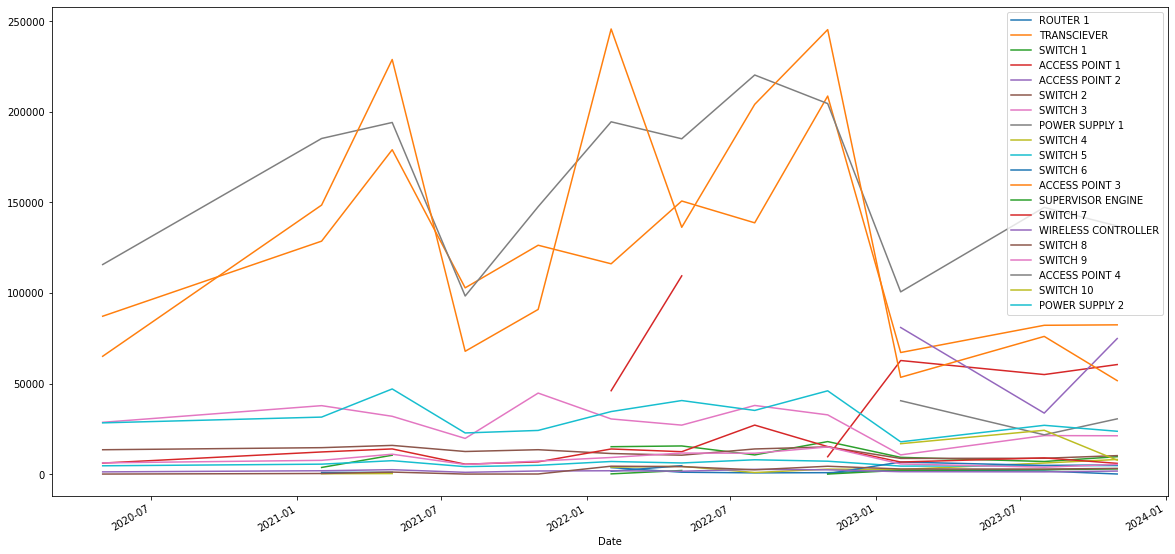

In [33]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = transposed.columns[1:]
for col in columns:
    transposed.plot(x = 'Date', y = col, ax = ax)

iterative imputed

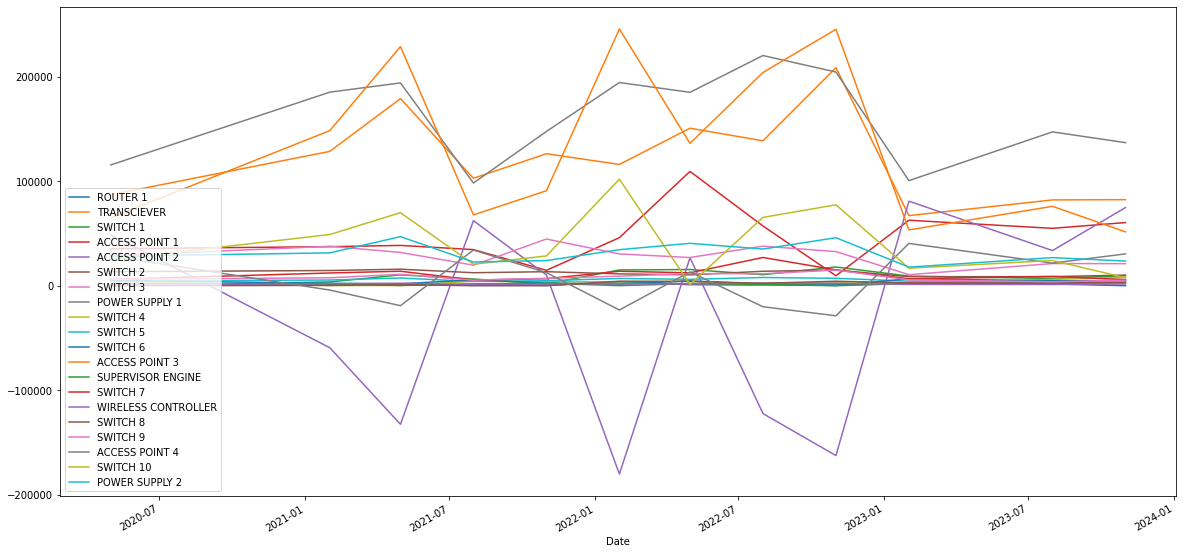

In [34]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new.columns[1:]
for col in columns:
    new.plot(x = 'Date', y = col, ax = ax)

zero imputed

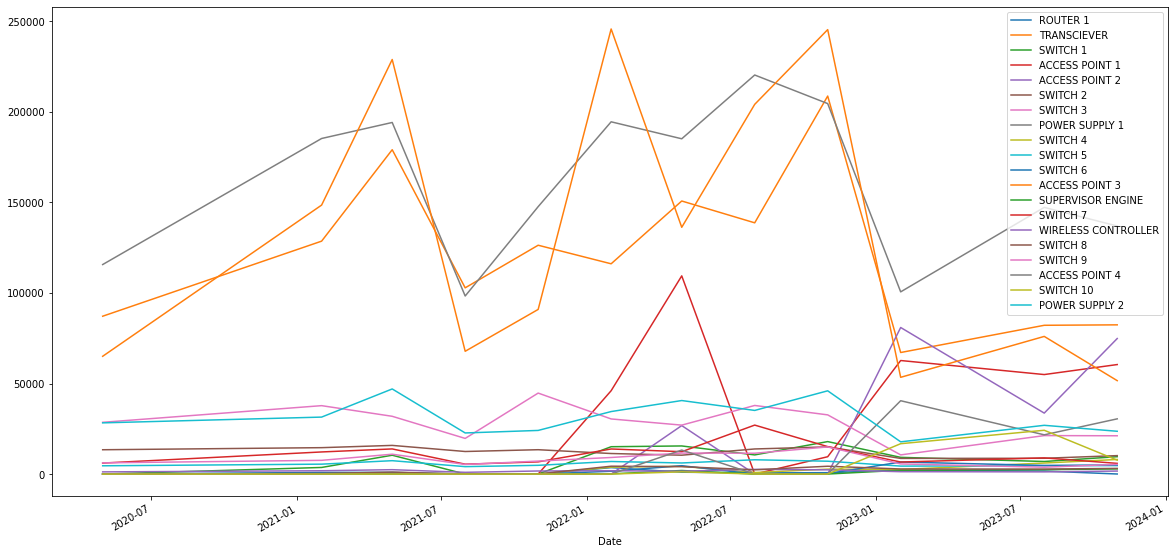

In [35]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_0.columns[1:]
for col in columns:
    new_0.plot(x = 'Date', y = col, ax = ax)

spline imputed

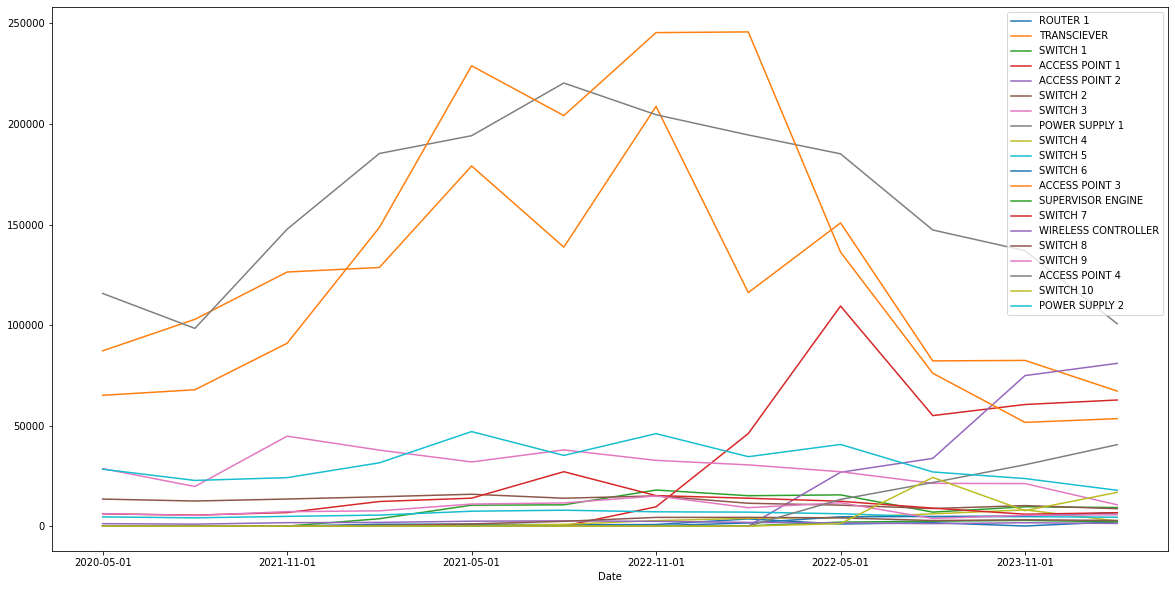

In [36]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_spline.columns[1:]
for col in columns:
    new_spline.plot(x = 'Date', y = col, ax = ax)

linear imputed

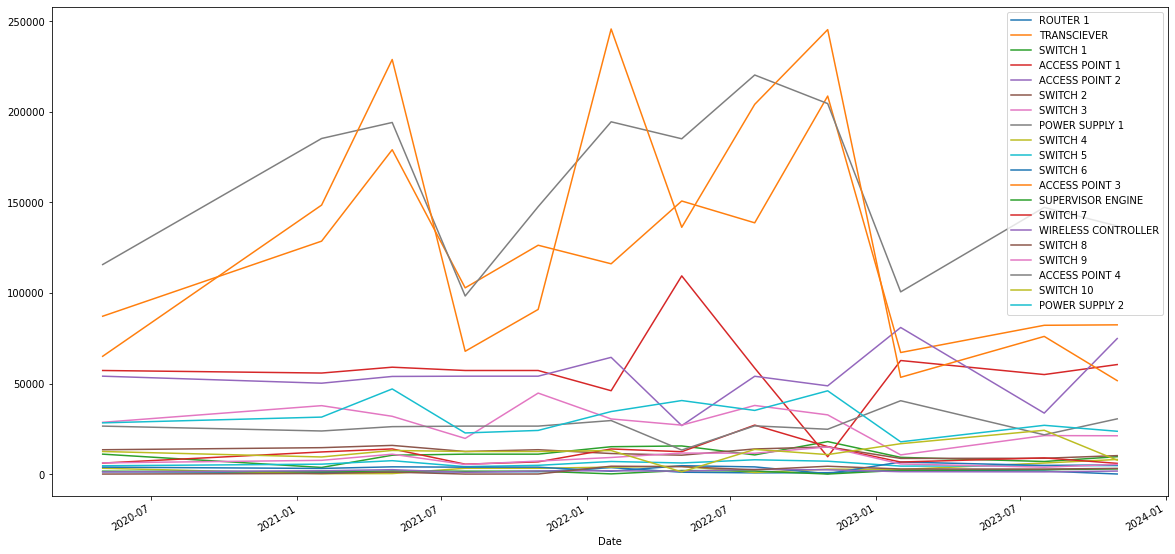

In [37]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_linear.columns[1:]
for col in columns:
    new_linear.plot(x = 'Date', y = col, ax = ax)

normalisation

In [38]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming 'transposed' is your DataFrame containing the data
# scaler = MinMaxScaler(feature_range=(-1, 1))

# scaled_iterative = scaler.fit_transform(new.iloc[:, 1:])
# scaled_iterative_df = pd.DataFrame(scaled_iterative, columns=new.columns[1:])
# scaled_iterative_df.insert(0,'Date',new['Date'])

# scaled_zero = scaler.fit_transform(new_0.iloc[:, 1:])
# scaled_0_df = pd.DataFrame(scaled_zero, columns=new_0.columns[1:])
# scaled_0_df.insert(0,'Date',new_0['Date'])

# scaled_spline = scaler.fit_transform(new_spline.iloc[:, 1:])
# scaled_spline_df = pd.DataFrame(scaled_spline, columns=new_spline.columns[1:])
# scaled_spline_df.insert(0,'Date',new_spline['Date'])

# scaled_linear = scaler.fit_transform(new_linear.iloc[:, 1:])
# scaled_linear_df = pd.DataFrame(scaled_linear, columns=new_linear.columns[1:])
# scaled_linear_df.insert(0,'Date',new_linear['Date'])
scaled_iterative_df = new
scaled_0_df = new_0
scaled_spline_df = new_spline
scaled_linear_df = new_linear

In [39]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20 , 10 ))
# ax = plt.gca()
# columns = scaled_iterative_df.columns[1:]
# for col in columns:
#     scaled_iterative_df.plot(x = 'Date', y = col, ax = ax)

feature engineering

lag features

In [40]:
# Define the number of lag quarters
lag_periods = 5

# Create lag features for each product
columns = new.columns[1:]

# iterative imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)

scaled_iterative_df.fillna(0, inplace=True)
        
scaled_iterative_df = scaled_iterative_df.copy()

# zero imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_0_df[f'{product}_Lag{i}'] = scaled_0_df[product].shift(i)

scaled_0_df.fillna(0, inplace=True)
        
scaled_0_df = scaled_0_df.copy()

# spline imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_spline_df[f'{product}_Lag{i}'] = scaled_spline_df[product].shift(i)

scaled_spline_df.fillna(0, inplace=True)
        
scaled_spline_df = scaled_spline_df.copy()


# linear imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_linear_df[f'{product}_Lag{i}'] = scaled_linear_df[product].shift(i)

scaled_linear_df.fillna(0, inplace=True)
        
scaled_linear_df = scaled_linear_df.copy()

# scaled_iterative_df

C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/2654394688.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)
C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/2654394688.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)
C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/2654394688.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

visualising correlations

<Figure size 864x432 with 0 Axes>

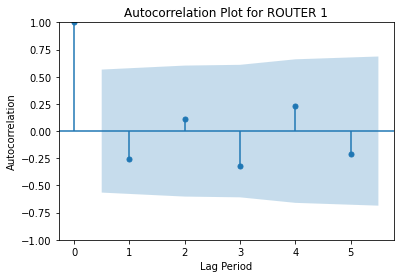

<Figure size 864x432 with 0 Axes>

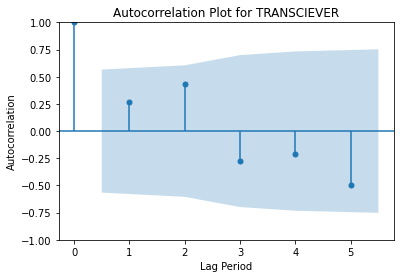

<Figure size 864x432 with 0 Axes>

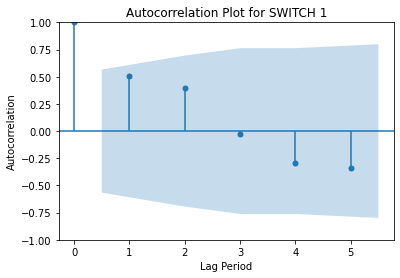

<Figure size 864x432 with 0 Axes>

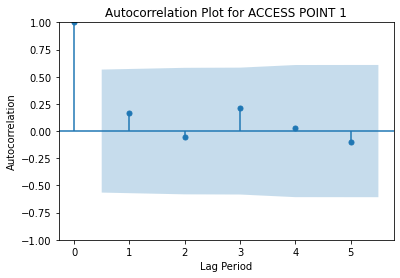

<Figure size 864x432 with 0 Axes>

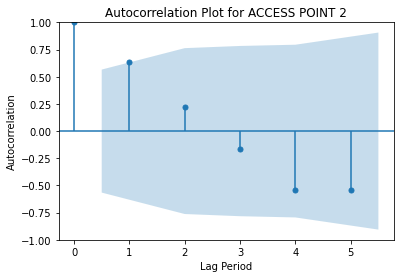

<Figure size 864x432 with 0 Axes>

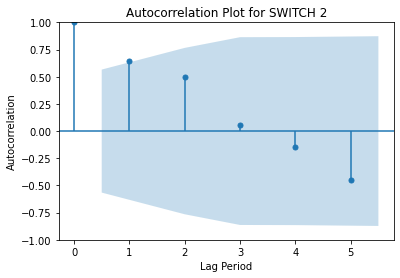

<Figure size 864x432 with 0 Axes>

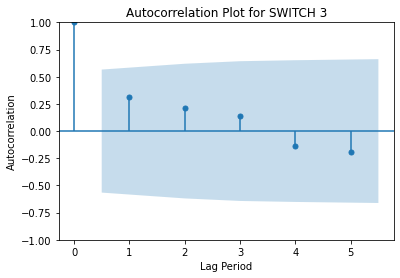

<Figure size 864x432 with 0 Axes>

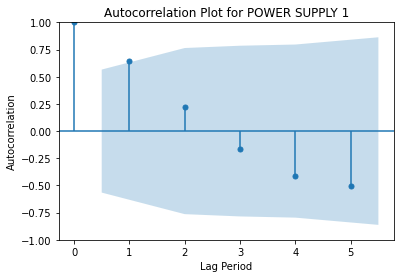

<Figure size 864x432 with 0 Axes>

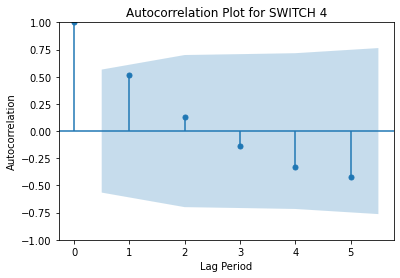

<Figure size 864x432 with 0 Axes>

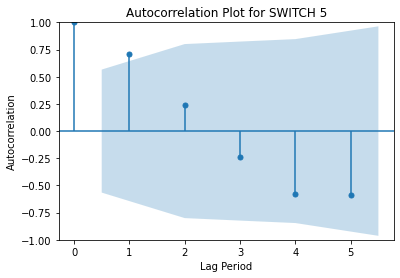

<Figure size 864x432 with 0 Axes>

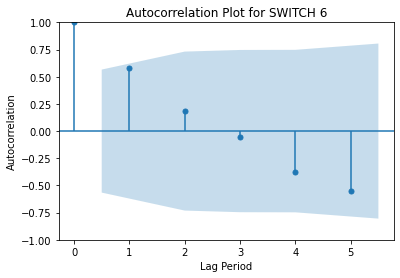

<Figure size 864x432 with 0 Axes>

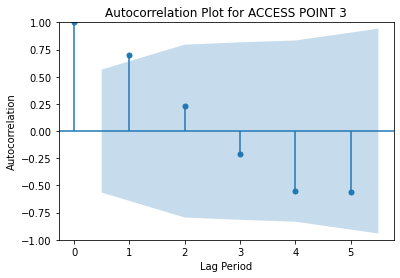

<Figure size 864x432 with 0 Axes>

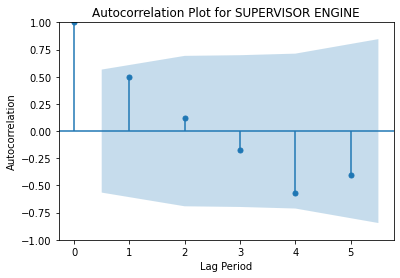

<Figure size 864x432 with 0 Axes>

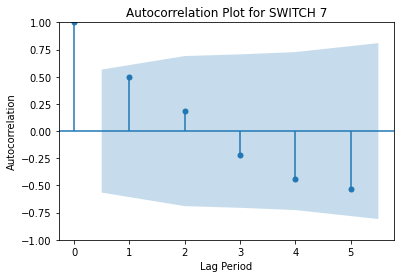

<Figure size 864x432 with 0 Axes>

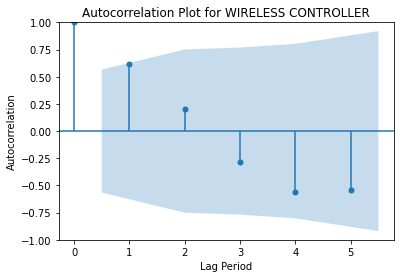

<Figure size 864x432 with 0 Axes>

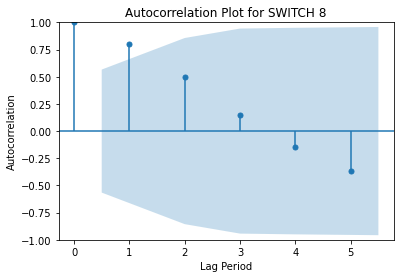

<Figure size 864x432 with 0 Axes>

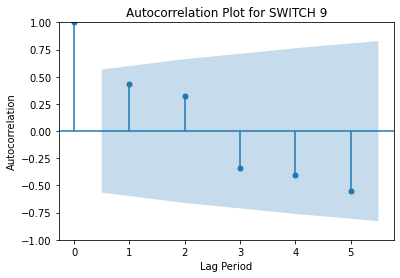

<Figure size 864x432 with 0 Axes>

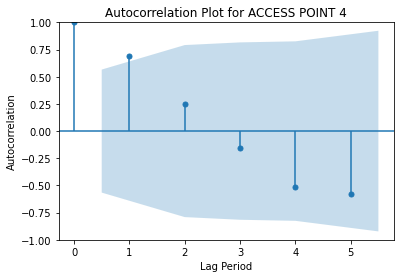

<Figure size 864x432 with 0 Axes>

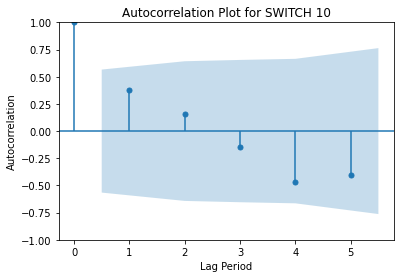

<Figure size 864x432 with 0 Axes>

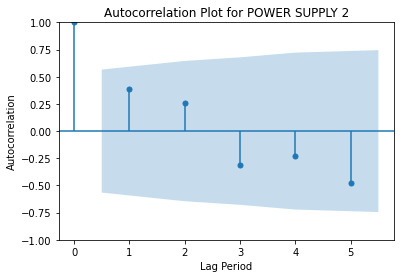

<Figure size 864x432 with 0 Axes>

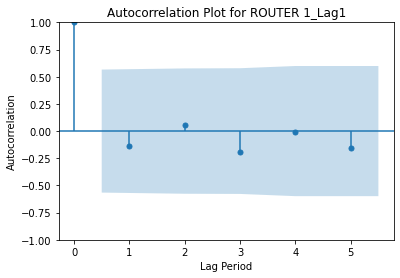

<Figure size 864x432 with 0 Axes>

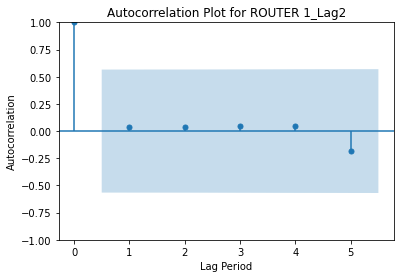

<Figure size 864x432 with 0 Axes>

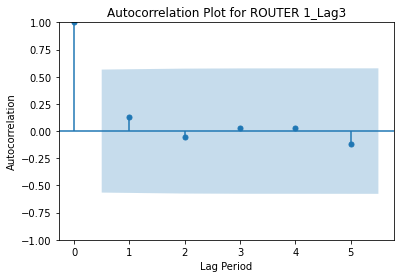

<Figure size 864x432 with 0 Axes>

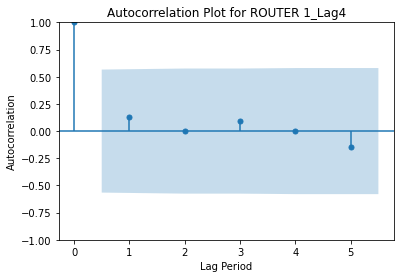

<Figure size 864x432 with 0 Axes>

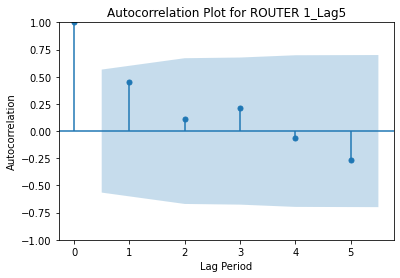

<Figure size 864x432 with 0 Axes>

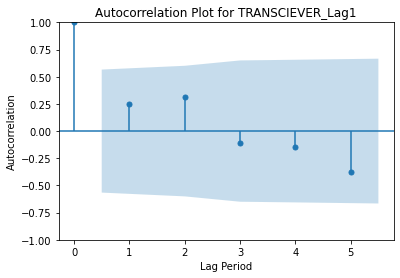

<Figure size 864x432 with 0 Axes>

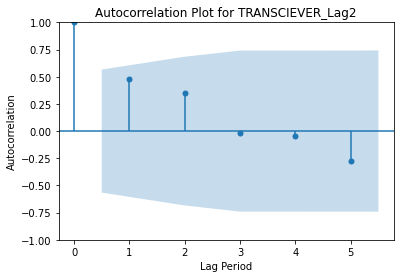

<Figure size 864x432 with 0 Axes>

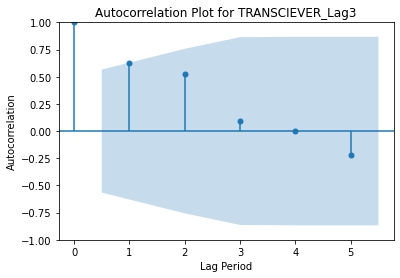

<Figure size 864x432 with 0 Axes>

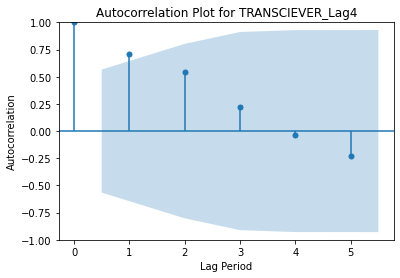

<Figure size 864x432 with 0 Axes>

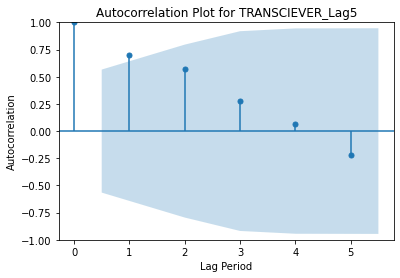

<Figure size 864x432 with 0 Axes>

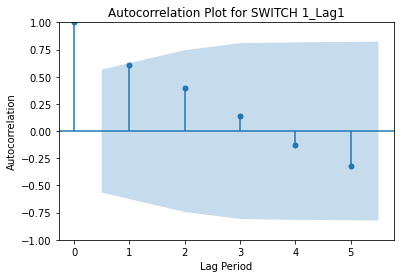

<Figure size 864x432 with 0 Axes>

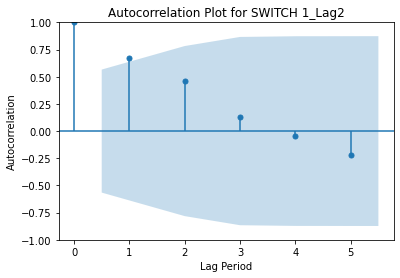

<Figure size 864x432 with 0 Axes>

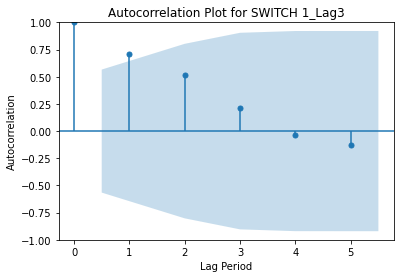

<Figure size 864x432 with 0 Axes>

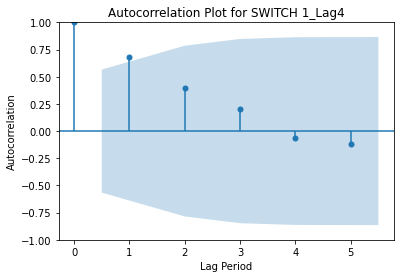

<Figure size 864x432 with 0 Axes>

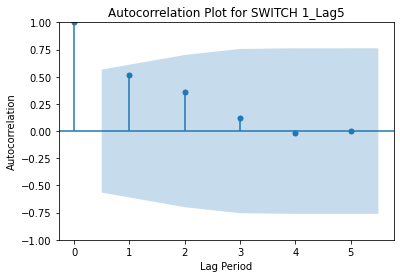

<Figure size 864x432 with 0 Axes>

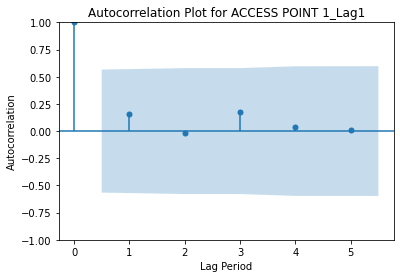

<Figure size 864x432 with 0 Axes>

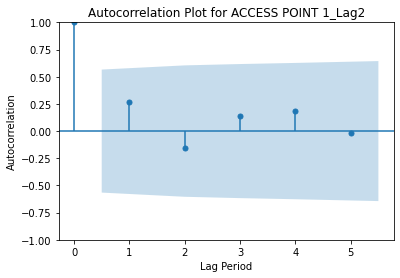

<Figure size 864x432 with 0 Axes>

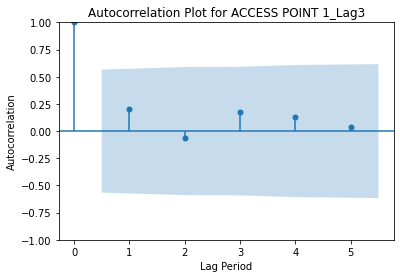

<Figure size 864x432 with 0 Axes>

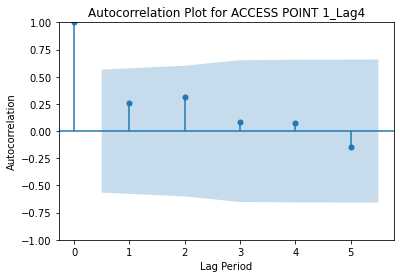

<Figure size 864x432 with 0 Axes>

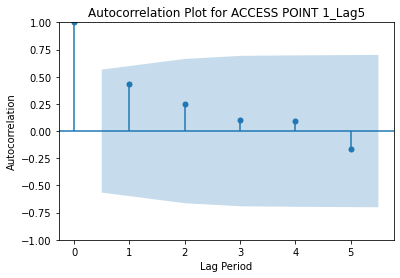

<Figure size 864x432 with 0 Axes>

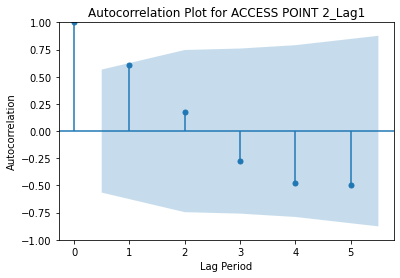

<Figure size 864x432 with 0 Axes>

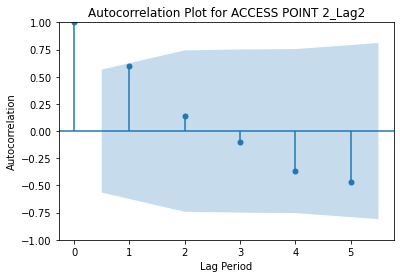

<Figure size 864x432 with 0 Axes>

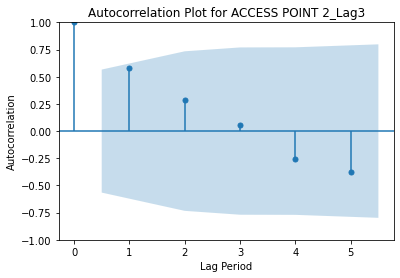

<Figure size 864x432 with 0 Axes>

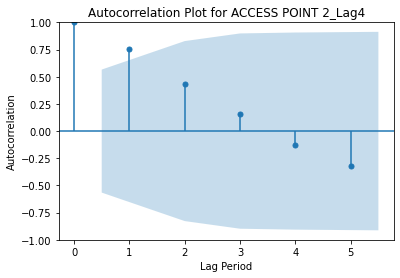

<Figure size 864x432 with 0 Axes>

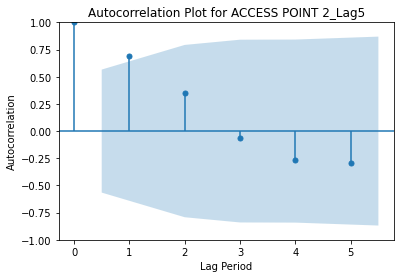

<Figure size 864x432 with 0 Axes>

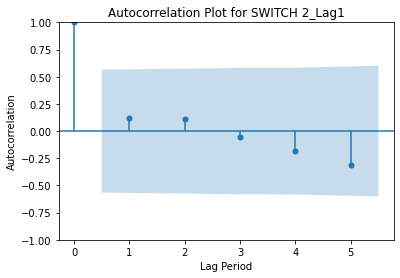

<Figure size 864x432 with 0 Axes>

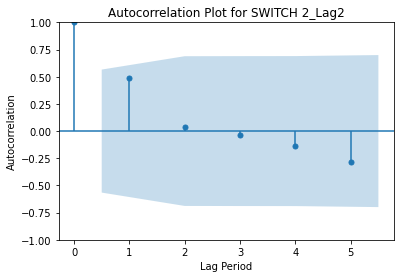

<Figure size 864x432 with 0 Axes>

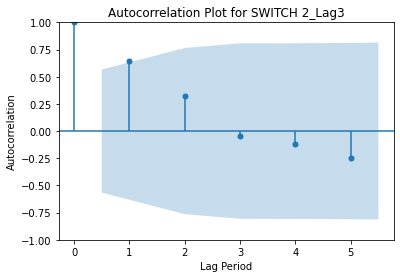

<Figure size 864x432 with 0 Axes>

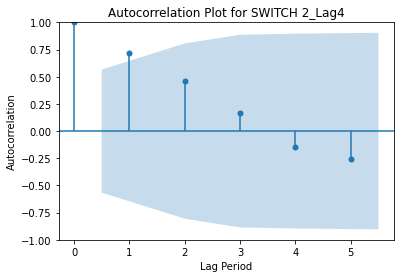

<Figure size 864x432 with 0 Axes>

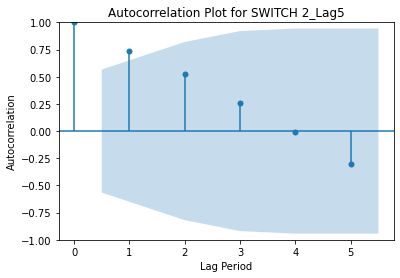

<Figure size 864x432 with 0 Axes>

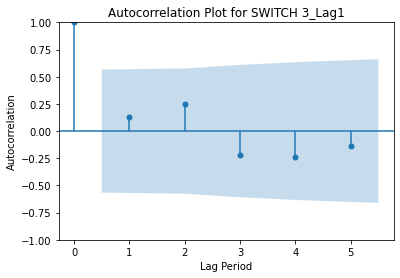

<Figure size 864x432 with 0 Axes>

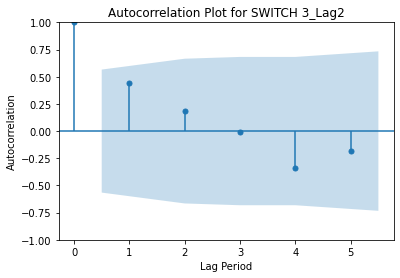

<Figure size 864x432 with 0 Axes>

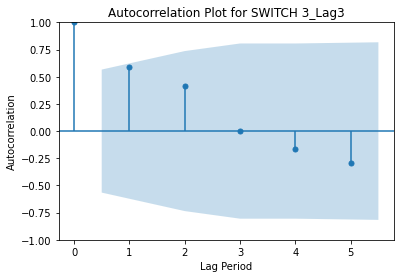

<Figure size 864x432 with 0 Axes>

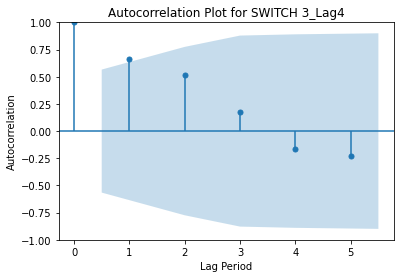

<Figure size 864x432 with 0 Axes>

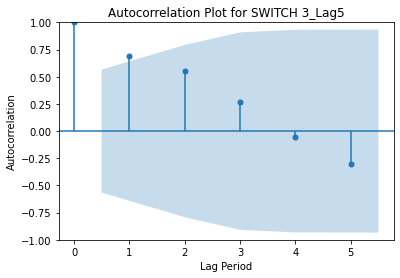

<Figure size 864x432 with 0 Axes>

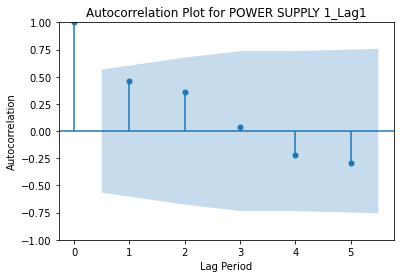

<Figure size 864x432 with 0 Axes>

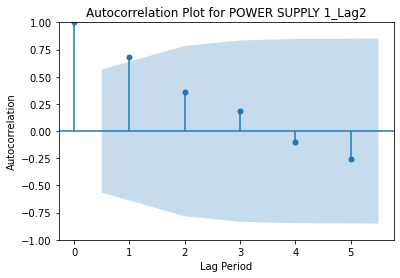

<Figure size 864x432 with 0 Axes>

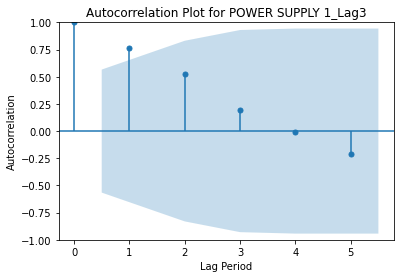

<Figure size 864x432 with 0 Axes>

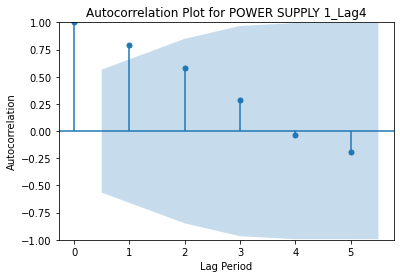

<Figure size 864x432 with 0 Axes>

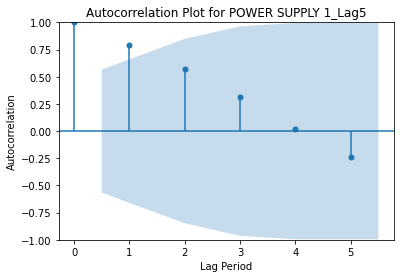

<Figure size 864x432 with 0 Axes>

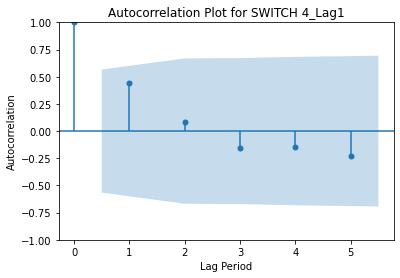

<Figure size 864x432 with 0 Axes>

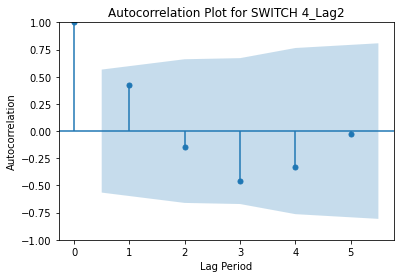

<Figure size 864x432 with 0 Axes>

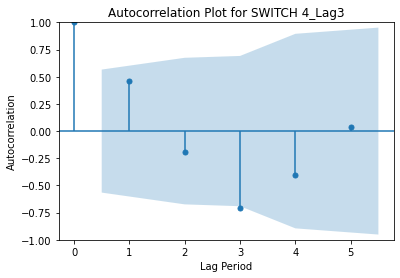

<Figure size 864x432 with 0 Axes>

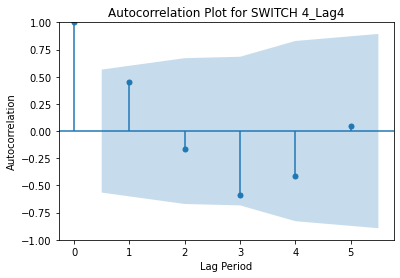

<Figure size 864x432 with 0 Axes>

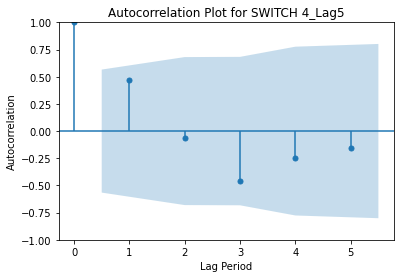

<Figure size 864x432 with 0 Axes>

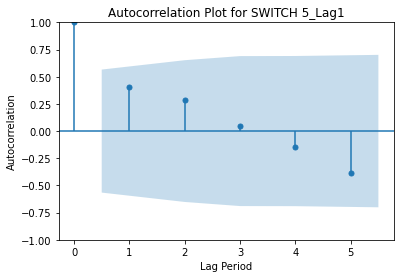

<Figure size 864x432 with 0 Axes>

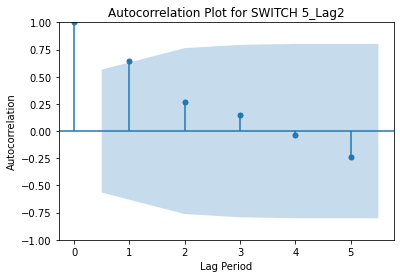

<Figure size 864x432 with 0 Axes>

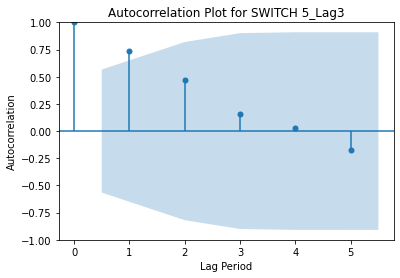

<Figure size 864x432 with 0 Axes>

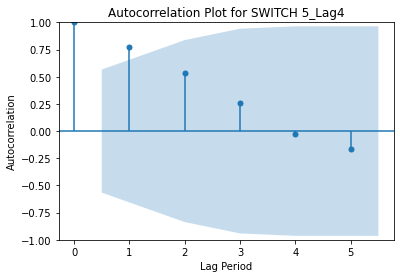

<Figure size 864x432 with 0 Axes>

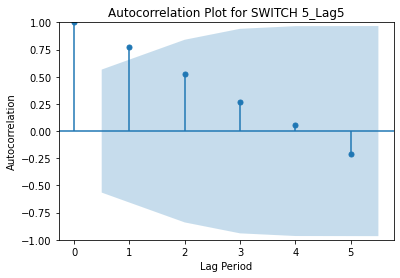

<Figure size 864x432 with 0 Axes>

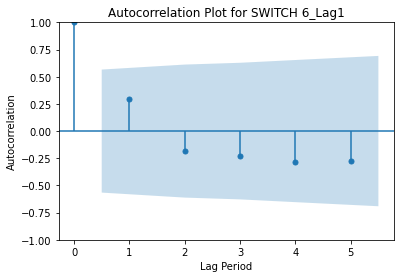

<Figure size 864x432 with 0 Axes>

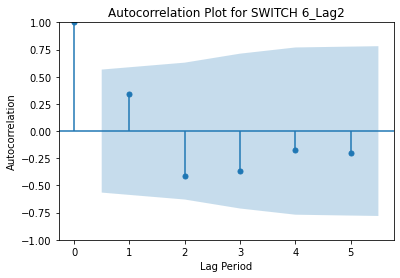

<Figure size 864x432 with 0 Axes>

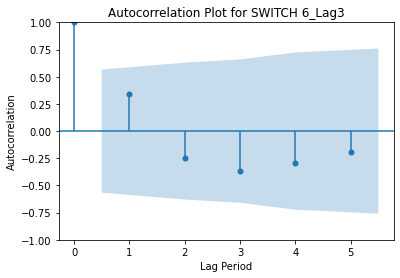

<Figure size 864x432 with 0 Axes>

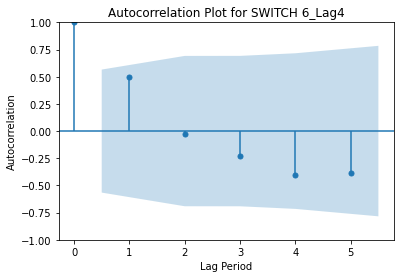

<Figure size 864x432 with 0 Axes>

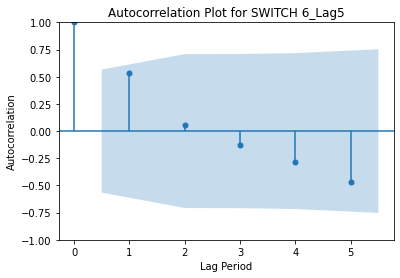

<Figure size 864x432 with 0 Axes>

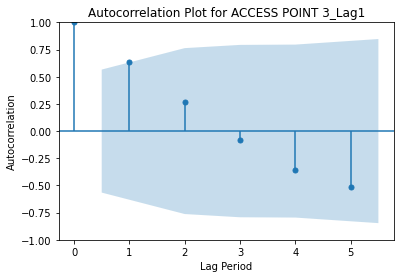

<Figure size 864x432 with 0 Axes>

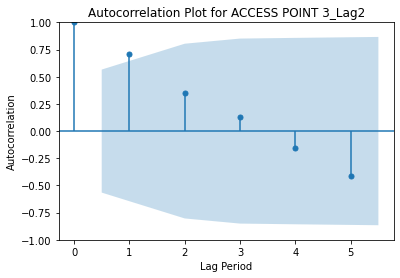

<Figure size 864x432 with 0 Axes>

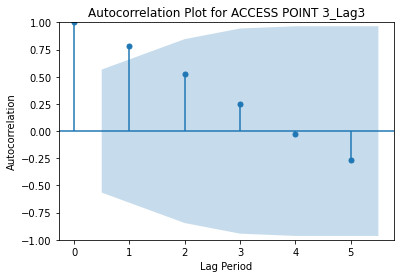

<Figure size 864x432 with 0 Axes>

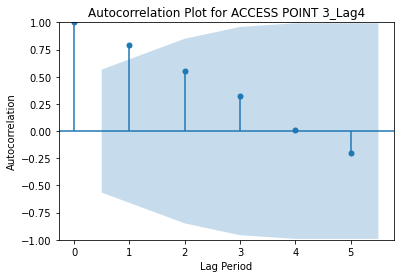

<Figure size 864x432 with 0 Axes>

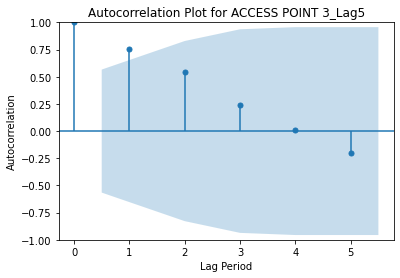

<Figure size 864x432 with 0 Axes>

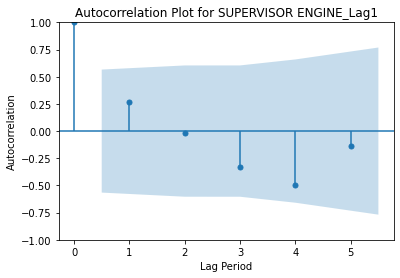

<Figure size 864x432 with 0 Axes>

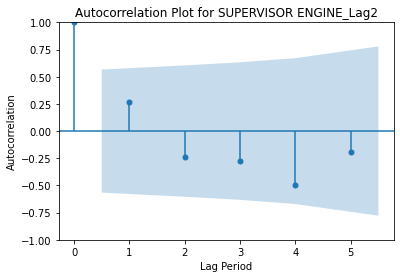

<Figure size 864x432 with 0 Axes>

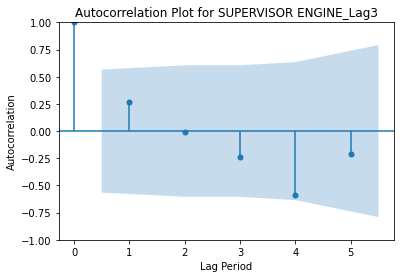

<Figure size 864x432 with 0 Axes>

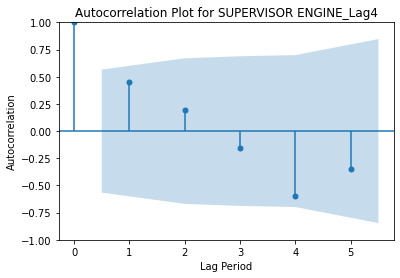

<Figure size 864x432 with 0 Axes>

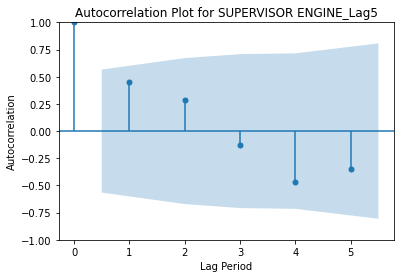

<Figure size 864x432 with 0 Axes>

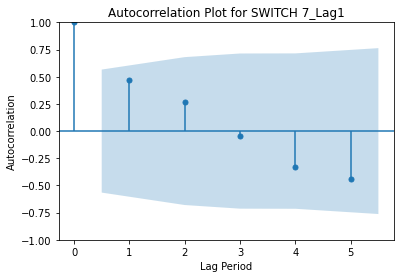

<Figure size 864x432 with 0 Axes>

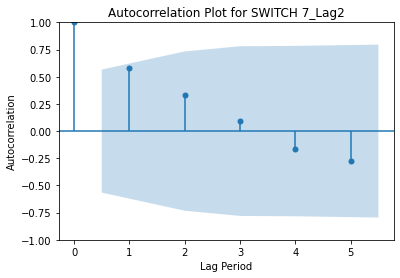

<Figure size 864x432 with 0 Axes>

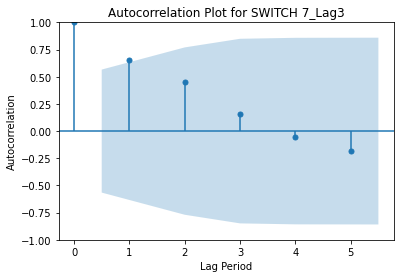

<Figure size 864x432 with 0 Axes>

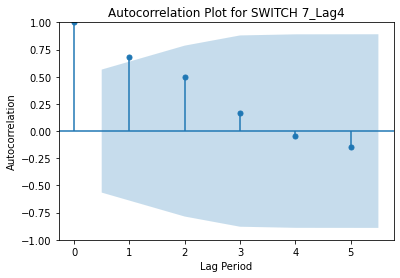

<Figure size 864x432 with 0 Axes>

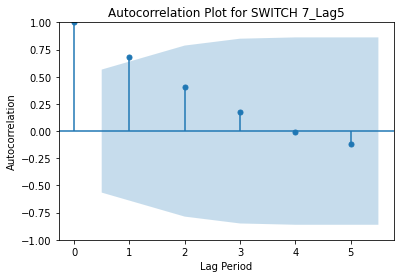

<Figure size 864x432 with 0 Axes>

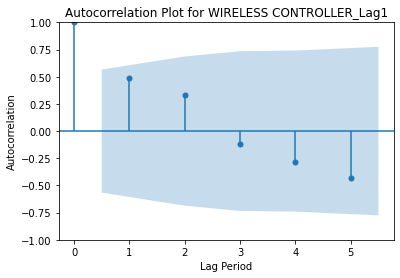

<Figure size 864x432 with 0 Axes>

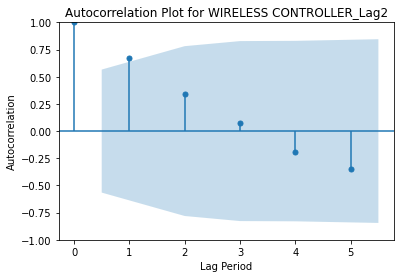

<Figure size 864x432 with 0 Axes>

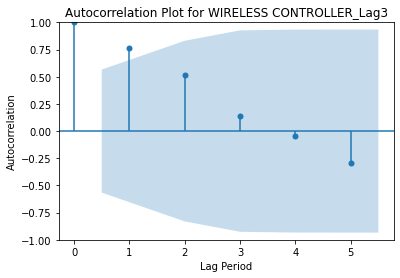

<Figure size 864x432 with 0 Axes>

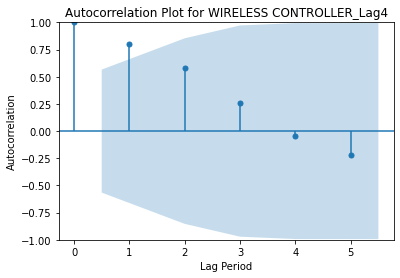

<Figure size 864x432 with 0 Axes>

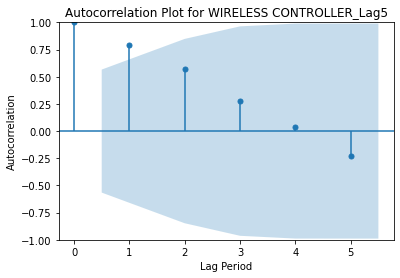

<Figure size 864x432 with 0 Axes>

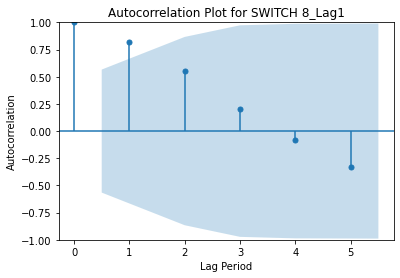

<Figure size 864x432 with 0 Axes>

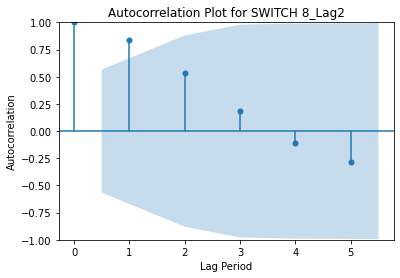

<Figure size 864x432 with 0 Axes>

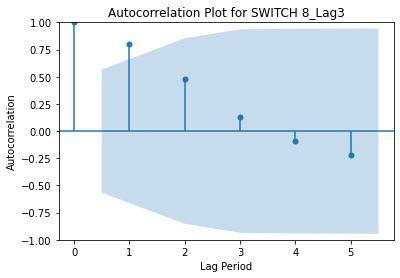

<Figure size 864x432 with 0 Axes>

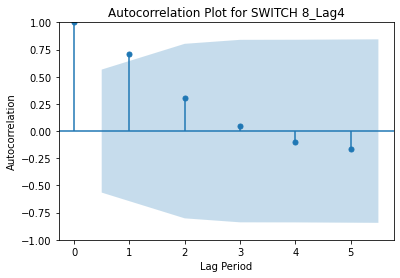

<Figure size 864x432 with 0 Axes>

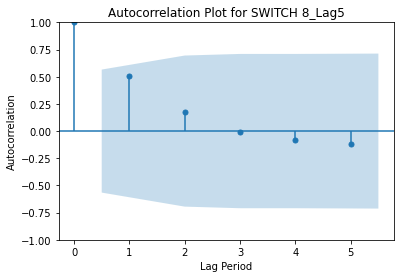

<Figure size 864x432 with 0 Axes>

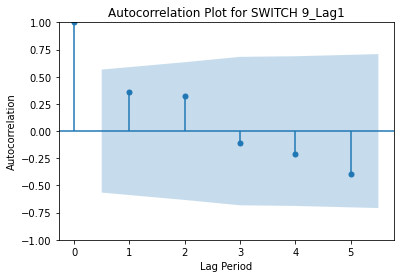

<Figure size 864x432 with 0 Axes>

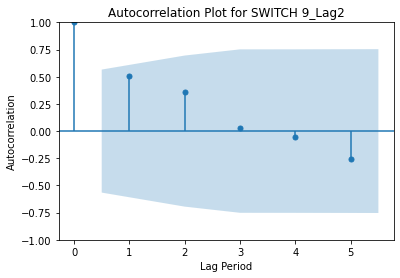

<Figure size 864x432 with 0 Axes>

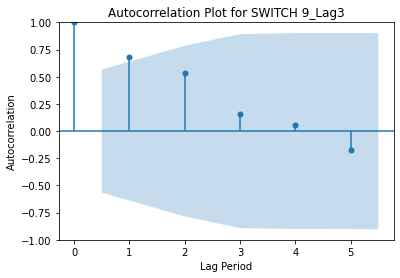

<Figure size 864x432 with 0 Axes>

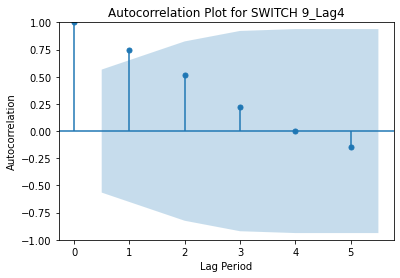

<Figure size 864x432 with 0 Axes>

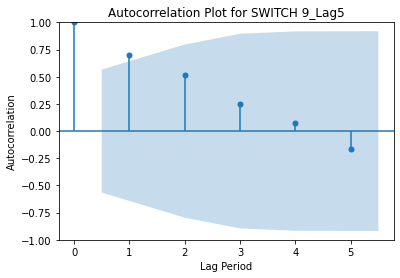

<Figure size 864x432 with 0 Axes>

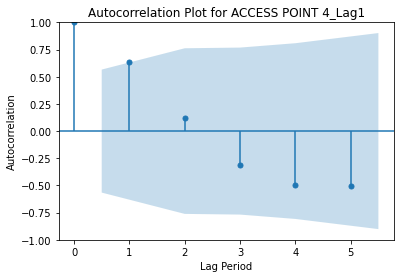

<Figure size 864x432 with 0 Axes>

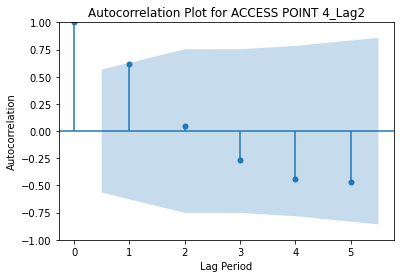

<Figure size 864x432 with 0 Axes>

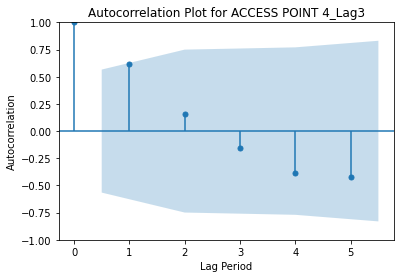

<Figure size 864x432 with 0 Axes>

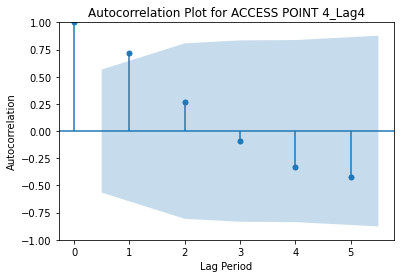

<Figure size 864x432 with 0 Axes>

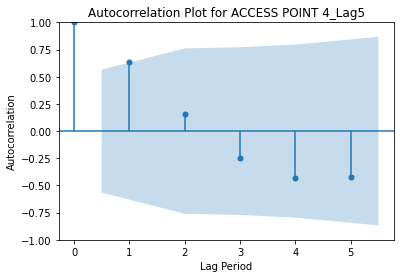

<Figure size 864x432 with 0 Axes>

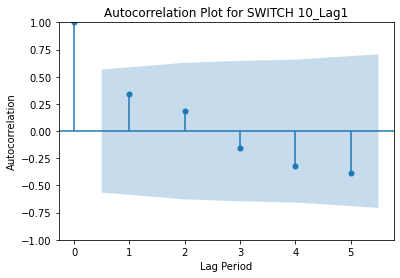

<Figure size 864x432 with 0 Axes>

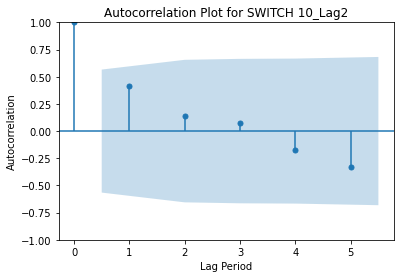

<Figure size 864x432 with 0 Axes>

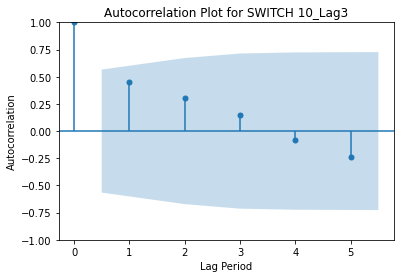

<Figure size 864x432 with 0 Axes>

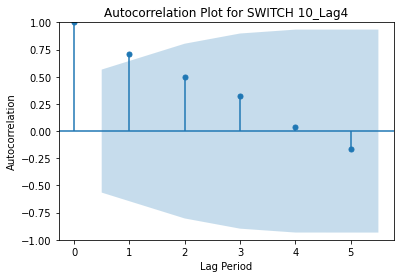

<Figure size 864x432 with 0 Axes>

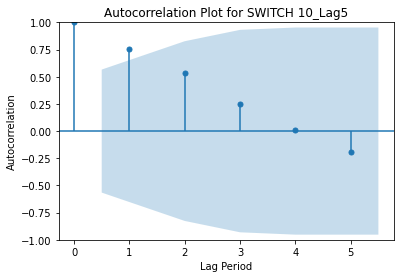

<Figure size 864x432 with 0 Axes>

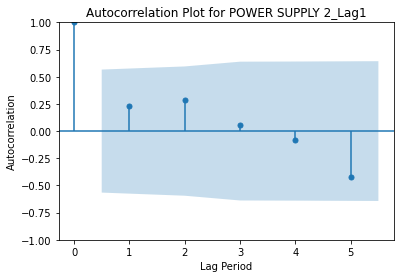

<Figure size 864x432 with 0 Axes>

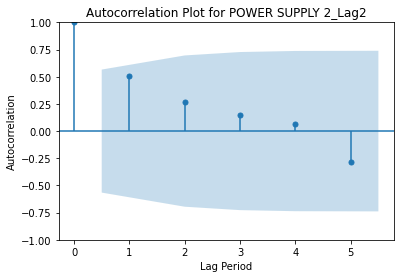

<Figure size 864x432 with 0 Axes>

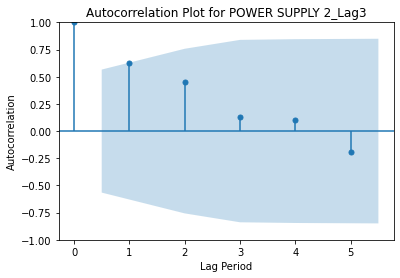

<Figure size 864x432 with 0 Axes>

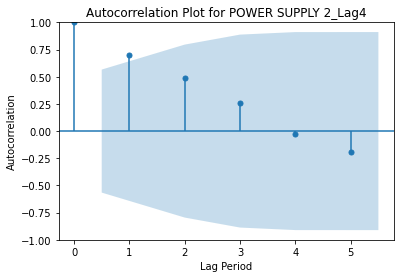

<Figure size 864x432 with 0 Axes>

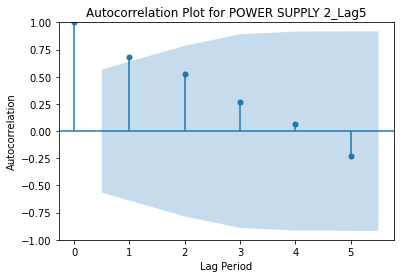

In [41]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# List of products
products = new.columns[1:]

# Iterate over each product
for product in products:
    # Plot ACF for the current product
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    plot_acf(scaled_iterative_df[product], lags=lag_periods)
    plt.title(f'Autocorrelation Plot for {product}')
    plt.xlabel('Lag Period')
    plt.ylabel('Autocorrelation')
    plt.show()


Rolling window features

In [42]:
products = new.columns[1:]
window_size = 3

for product in products:
    scaled_iterative_df[f'{product}_Rolling_Mean_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_iterative_df[f'{product}_Rolling_Max_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_iterative_df[f'{product}_Rolling_Min_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).min()

    scaled_0_df[f'{product}_Rolling_Mean_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_0_df[f'{product}_Rolling_Max_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_0_df[f'{product}_Rolling_Min_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).max()

    scaled_spline_df[f'{product}_Rolling_Mean_Sales'] = scaled_spline_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_spline_df[f'{product}_Rolling_Max_Sales'] = scaled_spline_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_spline_df[f'{product}_Rolling_Min_Sales'] = scaled_spline_df[product].rolling(window=window_size, min_periods=1).max()

    scaled_linear_df[f'{product}_Rolling_Mean_Sales'] = scaled_linear_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_linear_df[f'{product}_Rolling_Max_Sales'] = scaled_linear_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_linear_df[f'{product}_Rolling_Min_Sales'] = scaled_linear_df[product].rolling(window=window_size, min_periods=1).max()

# scaled_linear_df.fillna(0, inplace=True)
# scaled_iterative_df.fillna(0, inplace=True)
# scaled_0_df.fillna(0, inplace=True)
# scaled_spline_df.fillna(0, inplace=True)


C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/991332886.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Rolling_Min_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).min()
C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/991332886.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_0_df[f'{product}_Rolling_Min_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).max()
C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/991332886.py:1

In [43]:
scaled_iterative_df

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1176.874240      87173.0     12.617558   
1            2021-08-01  1203.880419     102849.0   6431.362819   
2            2021-11-01   301.705754     126375.0   1651.992349   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   
10           2023-11-01    38.000000      82408.0   9595.000000   
11           2023-02-01  2141.000000      67132.0   9231.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               35383.653311    48605.014593   13432.0   28585.0   
1               34595.130943    62326.892737   12463.0   19686.0   
2               14749.609871    10265.570119   13452.0   44724.0   
3               37406.301862   -59390.459949   14581.0   37781.0   
4               38594.816720  -132651.395018   15831.0   31905.0   
5               57206.758834  -122373.227714   13864.0   37888.0   
6                9576.000000  -162594.048404   15012.0   32689.0   
7               46029.000000  -180301.038476   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   
10              60478.000000    74853.000000   10185.0   21149.0   
11              62708.000000    80944.000000    8645.0   10584.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...  \
0                   115709.0  4253.699954  ...   
1                    98337.0  4316.469328  ...   
2                   147681.0  3791.645150  ...   
3                   185327.0   177.000000  ...   
4                   194170.0   270.000000  ...   
5                   220386.0   850.000000  ...   
6                   204604.0  2717.000000  ...   
7                   194538.0  3833.000000  ...   
8                   185160.0  4279.000000  ...   
9                   147284.0  6089.000000  ...   
10                  136997.0  8063.000000  ...   
11                  100623.0  2535.000000  ...   

Product Name  POWER SUPPLY 2_Lag2_Rolling_Min_Sales  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                           22704.0   
5                                           22704.0   
6                                           24098.0   
7                                           31461.0   
8                                           35145.0   
9                                           34518.0   
10                                          34518.0   
11                                          26925.0   

Product Name  POWER SUPPLY 2_Lag3_Rolling_Mean_Sales  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                        9426.333333   
4                                       16994.333333   
5                                       25027.000000   
6                                       26087.666667   
7                                       34189.333333   
8                                       37871.666667   
9                                       42710.666667   
10                                      38547.000000   
11                                      40367.000000   

Product Name  POWER SUPPLY 2_Lag3_Rolling_Max_Sales  \
0                                               0.0   
1                                    

periodic differences

In [44]:
# Define the number of lag quarters
lag_periods = 5

# Iterate over each lagged feature for each product
for product in columns:
    for i in range(1, lag_periods + 1):
        # Compute the periodic difference for the current lagged feature
        scaled_iterative_df[f'{product}_Lag{i}_Diff'] = scaled_iterative_df[f'{product}_Lag{i}'].diff()
        scaled_spline_df[f'{product}_Lag{i}_Diff'] = scaled_spline_df[f'{product}_Lag{i}'].diff()
        scaled_linear_df[f'{product}_Lag{i}_Diff'] = scaled_linear_df[f'{product}_Lag{i}'].diff()
        scaled_0_df[f'{product}_Lag{i}_Diff'] = scaled_0_df[f'{product}_Lag{i}'].diff()
# Fill NaN values with 0 after computing differences
scaled_iterative_df.fillna(0, inplace=True)
scaled_spline_df.fillna(0,inplace=True)
scaled_linear_df.fillna(0,inplace=True)
scaled_0_df.fillna(0,inplace=True)
scaled_iterative_df.head(10)

C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/1858487643.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}_Diff'] = scaled_iterative_df[f'{product}_Lag{i}'].diff()
C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/1858487643.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_spline_df[f'{product}_Lag{i}_Diff'] = scaled_spline_df[f'{product}_Lag{i}'].diff()
C:\Users\kedar\AppData\Local\Temp/ipykernel_4276/1858487643.py:10: PerformanceWarning: DataFrame is highly fragmented.  This

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1176.874240      87173.0     12.617558   
1            2021-08-01  1203.880419     102849.0   6431.362819   
2            2021-11-01   301.705754     126375.0   1651.992349   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               35383.653311    48605.014593   13432.0   28585.0   
1               34595.130943    62326.892737   12463.0   19686.0   
2               14749.609871    10265.570119   13452.0   44724.0   
3               37406.301862   -59390.459949   14581.0   37781.0   
4               38594.816720  -132651.395018   15831.0   31905.0   
5               57206.758834  -122373.227714   13864.0   37888.0   
6                9576.000000  -162594.048404   15012.0   32689.0   
7               46029.000000  -180301.038476   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...  SWITCH 10_Lag1_Diff  \
0                   115709.0  4253.699954  ...             0.000000   
1                    98337.0  4316.469328  ...         24885.026733   
2                   147681.0  3791.645150  ...         -4270.981223   
3                   185327.0   177.000000  ...          7922.830345   
4                   194170.0   270.000000  ...         20501.852447   
5                   220386.0   850.000000  ...         20904.366348   
6                   204604.0  2717.000000  ...         -4513.725949   
7                   194538.0  3833.000000  ...         12050.695819   
8                   185160.0  4279.000000  ...         24511.807719   
9                   147284.0  6089.000000  ...       -100764.872239   

Product Name  SWITCH 10_Lag2_Diff  SWITCH 10_Lag3_Diff  SWITCH 10_Lag4_Diff  \
0                        0.000000             0.000000             0.000000   
1                        0.000000             0.000000             0.000000   
2                    24885.026733             0.000000             0.000000   
3                    -4270.981223         24885.026733             0.000000   
4                     7922.830345         -4270.981223         24885.026733   
5                    20501.852447          7922.830345         -4270.981223   
6                    20904.366348         20501.852447          7922.830345   
7                    -4513.725949         20904.366348         20501.852447   
8                    12050.695819         -4513.725949         20904.366348   
9                    24511.807719         12050.695819         -4513.725949   

Product Name  SWITCH 10_Lag5_Diff  POWER SUPPLY 2_Lag1_Diff  \
0                        0.000000                       0.0   
1                        0.000000                   28279.0   
2                        0.000000                   -5575.0   
3                        0.000000                    1394.0   
4                        0.000000                    7363.0   
5                    24885.026733                   15548.0   
6                    -4270.981223                  -11864.0   
7                     7922.830345                   10833.0   
8                    20501.852447                  -11460.0   
9                    20904.366348                    6087.0   

Product Name  POWER SUPPLY 2_Lag2_Diff  POWER SUPPLY 2_Lag3_Diff  \
0                                  0.0                       0.0   
1                              

MODELS

PROPHET

In [45]:
# ! pip install fbprophet

In [46]:
# # on iterative imputed dataset
# new['Date'] = pd.to_datetime(new['Date'])
# new

In [47]:
!python -m pip install prophet

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [48]:
# from prophet import Prophet
# # Loop over each product column (excluding 'Date')
# for product_column in new.columns[1:]:
#     # Select 'Date' and the current product column
#     product_df = new[['Date', product_column]].rename(columns={'Date': 'ds', product_column: 'y'})
    
#     # Drop any rows with missing values
#     product_df.dropna(inplace=True)
    
#     # Ensure no negative values in the 'y' column
#     product_df = product_df[product_df['y'] >= 0]
    
#     # Initialize and fit the Prophet model
#     model = Prophet()
#     model.fit(product_df)
    
#     # Create future dates for forecasting
#     future_dates = model.make_future_dataframe(periods=4, freq='Q') # making predictions at a frequency of one quarter
    
#     # Make forecasts
#     forecast = model.predict(future_dates)
    
#     # Store the forecast results in a separate DataFrame or data structure
#     # You can print, save, or perform further analysis on the forecast data
#     print(f'Forecast for {product_column}:')
#     print('\n')
#     forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Print the last 5 forecasted values
#     print('\n')

In [49]:
len(transposed.columns[1:])

20

In [50]:
print(scaled_iterative_df.columns)

Index(['Date', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       ...
       'SWITCH 10_Lag1_Diff', 'SWITCH 10_Lag2_Diff', 'SWITCH 10_Lag3_Diff',
       'SWITCH 10_Lag4_Diff', 'SWITCH 10_Lag5_Diff',
       'POWER SUPPLY 2_Lag1_Diff', 'POWER SUPPLY 2_Lag2_Diff',
       'POWER SUPPLY 2_Lag3_Diff', 'POWER SUPPLY 2_Lag4_Diff',
       'POWER SUPPLY 2_Lag5_Diff'],
      dtype='object', name='Product Name', length=581)


20:10:40 - cmdstanpy - INFO - Chain [1] start processing
20:10:40 - cmdstanpy - INFO - Chain [1] done processing


product:  ROUTER 1


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:40 - cmdstanpy - INFO - Chain [1] start processing
20:10:42 - cmdstanpy - INFO - Chain [1] done processing
20:10:42 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae       mape      mdape  \
0  92 days  1.065734e+07  3264.557913  3264.557913   1.524782   1.524782   
1 273 days  2.099698e+06  1449.033484  1449.033484   0.867685   0.867685   
2 365 days  1.010734e+06  1005.352545  1005.352545  26.456646  26.456646   

      smape  coverage  
0  0.865178       0.0  
1  1.532585       0.0  
2  1.859435       0.0  
product:  TRANSCIEVER


20:10:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:43 - cmdstanpy - INFO - Chain [1] start processing
20:10:44 - cmdstanpy - INFO - Chain [1] done processing
20:10:44 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  4.044114e+09   63593.348507   63593.348507  0.947288  0.947288   
1 273 days  6.921864e+09   83197.739465   83197.739465  1.012594  1.012594   
2 365 days  5.094780e+10  225716.203750  225716.203750  2.739008  2.739008   

      smape  coverage  
0  1.799710       0.0  
1  0.672240       0.0  
2  1.155942       0.0  
product:  SWITCH 1


20:10:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:45 - cmdstanpy - INFO - Chain [1] start processing
20:10:46 - cmdstanpy - INFO - Chain [1] done processing
20:10:46 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  6.299311e+08  25098.427797  25098.427797  2.718928  2.718928   
1 273 days  4.439203e+07   6662.734764   6662.734764  0.960325  0.960325   
2 365 days  1.354148e+09  36798.753728  36798.753728  3.835201  3.835201   

      smape  coverage  
0  1.152350       0.0  
1  0.648797       0.0  
2  1.314505       0.0  
product:  ACCESS POINT 1


20:10:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:47 - cmdstanpy - INFO - Chain [1] start processing
20:10:47 - cmdstanpy - INFO - Chain [1] done processing
20:10:48 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.391477e+08  11796.088753  11796.088753  0.188111  0.188111   
1 273 days  8.907722e+08  29845.807197  29845.807197  0.543095  0.543095   
2 365 days  3.600456e+09  60003.801515  60003.801515  0.992159  0.992159   

      smape  coverage  
0  0.207641       0.0  
1  0.427114       0.0  
2  1.968881       0.0  
product:  ACCESS POINT 2


20:10:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:48 - cmdstanpy - INFO - Chain [1] start processing
20:10:50 - cmdstanpy - INFO - Chain [1] done processing
20:10:50 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  1.689253e+11  411005.279728  411005.279728   5.077650   5.077650   
1 273 days  3.226892e+11  568057.366296  568057.366296  16.871321  16.871321   
2 365 days  3.237634e+11  569002.095656  569002.095656   7.601594   7.601594   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  
product:  SWITCH 2


20:10:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:51 - cmdstanpy - INFO - Chain [1] start processing
20:10:52 - cmdstanpy - INFO - Chain [1] done processing
20:10:53 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  4.864046e+07   6974.271503   6974.271503  0.806740  0.806740   
1 273 days  4.969036e+08  22291.335052  22291.335052  2.554588  2.554588   
2 365 days  2.904220e+09  53890.819346  53890.819346  5.291195  5.291195   

      smape  coverage  
0  1.352163       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  SWITCH 3


20:10:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:53 - cmdstanpy - INFO - Chain [1] start processing
20:10:55 - cmdstanpy - INFO - Chain [1] done processing
20:10:55 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  5.121646e+07   7156.567693   7156.567693  0.676169  0.676169   
1 273 days  4.600578e+03     67.827561     67.827561  0.003192  0.003192   
2 365 days  1.759770e+08  13265.631336  13265.631336  0.627246  0.627246   

      smape  coverage  
0  0.505326       0.0  
1  0.003198       0.0  
2  0.913851       0.0  
product:  POWER SUPPLY 1


20:10:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:55 - cmdstanpy - INFO - Chain [1] start processing
20:10:57 - cmdstanpy - INFO - Chain [1] done processing
20:10:57 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  1.586609e+08   12596.068446   12596.068446  0.125181  0.125181   
1 273 days  5.949788e+10  243921.865000  243921.865000  1.656133  1.656133   
2 365 days  1.467534e+10  121141.834893  121141.834893  0.884266  0.884266   

      smape  coverage  
0  0.117807       0.0  
1  0.905948       0.0  
2  0.613166       0.0  
product:  SWITCH 4


20:10:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:57 - cmdstanpy - INFO - Chain [1] start processing
20:10:57 - cmdstanpy - INFO - Chain [1] done processing
20:10:58 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  2.519440e+07  5019.402799  5019.402799  1.980041  1.980041   
1 273 days  7.729434e+07  8791.720017  8791.720017  1.443869  1.443869   
2 365 days  4.172498e+07  6459.487290  6459.487290  0.801127  0.801127   

      smape  coverage  
0  0.994985       0.0  
1  2.000000       0.0  
2  1.336467       0.0  
product:  SWITCH 5


20:10:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:58 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  7.976736e+06  2824.311630  2824.311630  0.642327  0.642327   
1 273 days  6.623057e+07  8138.216530  8138.216530  1.763045  1.763045   
2 365 days  2.718312e+07  5213.743788  5213.743788  1.114048  1.114048   

      smape  coverage  
0  0.486183       0.0  
1  0.937031       0.0  
2  0.715498       0.0  
product:  SWITCH 6


20:10:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  3.470280e+07  5890.907931  5890.907931  0.885052  0.885052   
1 273 days  4.712887e+07  6865.046798  6865.046798  1.441026  1.441026   
2 365 days  4.985066e+07  7060.499897  7060.499897  1.407876  1.407876   

      smape  coverage  
0  1.587612       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  ACCESS POINT 3


20:11:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  5.265881e+10  229475.068698  229475.068698  4.294793  4.294793   
1 273 days  1.172018e+11  342347.448829  342347.448829  4.503387  4.503387   
2 365 days  1.773547e+11  421134.988846  421134.988846  8.163746  8.163746   

      smape  coverage  
0  1.364554       0.0  
1  1.384936       0.0  
2  1.606444       0.0  
product:  SUPERVISOR ENGINE


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  1.233441e+07  3512.037366  3512.037366  1.675590  1.675590   
1 273 days  3.496688e+06  1869.943188  1869.943188  0.770475  0.770475   
2 365 days  2.525936e+07  5025.869504  5025.869504  1.769049  1.769049   

      smape  coverage  
0  2.000000       0.0  
1  1.253289       0.0  
2  2.000000       0.0  
product:  SWITCH 7


20:11:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:08 - cmdstanpy - INFO - Chain [1] done processing
20:11:09 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  6.141080e+05    783.650433    783.650433  0.117966  0.117966   
1 273 days  2.847991e+09  53366.572195  53366.572195  5.974093  5.974093   
2 365 days  4.539517e+08  21306.143174  21306.143174  3.605710  3.605710   

      smape  coverage  
0  0.111396       0.0  
1  1.498376       0.0  
2  1.286442       0.0  
product:  WIRELESS CONTROLLER


20:11:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:09 - cmdstanpy - INFO - Chain [1] start processing
20:11:10 - cmdstanpy - INFO - Chain [1] done processing
20:11:11 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  8.457996e+05   919.673650   919.673650  0.701505  0.701505   
1 273 days  1.476257e+07  3842.208691  3842.208691  3.175379  3.175379   
2 365 days  1.297694e+06  1139.163855  1139.163855  0.686657  0.686657   

      smape  coverage  
0  1.080490       0.0  
1  1.227110       0.0  
2  0.511161       0.0  
product:  SWITCH 8


20:11:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:11 - cmdstanpy - INFO - Chain [1] start processing
20:11:13 - cmdstanpy - INFO - Chain [1] done processing
20:11:13 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  9.598098e+07  9796.988060  9796.988060  3.488956  3.488956   
1 273 days  1.588664e+07  3985.804428  3985.804428  1.446228  1.446228   
2 365 days  7.553028e+07  8690.815616  8690.815616  2.780171  2.780171   

      smape  coverage  
0  1.271264       0.0  
1  0.839311       0.0  
2  1.163210       0.0  
product:  SWITCH 9


20:11:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:14 - cmdstanpy - INFO - Chain [1] start processing
20:11:17 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  6.262767e+06   2502.552154   2502.552154  0.447284  0.447284   
1 273 days  2.568644e+08  16026.988370  16026.988370  4.230990  4.230990   
2 365 days  4.139000e+08  20344.532539  20344.532539  3.811265  3.811265   

      smape  coverage  
0  0.365535       0.0  
1  1.358047       0.0  
2  1.311682       0.0  
product:  ACCESS POINT 4


20:11:18 - cmdstanpy - INFO - Chain [1] start processing
20:11:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:18 - cmdstanpy - INFO - Chain [1] start processing
20:11:19 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  7.045758e+11  839390.133322  839390.133322  20.723124  20.723124   
1 273 days  4.026010e+09   63450.845027   63450.845027   2.928455   2.928455   
2 365 days  9.945757e+09   99728.417198   99728.417198   3.269999   3.269999   

      smape  coverage  
0  1.823968       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  SWITCH 10


20:11:20 - cmdstanpy - INFO - Chain [1] start processing
20:11:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:20 - cmdstanpy - INFO - Chain [1] start processing
20:11:22 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.033409e+10  142597.662895  142597.662895   8.502126   8.502126   
1 273 days  1.227953e+10  110813.054974  110813.054974   4.581702   4.581702   
2 365 days  2.023105e+10  142235.887455  142235.887455  18.520298  18.520298   

      smape  coverage  
0  1.619125       0.0  
1  1.392255       0.0  
2  1.805071       0.0  
product:  POWER SUPPLY 2


20:11:23 - cmdstanpy - INFO - Chain [1] start processing
20:11:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  2.731008e+07   5225.904768   5225.904768  0.293607  0.293607   
1 273 days  4.188155e+08  20464.982224  20464.982224  0.760074  0.760074   
2 365 days  2.683592e+09  51803.400897  51803.400897  2.191809  2.191809   

      smape  coverage  
0  0.256022       0.0  
1  0.550763       0.0  
2  1.045758       0.0  


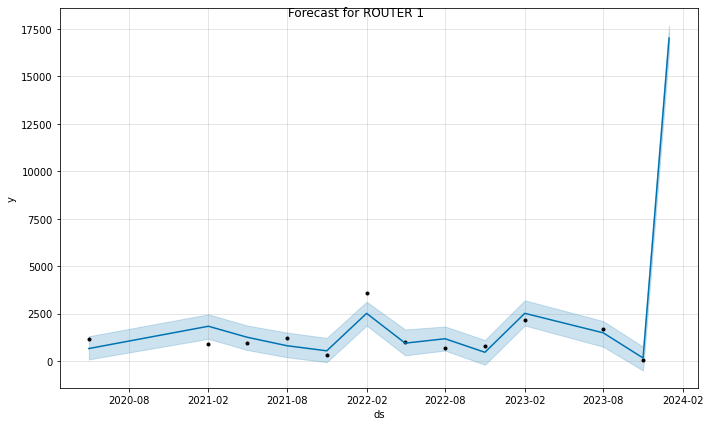

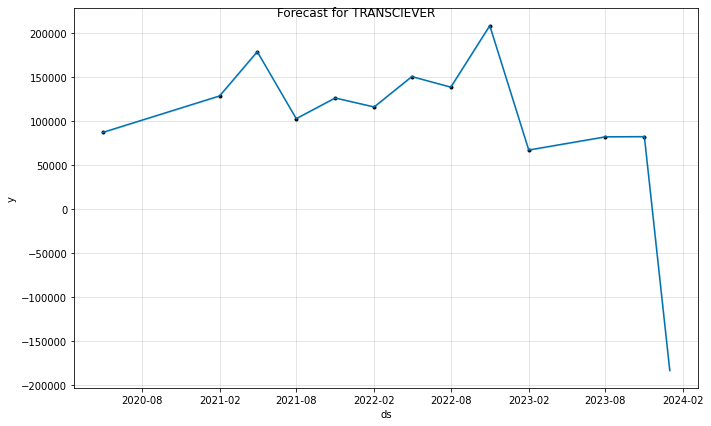

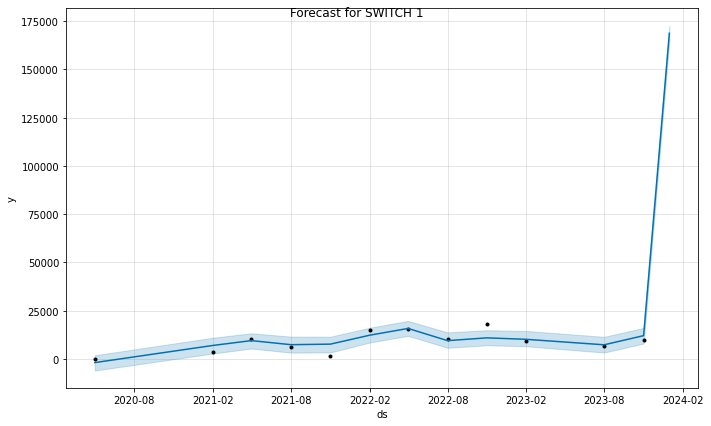

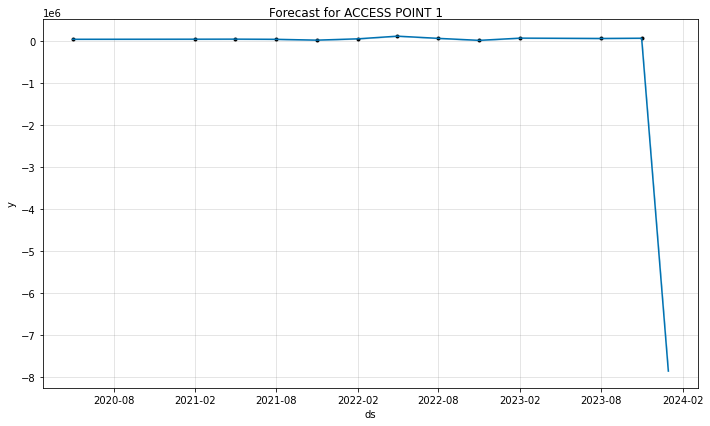

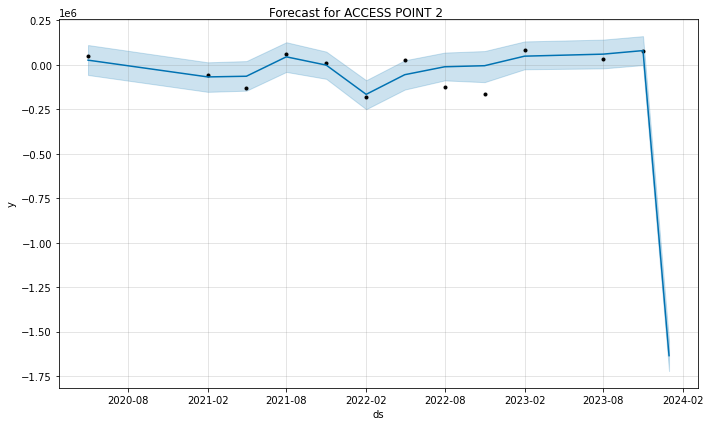

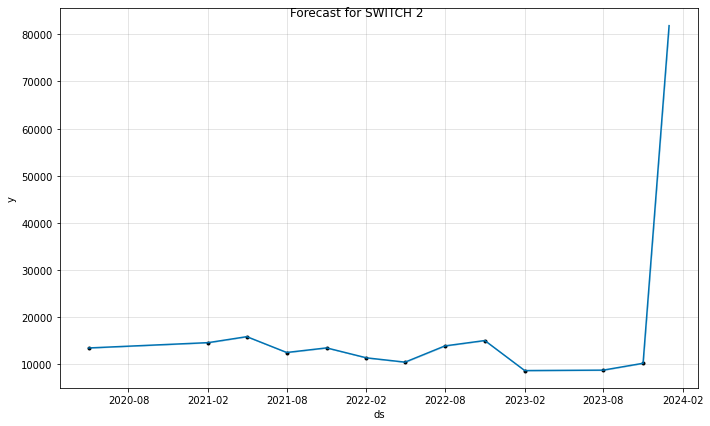

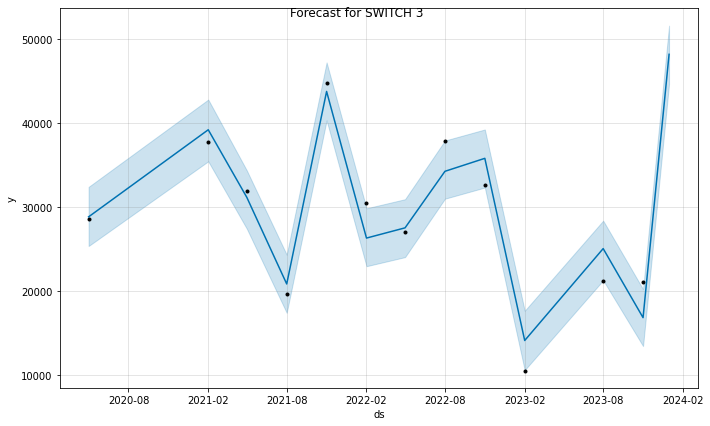

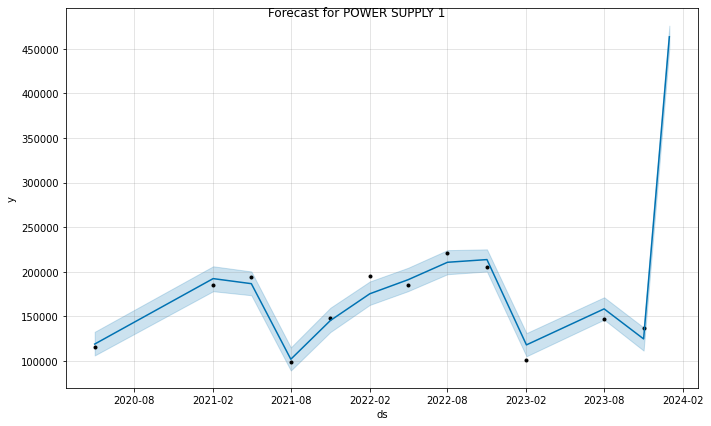

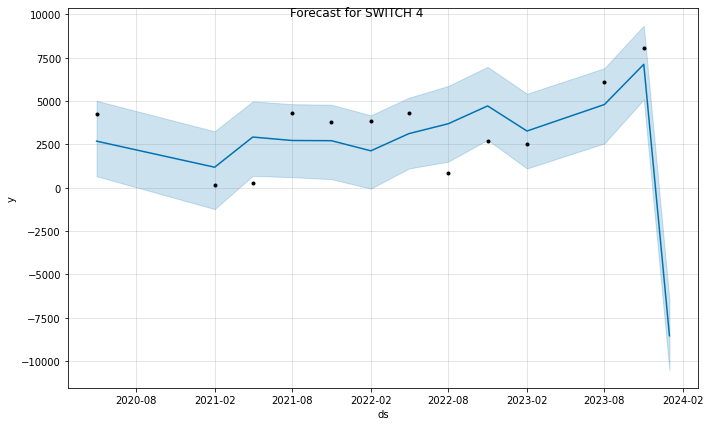

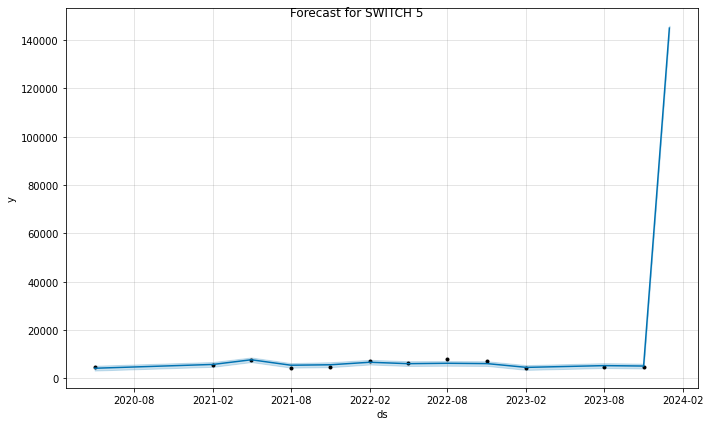

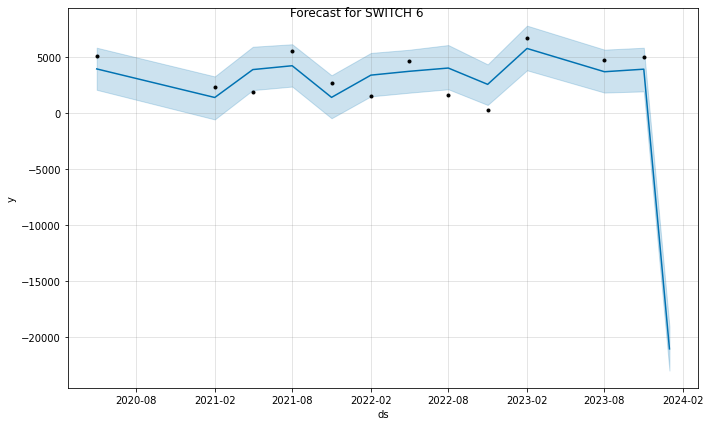

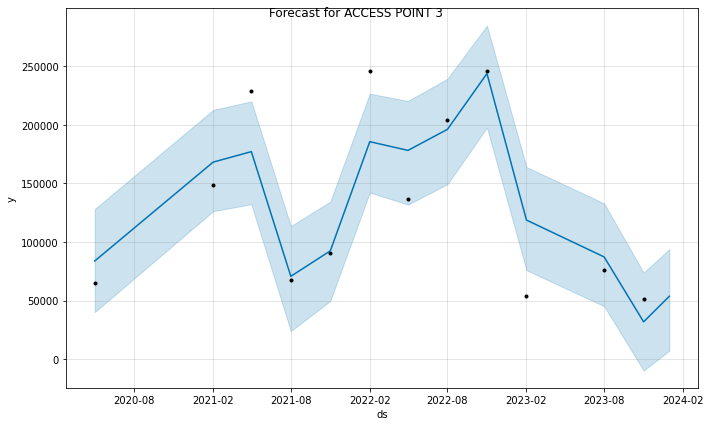

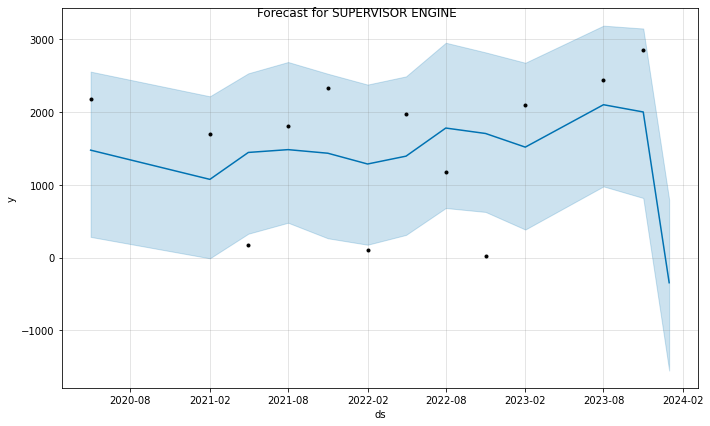

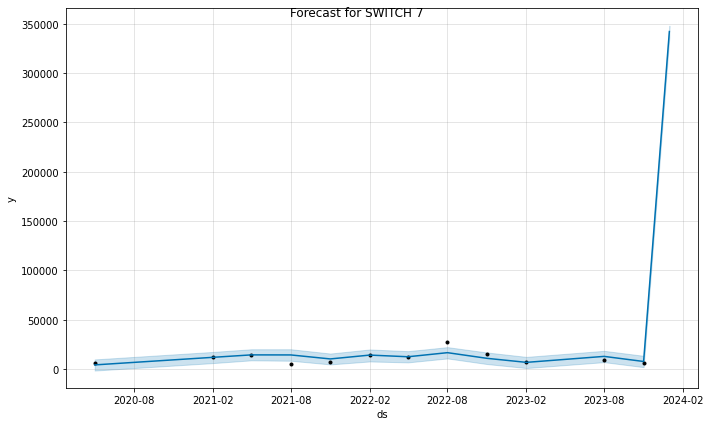

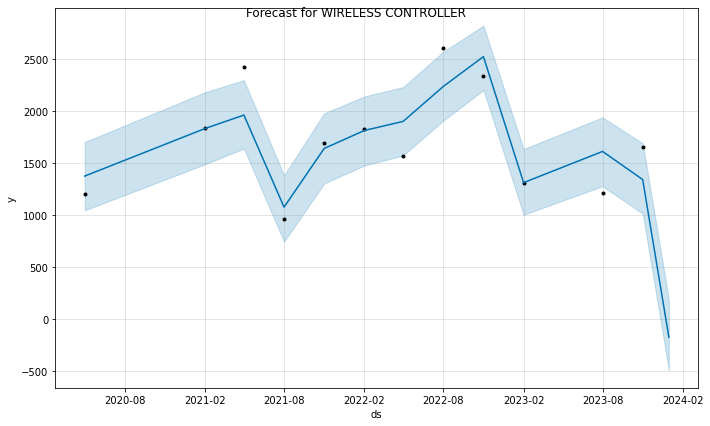

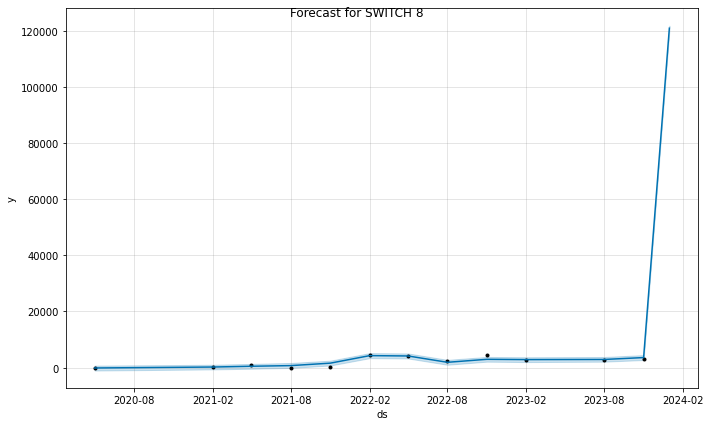

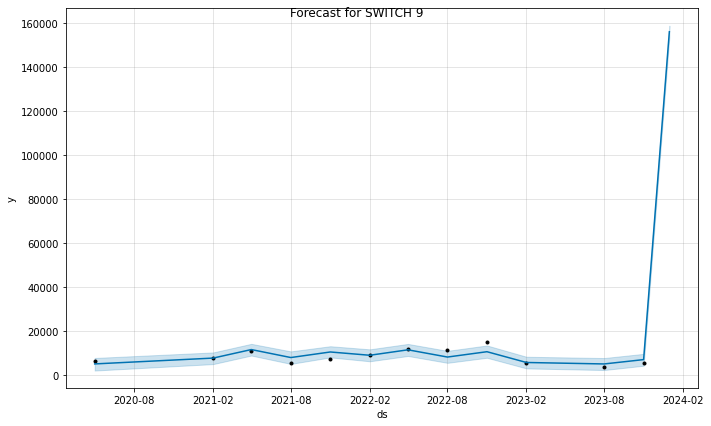

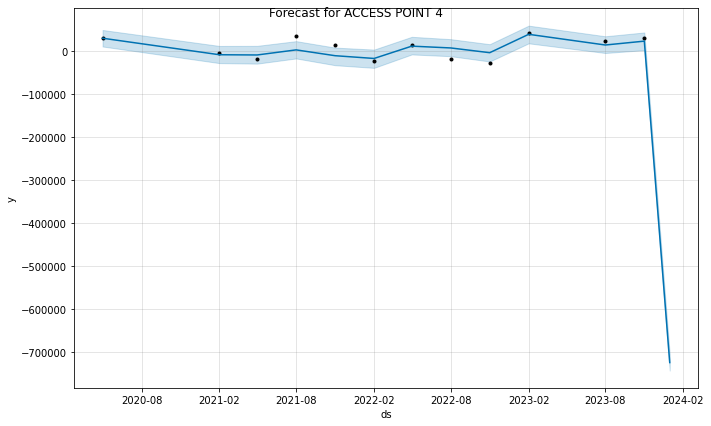

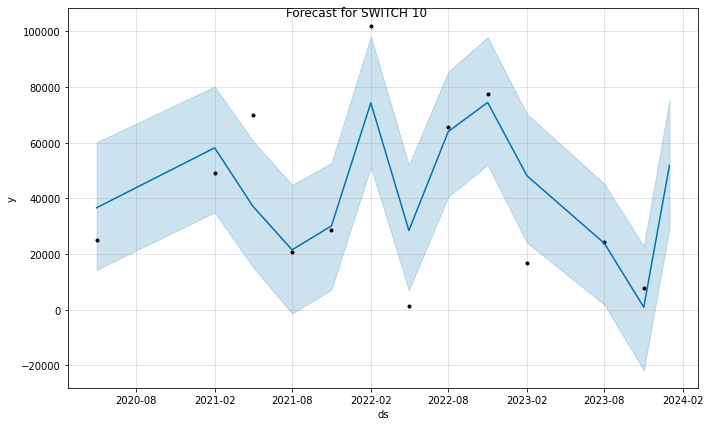

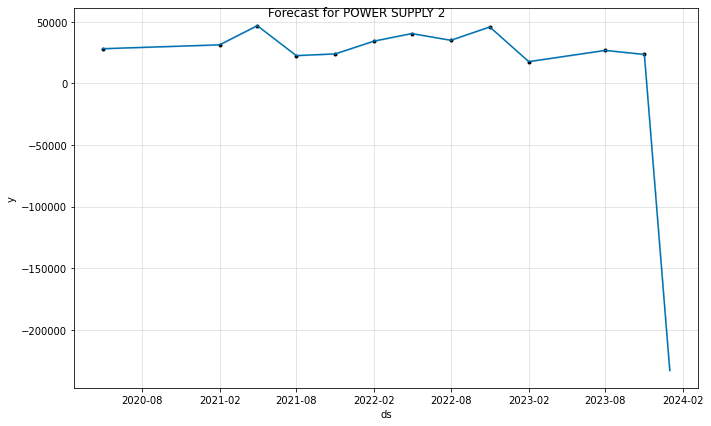

In [53]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ', product)
    # Prepare DataFrame for the current product
    product_df = scaled_iterative_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model with adjusted parameters
    model = Prophet(
        seasonality_mode='multiplicative',     # Adjust seasonality mode if needed
        changepoint_prior_scale=0.05,           # Adjust changepoint prior scale if needed
        holidays_prior_scale=10,                # Adjust holidays prior scale if needed              # Disable daily seasonality
    )

    # Add customized seasonality with reduced Fourier order
    # model.add_seasonality(name='quarterly', period=90, fourier_order=5)  # Adjust period and Fourier order as needed

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_iterative_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Handle outliers and anomalies
    # You can identify and handle outliers here before performing cross-validation
    # For example, you can remove outliers or replace them with more reasonable values

    # Perform cross-validation
    initial_period = 2 * 365  # Set initial period to cover at least 3 years of data
    cv_period = 365            # 1 year
    cv_horizon = 365           # 1 year
    df_cv = cross_validation(model, initial=f'{initial_period} days', period=f'{cv_period} days', horizon=f'{cv_horizon} days')

    # Compute performance metrics
    df_metrics = performance_metrics(df_cv)

    # Print the performance metrics
    print(df_metrics)

    # Make future predictions
    future = model.make_future_dataframe(periods=1, freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    # plt.show()
    # print('FORECAST:', forecast )


20:11:43 - cmdstanpy - INFO - Chain [1] start processing
20:11:43 - cmdstanpy - INFO - Chain [1] done processing


product:  ROUTER 1


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:43 - cmdstanpy - INFO - Chain [1] start processing
20:11:43 - cmdstanpy - INFO - Chain [1] done processing
20:11:43 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae       mape      mdape  \
0  92 days  1.546857e+07  3933.009821  3933.009821   1.836997   1.836997   
1 273 days  2.088206e+07  4569.689021  4569.689021   2.736341   2.736341   
2 365 days  1.127487e+06  1061.831995  1061.831995  27.942947  27.942947   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       1.0  
product:  TRANSCIEVER


20:11:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:44 - cmdstanpy - INFO - Chain [1] start processing
20:11:44 - cmdstanpy - INFO - Chain [1] done processing
20:11:44 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  5.183522e+11  7.199668e+05  7.199668e+05  10.724644  10.724644   
1 273 days  2.149431e+12  1.466094e+06  1.466094e+06  17.843721  17.843721   
2 365 days  1.605093e+13  4.006361e+06  4.006361e+06  48.616166  48.616166   

      smape  coverage  
0  1.685649       0.0  
1  1.798425       0.0  
2  1.920974       0.0  
product:  SWITCH 1


20:11:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:45 - cmdstanpy - INFO - Chain [1] start processing
20:11:45 - cmdstanpy - INFO - Chain [1] done processing
20:11:45 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  5.463237e+09   73913.712416   73913.712416   8.007119   8.007119   
1 273 days  3.255711e+10  180435.885582  180435.885582  26.006902  26.006902   
2 365 days  2.735856e+11  523054.138334  523054.138334  54.513198  54.513198   

      smape  coverage  
0  1.600285       0.0  
1  1.857178       0.0  
2  1.929220       0.0  
product:  ACCESS POINT 1


20:11:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:45 - cmdstanpy - INFO - Chain [1] start processing
20:11:45 - cmdstanpy - INFO - Chain [1] done processing
20:11:46 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  1.612342e+11  4.015398e+05  4.015398e+05   6.403327   6.403327   
1 273 days  1.418557e+12  1.191032e+06  1.191032e+06  21.672860  21.672860   
2 365 days  1.171271e+13  3.422383e+06  3.422383e+06  56.588896  56.588896   

      smape  coverage  
0  1.523998       0.0  
1  1.831030       0.0  
2  1.931728       0.0  
product:  ACCESS POINT 2


20:11:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:46 - cmdstanpy - INFO - Chain [1] start processing
20:11:46 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  3.792031e+08   19473.138597   19473.138597  0.240575  0.240575   
1 273 days  5.577462e+10  236166.499047  236166.499047  7.014152  7.014152   
2 365 days  4.440148e+11  666344.333399  666344.333399  8.902039  8.902039   

      smape  coverage  
0  0.214744       0.0  
1  1.556253       0.0  
2  1.633096       0.0  
product:  SWITCH 2


20:11:47 - cmdstanpy - INFO - Chain [1] start processing
20:11:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:47 - cmdstanpy - INFO - Chain [1] start processing
20:11:47 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  5.701547e+07  7550.858739  7550.858739  0.873437  0.873437   
1 273 days  4.448180e+07  6669.467723  6669.467723  0.764321  0.764321   
2 365 days  4.671865e+06  2161.449780  2161.449780  0.212219  0.212219   

      smape  coverage  
0  0.607939       0.0  
1  0.552990       0.0  
2  0.191861       0.0  
product:  SWITCH 3


20:11:48 - cmdstanpy - INFO - Chain [1] start processing
20:11:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:48 - cmdstanpy - INFO - Chain [1] start processing
20:11:48 - cmdstanpy - INFO - Chain [1] done processing
20:11:48 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  2.928632e+08  17113.247566  17113.247566  1.616898  1.616898   
1 273 days  1.133926e+07   3367.382156   3367.382156  0.158495  0.158495   
2 365 days  1.101384e+08  10494.684972  10494.684972  0.496226  0.496226   

      smape  coverage  
0  0.894080       0.0  
1  0.172136       1.0  
2  0.659974       0.0  
product:  POWER SUPPLY 1


20:11:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:48 - cmdstanpy - INFO - Chain [1] start processing
20:11:49 - cmdstanpy - INFO - Chain [1] done processing
20:11:49 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  7.179006e+08  26793.668056  26793.668056  0.266278  0.266278   
1 273 days  3.509820e+09  59243.732718  59243.732718  0.402241  0.402241   
2 365 days  8.852945e+08  29753.899507  29753.899507  0.217187  0.217187   

      smape  coverage  
0  0.234991       0.0  
1  0.503507       0.0  
2  0.243645       0.0  
product:  SWITCH 4


20:11:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:49 - cmdstanpy - INFO - Chain [1] start processing
20:11:49 - cmdstanpy - INFO - Chain [1] done processing
20:11:50 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.332320e+08   15271.933493   15271.933493   6.024431   6.024431   
1 273 days  1.362595e+09   36913.338832   36913.338832   6.062299   6.062299   
2 365 days  1.056298e+10  102776.382587  102776.382587  12.746668  12.746668   

      smape  coverage  
0  1.501522       0.0  
1  1.503864       0.0  
2  1.728752       0.0  
product:  SWITCH 5


20:11:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:50 - cmdstanpy - INFO - Chain [1] start processing
20:11:50 - cmdstanpy - INFO - Chain [1] done processing
20:11:51 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.603312e+06   1266.219527   1266.219527  0.287974  0.287974   
1 273 days  4.698799e+06   2167.671419   2167.671419  0.469600  0.469600   
2 365 days  1.773826e+08  13318.505274  13318.505274  2.845834  2.845834   

      smape  coverage  
0  0.251728       0.0  
1  0.380304       0.0  
2  1.174549       0.0  
product:  SWITCH 6


20:11:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:51 - cmdstanpy - INFO - Chain [1] start processing
20:11:51 - cmdstanpy - INFO - Chain [1] done processing
20:11:51 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  1.630036e+08   12767.284545   12767.284545   1.918162   1.918162   
1 273 days  2.288053e+09   47833.600486   47833.600486  10.040638  10.040638   
2 365 days  2.047252e+10  143082.200185  143082.200185  28.530847  28.530847   

      smape  coverage  
0  0.979113       0.0  
1  1.667792       0.0  
2  1.868985       0.0  
product:  ACCESS POINT 3


20:11:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:51 - cmdstanpy - INFO - Chain [1] start processing
20:11:52 - cmdstanpy - INFO - Chain [1] done processing
20:11:52 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.041242e+10  142872.038790  142872.038790   2.673954   2.673954   
1 273 days  5.208953e+10  228231.316968  228231.316968   3.002254   3.002254   
2 365 days  3.496324e+11  591297.175822  591297.175822  11.462358  11.462358   

      smape  coverage  
0  1.144194       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  SUPERVISOR ENGINE


20:11:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:52 - cmdstanpy - INFO - Chain [1] start processing
20:11:53 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  3.026397e+07   5501.269682   5501.269682   2.624652   2.624652   
1 273 days  3.247994e+08  18022.191112  18022.191112   7.425707   7.425707   
2 365 days  2.876155e+09  53629.793542  53629.793542  18.877083  18.877083   

      smape  coverage  
0  1.135070       0.0  
1  1.575629       0.0  
2  1.808402       0.0  
product:  SWITCH 7


20:11:53 - cmdstanpy - INFO - Chain [1] start processing
20:11:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:53 - cmdstanpy - INFO - Chain [1] start processing
20:11:54 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  7.710679e+09   87810.472740   87810.472740  13.218497  13.218497   
1 273 days  4.213495e+10  205267.993786  205267.993786  22.978618  22.978618   
2 365 days  3.046939e+11  551990.823007  551990.823007  93.415269  93.415269   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  
product:  WIRELESS CONTROLLER


20:11:54 - cmdstanpy - INFO - Chain [1] start processing
20:11:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:55 - cmdstanpy - INFO - Chain [1] start processing
20:11:55 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  1.354059e+04   116.364037   116.364037  0.088760  0.088760   
1 273 days  5.587199e+05   747.475712   747.475712  0.617749  0.617749   
2 365 days  3.538050e+06  1880.970430  1880.970430  1.133798  1.133798   

      smape  coverage  
0  0.092882       1.0  
1  0.893829       0.0  
2  2.000000       0.0  
product:  SWITCH 8


20:11:55 - cmdstanpy - INFO - Chain [1] start processing
20:11:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:56 - cmdstanpy - INFO - Chain [1] start processing
20:11:56 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.376629e+08   15416.317760   15416.317760   5.490142   5.490142   
1 273 days  1.410317e+09   37554.189596   37554.189596  13.626339  13.626339   
2 365 days  1.179380e+10  108599.284728  108599.284728  34.740654  34.740654   

      smape  coverage  
0  1.465965       0.0  
1  1.744022       0.0  
2  1.891129       0.0  
product:  SWITCH 9


20:11:56 - cmdstanpy - INFO - Chain [1] start processing
20:11:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:57 - cmdstanpy - INFO - Chain [1] start processing
20:11:57 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.218492e+09   47100.870217   47100.870217   8.418386   8.418386   
1 273 days  1.118775e+10  105772.150318  105772.150318  27.922954  27.922954   
2 365 days  9.472883e+10  307780.497231  307780.497231  57.658392  57.658392   

      smape  coverage  
0  1.616063       0.0  
1  1.866323       0.0  
2  1.932952       0.0  


20:11:57 - cmdstanpy - INFO - Chain [1] start processing


product:  ACCESS POINT 4


20:11:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:57 - cmdstanpy - INFO - Chain [1] start processing
20:11:58 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  8.531365e+07    9236.539012    9236.539012   0.228035   0.228035   
1 273 days  1.254316e+10  111996.266366  111996.266366   5.168979   5.168979   
2 365 days  1.133355e+11  336653.430419  336653.430419  11.038541  11.038541   

      smape  coverage  
0  0.204696       0.0  
1  1.442040       0.0  
2  1.693217       0.0  
product:  SWITCH 10


20:11:58 - cmdstanpy - INFO - Chain [1] start processing
20:11:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:58 - cmdstanpy - INFO - Chain [1] start processing
20:11:58 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.480899e+08  12169.219580  12169.219580  0.725568  0.725568   
1 273 days  1.396559e+08  11817.611777  11817.611777  0.488614  0.488614   
2 365 days  6.913727e+08  26293.967204  26293.967204  3.423694  3.423694   

      smape  coverage  
0  1.138652       0.0  
1  0.646577       0.0  
2  1.262495       0.0  
product:  POWER SUPPLY 2


20:11:59 - cmdstanpy - INFO - Chain [1] start processing
20:11:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:11:59 - cmdstanpy - INFO - Chain [1] start processing
20:11:59 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  3.208572e+10  1.791249e+05  1.791249e+05  10.063760  10.063760   
1 273 days  1.582536e+11  3.978110e+05  3.978110e+05  14.774784  14.774784   
2 365 days  1.561812e+12  1.249725e+06  1.249725e+06  52.876023  52.876023   

      smape  coverage  
0  1.668428       0.0  
1  1.761547       0.0  
2  1.927108       0.0  


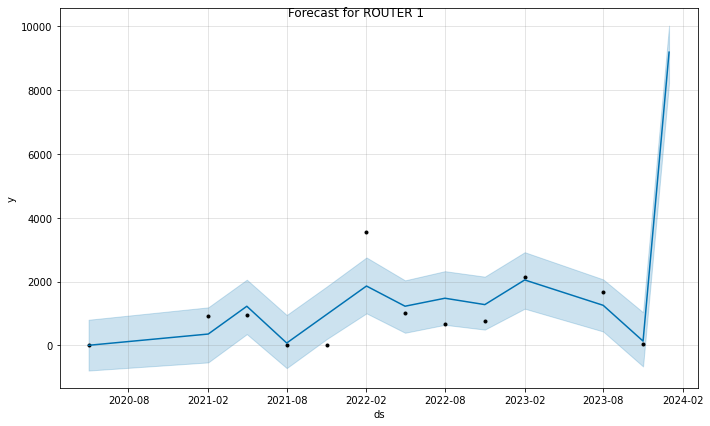

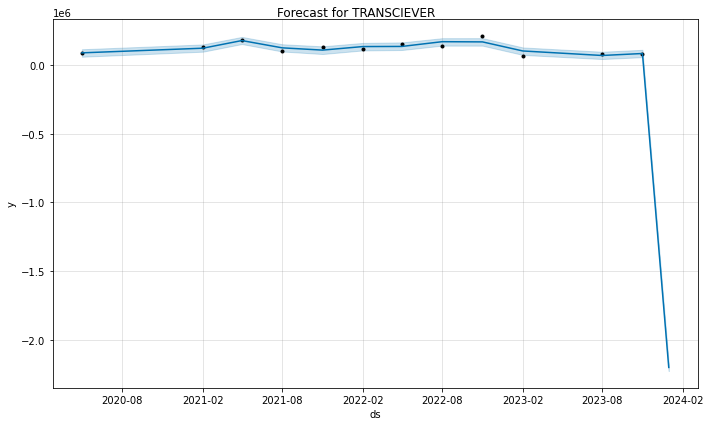

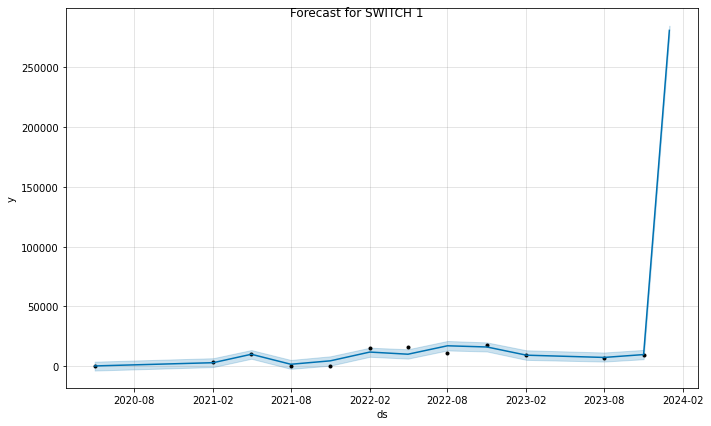

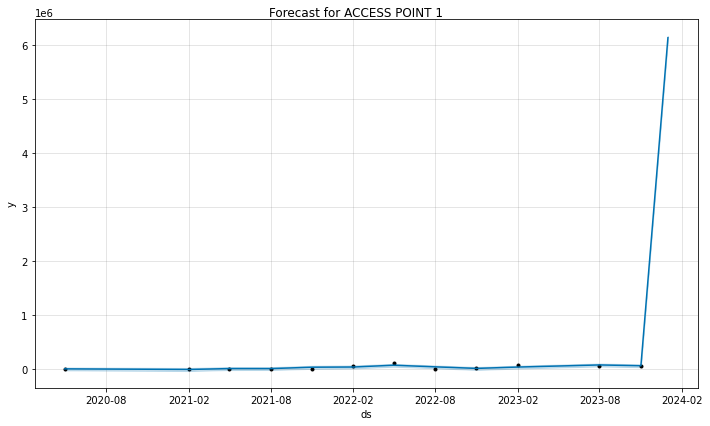

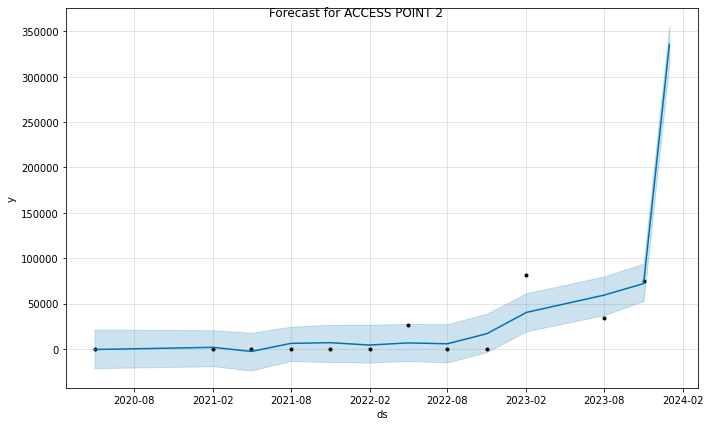

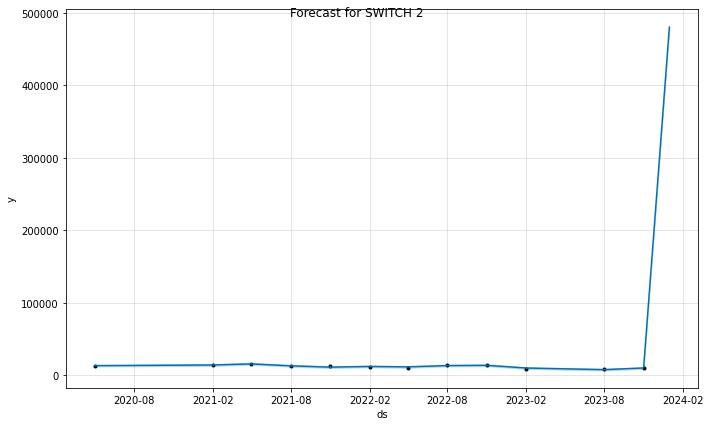

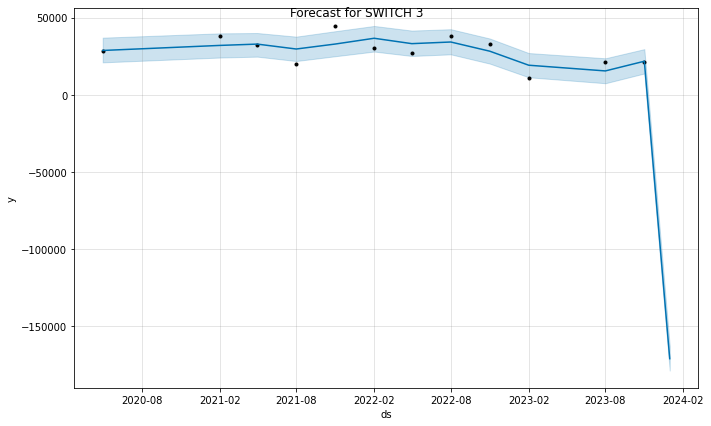

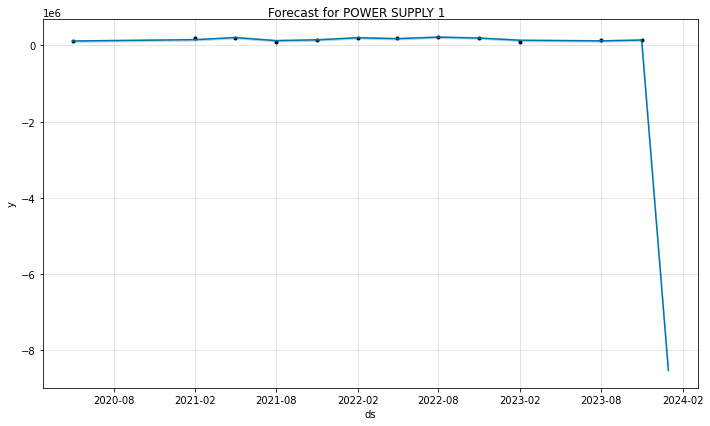

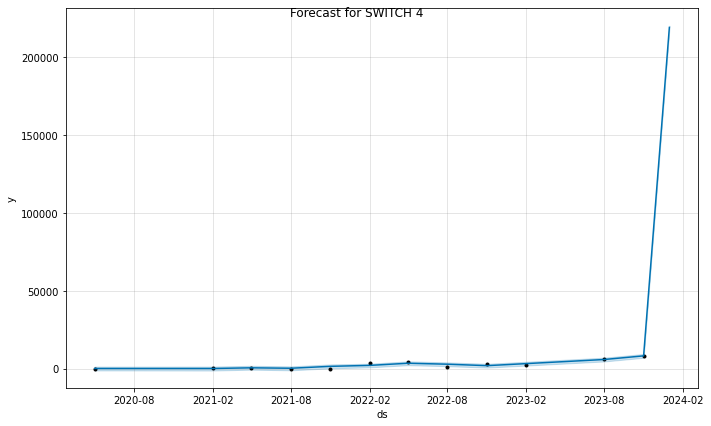

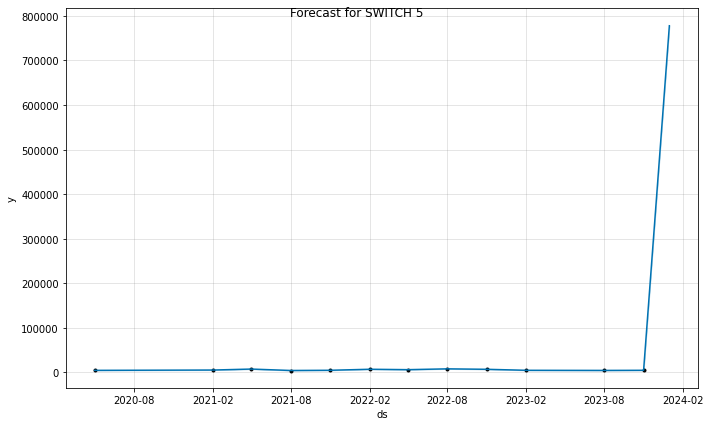

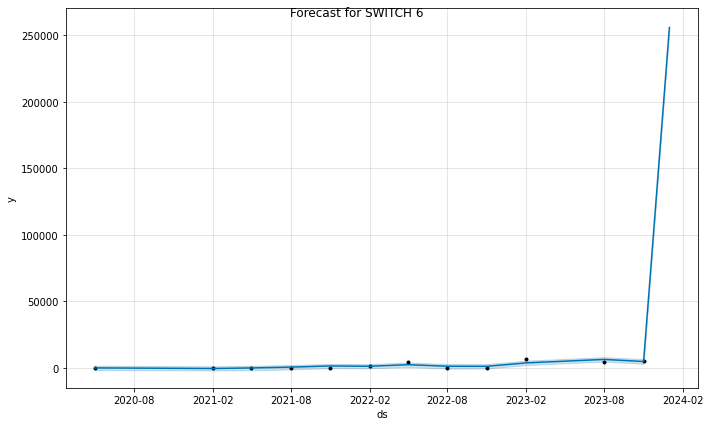

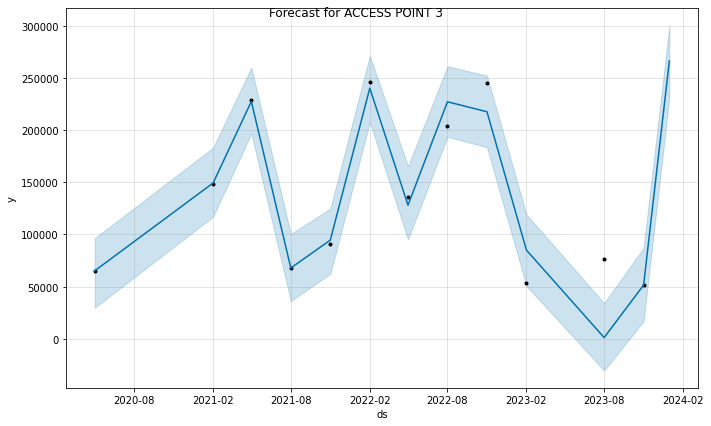

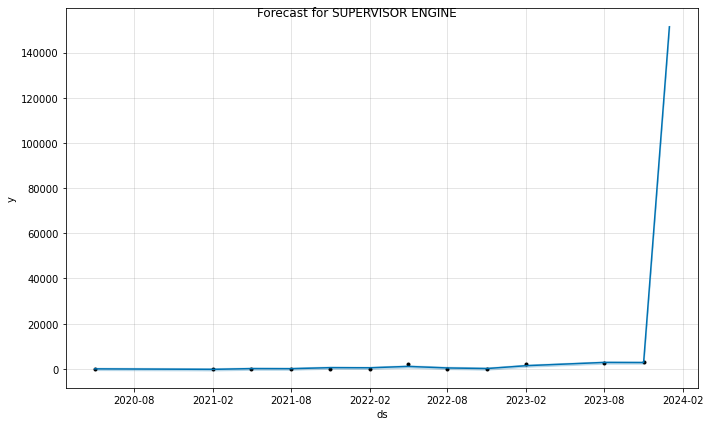

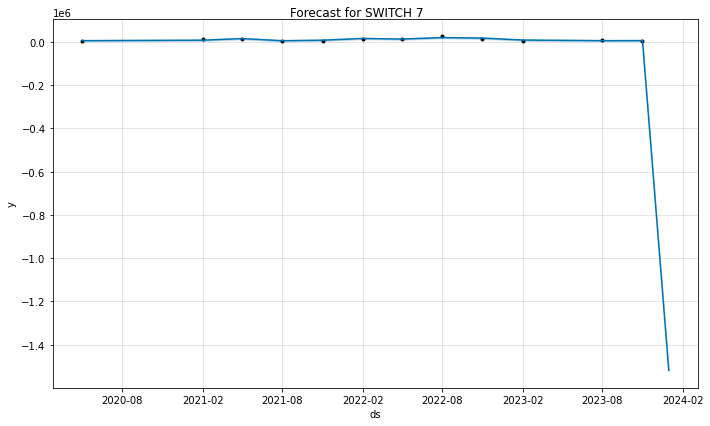

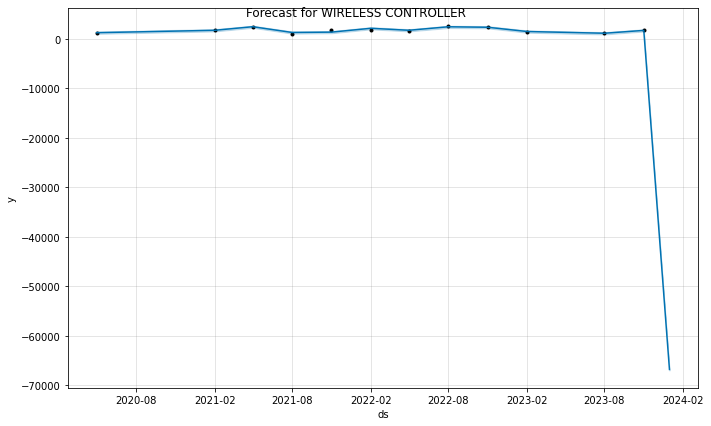

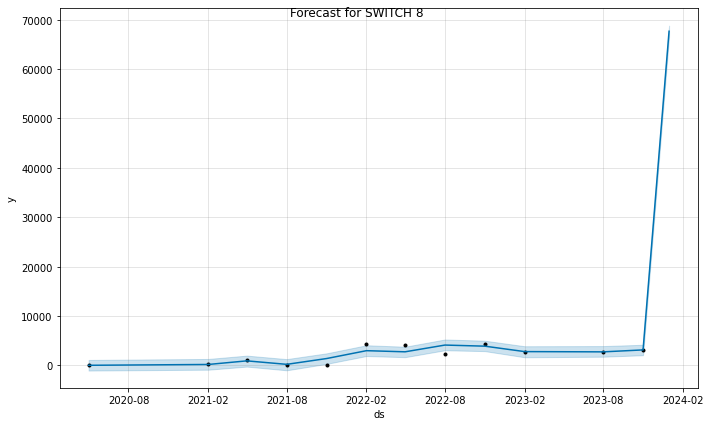

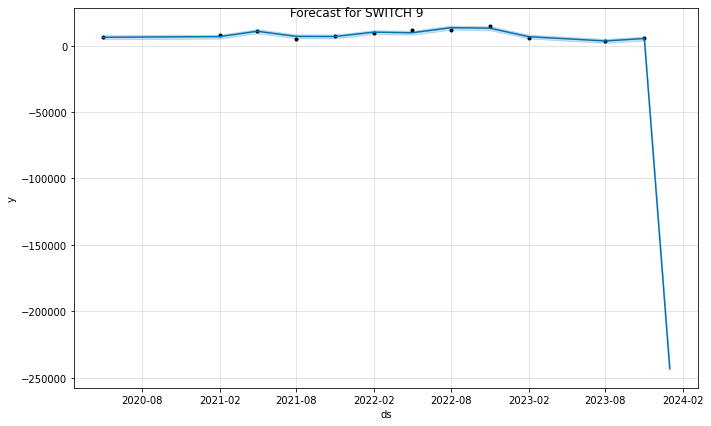

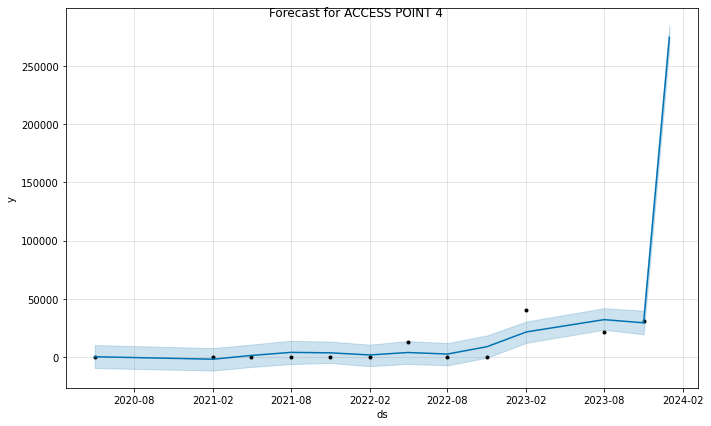

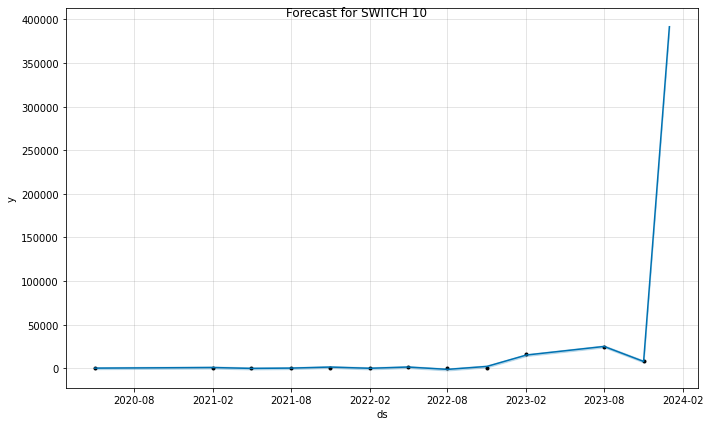

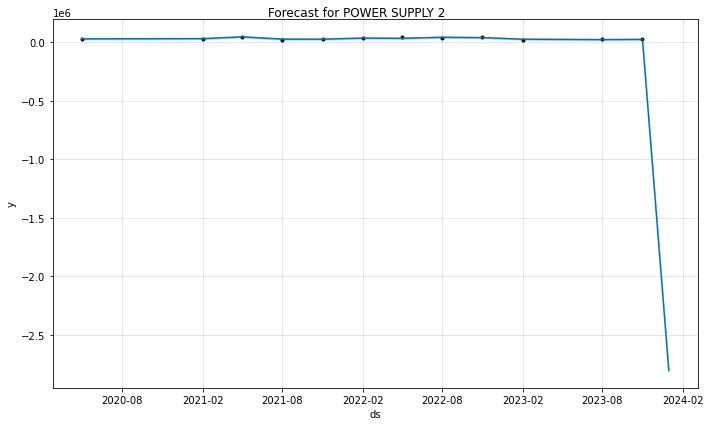

In [54]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ', product)
    # Prepare DataFrame for the current product
    product_df = scaled_0_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model with adjusted parameters
    model = Prophet(
        seasonality_mode='multiplicative',     # Adjust seasonality mode if needed
        changepoint_prior_scale=0.05,           # Adjust changepoint prior scale if needed
        holidays_prior_scale=10,                # Adjust holidays prior scale if needed
        yearly_seasonality=False,               # Disable yearly seasonality
        weekly_seasonality=False,               # Disable weekly seasonality
        daily_seasonality=False                # Disable daily seasonality
    )

    # Add customized seasonality with reduced Fourier order
    model.add_seasonality(name='quarterly', period=90, fourier_order=5)  # Adjust period and Fourier order as needed

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_0_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Handle outliers and anomalies
    # You can identify and handle outliers here before performing cross-validation
    # For example, you can remove outliers or replace them with more reasonable values

    # Perform cross-validation
    initial_period = 2 * 365  # Set initial period to cover at least 3 years of data
    cv_period = 365            # 1 year
    cv_horizon = 365           # 1 year
    df_cv = cross_validation(model, initial=f'{initial_period} days', period=f'{cv_period} days', horizon=f'{cv_horizon} days')

    # Compute performance metrics
    df_metrics = performance_metrics(df_cv)

    # Print the performance metrics
    print(df_metrics)

    # Make future predictions
    future = model.make_future_dataframe(periods=1, freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    # plt.show()
    # print('FORECAST:', forecast )


20:12:08 - cmdstanpy - INFO - Chain [1] start processing


product:  ROUTER 1


20:12:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:09 - cmdstanpy - INFO - Chain [1] start processing
20:12:09 - cmdstanpy - INFO - Chain [1] done processing
20:12:09 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae       mape      mdape  \
0  92 days  1.546886e+07  3933.047436  3933.047436   1.837014   1.837014   
1 273 days  2.088263e+07  4569.751173  4569.751173   2.736378   2.736378   
2 365 days  1.127698e+06  1061.931168  1061.931168  27.945557  27.945557   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  
product:  TRANSCIEVER


20:12:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:10 - cmdstanpy - INFO - Chain [1] start processing
20:12:10 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  5.180653e+11  7.197676e+05  7.197676e+05  10.721676  10.721676   
1 273 days  2.146647e+12  1.465144e+06  1.465144e+06  17.832163  17.832163   
2 365 days  1.601214e+13  4.001517e+06  4.001517e+06  48.557381  48.557381   

      smape  coverage  
0  1.685576       0.0  
1  1.798307       0.0  
2  1.920882       0.0  
product:  SWITCH 1


20:12:10 - cmdstanpy - INFO - Chain [1] start processing
20:12:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:11 - cmdstanpy - INFO - Chain [1] start processing
20:12:11 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  5.463237e+09   73913.712420   73913.712420   8.007119   8.007119   
1 273 days  3.255711e+10  180435.885592  180435.885592  26.006902  26.006902   
2 365 days  2.735856e+11  523054.138365  523054.138365  54.513198  54.513198   

      smape  coverage  
0  1.600285       0.0  
1  1.857178       0.0  
2  1.929220       0.0  
product:  ACCESS POINT 1


20:12:11 - cmdstanpy - INFO - Chain [1] start processing
20:12:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:11 - cmdstanpy - INFO - Chain [1] start processing
20:12:12 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  1.618524e+11  4.023088e+05  4.023088e+05   6.415590   6.415590   
1 273 days  1.424721e+12  1.193617e+06  1.193617e+06  21.719896  21.719896   
2 365 days  1.177642e+13  3.431679e+06  3.431679e+06  56.742601  56.742601   

      smape  coverage  
0  1.524692       0.0  
1  1.831365       0.0  
2  1.931906       0.0  
product:  ACCESS POINT 2


20:12:12 - cmdstanpy - INFO - Chain [1] start processing
20:12:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:12 - cmdstanpy - INFO - Chain [1] start processing
20:12:12 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  3.791879e+08   19472.748837   19472.748837  0.240571  0.240571   
1 273 days  5.577449e+10  236166.238194  236166.238194  7.014144  7.014144   
2 365 days  4.440163e+11  666345.453093  666345.453093  8.902054  8.902054   

      smape  coverage  
0  0.214740       0.0  
1  1.556253       0.0  
2  1.633097       0.0  
product:  SWITCH 2


20:12:13 - cmdstanpy - INFO - Chain [1] start processing
20:12:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:13 - cmdstanpy - INFO - Chain [1] start processing
20:12:13 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  5.701547e+07  7550.858740  7550.858740  0.873437  0.873437   
1 273 days  4.448180e+07  6669.467724  6669.467724  0.764321  0.764321   
2 365 days  4.671865e+06  2161.449781  2161.449781  0.212219  0.212219   

      smape  coverage  
0  0.607939       0.0  
1  0.552990       0.0  
2  0.191861       0.0  


20:12:14 - cmdstanpy - INFO - Chain [1] start processing


product:  SWITCH 3


20:12:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:14 - cmdstanpy - INFO - Chain [1] start processing
20:12:14 - cmdstanpy - INFO - Chain [1] done processing
20:12:15 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  2.928632e+08  17113.247566  17113.247566  1.616898  1.616898   
1 273 days  1.133926e+07   3367.382156   3367.382156  0.158495  0.158495   
2 365 days  1.101384e+08  10494.684972  10494.684972  0.496226  0.496226   

      smape  coverage  
0  0.894080       0.0  
1  0.172136       1.0  
2  0.659974       0.0  
product:  POWER SUPPLY 1


20:12:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:15 - cmdstanpy - INFO - Chain [1] start processing
20:12:15 - cmdstanpy - INFO - Chain [1] done processing
20:12:16 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  7.179006e+08  26793.668056  26793.668056  0.266278  0.266278   
1 273 days  3.509820e+09  59243.732718  59243.732718  0.402241  0.402241   
2 365 days  8.852945e+08  29753.899507  29753.899507  0.217187  0.217187   

      smape  coverage  
0  0.234991       0.0  
1  0.503507       0.0  
2  0.243645       0.0  
product:  SWITCH 4


20:12:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:16 - cmdstanpy - INFO - Chain [1] start processing
20:12:16 - cmdstanpy - INFO - Chain [1] done processing
20:12:16 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.332336e+08   15271.986209   15271.986209   6.024452   6.024452   
1 273 days  1.362601e+09   36913.428567   36913.428567   6.062314   6.062314   
2 365 days  1.056300e+10  102776.467952  102776.467952  12.746678  12.746678   

      smape  coverage  
0  1.501524       0.0  
1  1.503865       0.0  
2  1.728752       0.0  
product:  SWITCH 5


20:12:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:17 - cmdstanpy - INFO - Chain [1] start processing
20:12:17 - cmdstanpy - INFO - Chain [1] done processing
20:12:17 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.719971e+06   1311.476498   1311.476498  0.298266  0.298266   
1 273 days  5.204740e+06   2281.389871   2281.389871  0.494235  0.494235   
2 365 days  1.885308e+08  13730.651627  13730.651627  2.933900  2.933900   

      smape  coverage  
0  0.259558       0.0  
1  0.396302       0.0  
2  1.189282       0.0  
product:  SWITCH 6


20:12:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:17 - cmdstanpy - INFO - Chain [1] start processing
20:12:17 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  1.614306e+08   12705.534121   12705.534121   1.908884   1.908884   
1 273 days  2.271507e+09   47660.329533   47660.329533  10.004267  10.004267   
2 365 days  2.031533e+10  142531.840739  142531.840739  28.421105  28.421105   

      smape  coverage  
0  0.976690       0.0  
1  1.666785       0.0  
2  1.868512       0.0  
product:  ACCESS POINT 3


20:12:18 - cmdstanpy - INFO - Chain [1] start processing
20:12:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:18 - cmdstanpy - INFO - Chain [1] start processing
20:12:19 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.036423e+10  142703.293271  142703.293271   2.670796   2.670796   
1 273 days  5.203874e+10  228120.022687  228120.022687   3.000790   3.000790   
2 365 days  3.482811e+11  590153.470858  590153.470858  11.440187  11.440187   

      smape  coverage  
0  1.143615       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  SUPERVISOR ENGINE


20:12:19 - cmdstanpy - INFO - Chain [1] start processing
20:12:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:19 - cmdstanpy - INFO - Chain [1] start processing
20:12:20 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  3.026190e+07   5501.081416   5501.081416   2.624562   2.624562   
1 273 days  3.247829e+08  18021.733869  18021.733869   7.425519   7.425519   
2 365 days  2.875974e+09  53628.105576  53628.105576  18.876489  18.876489   

      smape  coverage  
0  1.135053       0.0  
1  1.575620       0.0  
2  1.808397       0.0  
product:  SWITCH 7


20:12:20 - cmdstanpy - INFO - Chain [1] start processing
20:12:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:21 - cmdstanpy - INFO - Chain [1] start processing
20:12:21 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  7.629715e+09   87348.239364   87348.239364  13.148915  13.148915   
1 273 days  4.171744e+10  204248.473575  204248.473575  22.864488  22.864488   
2 365 days  3.011710e+11  548790.519570  548790.519570  92.873671  92.873671   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  


20:12:21 - cmdstanpy - INFO - Chain [1] start processing


product:  WIRELESS CONTROLLER


20:12:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:22 - cmdstanpy - INFO - Chain [1] start processing
20:12:22 - cmdstanpy - INFO - Chain [1] done processing
20:12:22 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  1.354059e+04   116.364037   116.364037  0.088760  0.088760   
1 273 days  5.587199e+05   747.475712   747.475712  0.617749  0.617749   
2 365 days  3.538050e+06  1880.970430  1880.970430  1.133798  1.133798   

      smape  coverage  
0  0.092882       1.0  
1  0.893829       0.0  
2  2.000000       0.0  
product:  SWITCH 8


20:12:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:23 - cmdstanpy - INFO - Chain [1] start processing
20:12:23 - cmdstanpy - INFO - Chain [1] done processing
20:12:23 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.376699e+08   15416.544933   15416.544933   5.490223   5.490223   
1 273 days  1.410363e+09   37554.804251   37554.804251  13.626562  13.626562   
2 365 days  1.179423e+10  108601.239357  108601.239357  34.741279  34.741279   

      smape  coverage  
0  1.465970       0.0  
1  1.744026       0.0  
2  1.891131       0.0  
product:  SWITCH 9


20:12:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:23 - cmdstanpy - INFO - Chain [1] start processing
20:12:24 - cmdstanpy - INFO - Chain [1] done processing
20:12:24 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.234464e+09   47270.113720   47270.113720   8.448635   8.448635   
1 273 days  1.127137e+10  106166.709790  106166.709790  28.027115  28.027115   
2 365 days  9.556719e+10  309139.431291  309139.431291  57.912970  57.912970   

      smape  coverage  
0  1.617175       0.0  
1  1.866787       0.0  
2  1.933236       0.0  
product:  ACCESS POINT 4


20:12:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:24 - cmdstanpy - INFO - Chain [1] start processing
20:12:24 - cmdstanpy - INFO - Chain [1] done processing
20:12:25 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  8.531448e+07    9236.583633    9236.583633   0.228036   0.228036   
1 273 days  1.254325e+10  111996.635899  111996.635899   5.168996   5.168996   
2 365 days  1.133367e+11  336655.227064  336655.227064  11.038600  11.038600   

      smape  coverage  
0  0.204697       0.0  
1  1.442042       0.0  
2  1.693219       0.0  
product:  SWITCH 10


20:12:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:25 - cmdstanpy - INFO - Chain [1] start processing
20:12:25 - cmdstanpy - INFO - Chain [1] done processing
20:12:25 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.480902e+08  12169.233593  12169.233593  0.725568  0.725568   
1 273 days  1.396562e+08  11817.620340  11817.620340  0.488614  0.488614   
2 365 days  6.913754e+08  26294.018087  26294.018087  3.423700  3.423700   

      smape  coverage  
0  1.138654       0.0  
1  0.646578       0.0  
2  1.262496       0.0  
product:  POWER SUPPLY 2


20:12:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:26 - cmdstanpy - INFO - Chain [1] start processing
20:12:26 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  3.208572e+10  1.791249e+05  1.791249e+05  10.063760  10.063760   
1 273 days  1.582536e+11  3.978110e+05  3.978110e+05  14.774784  14.774784   
2 365 days  1.561812e+12  1.249725e+06  1.249725e+06  52.876023  52.876023   

      smape  coverage  
0  1.668428       0.0  
1  1.761547       0.0  
2  1.927108       0.0  


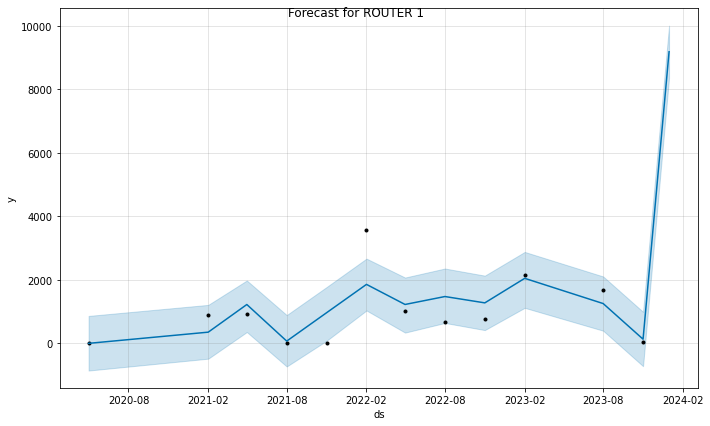

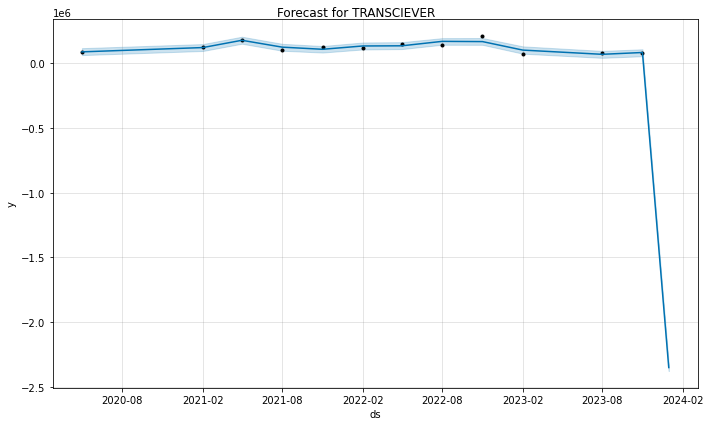

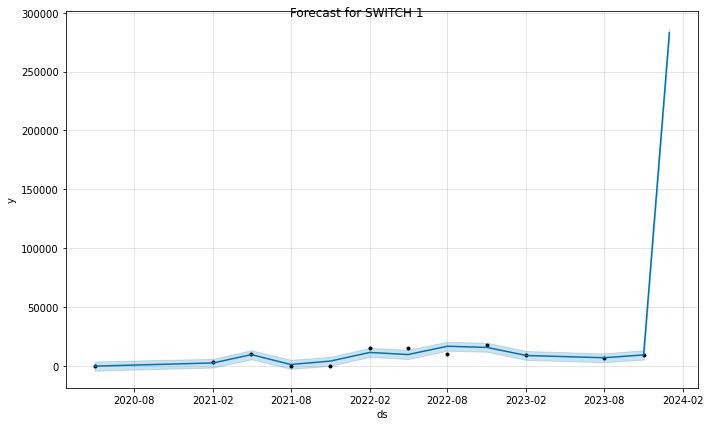

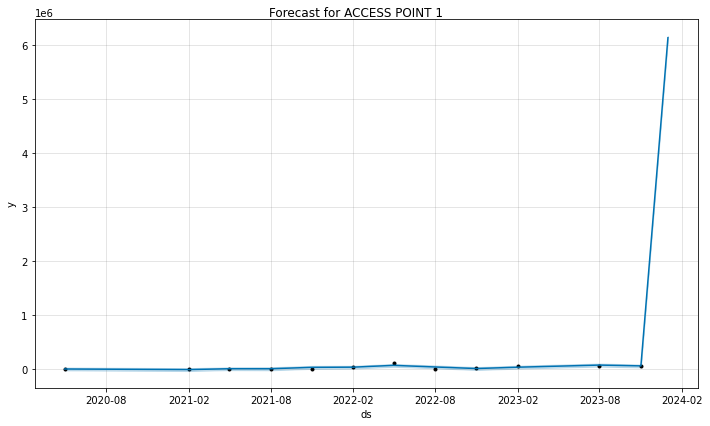

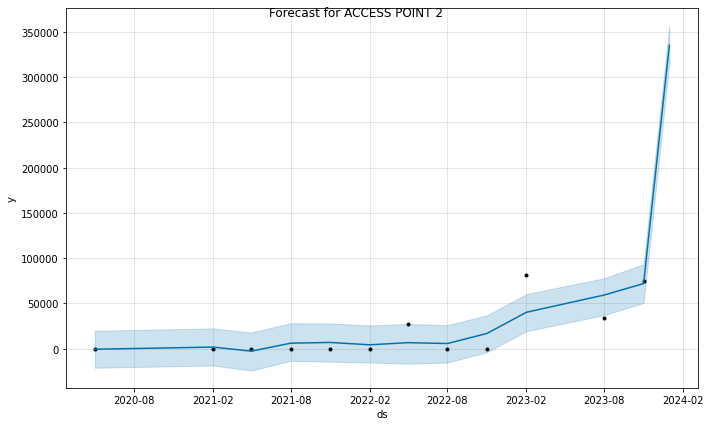

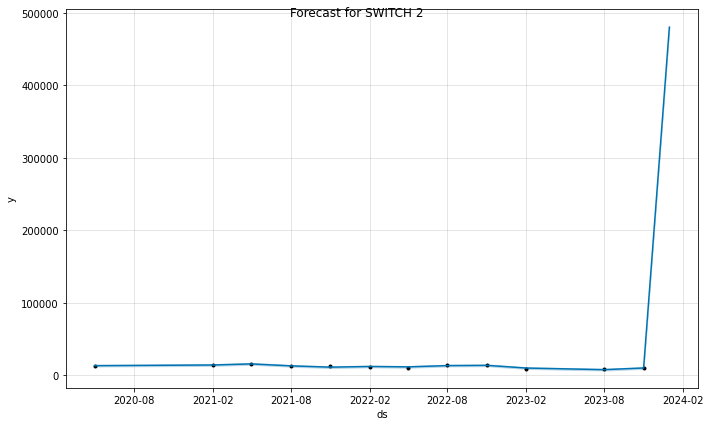

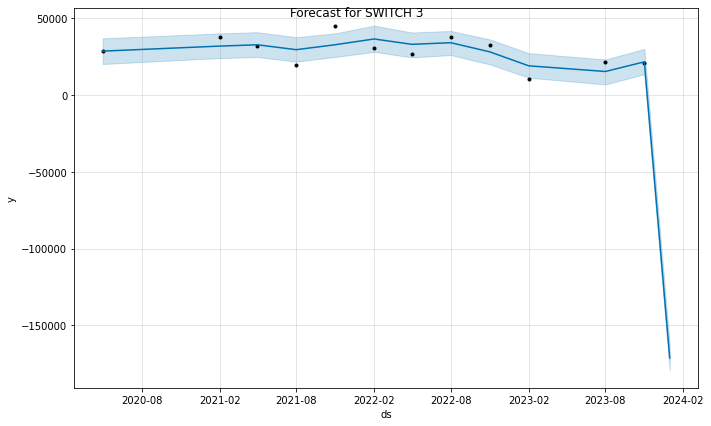

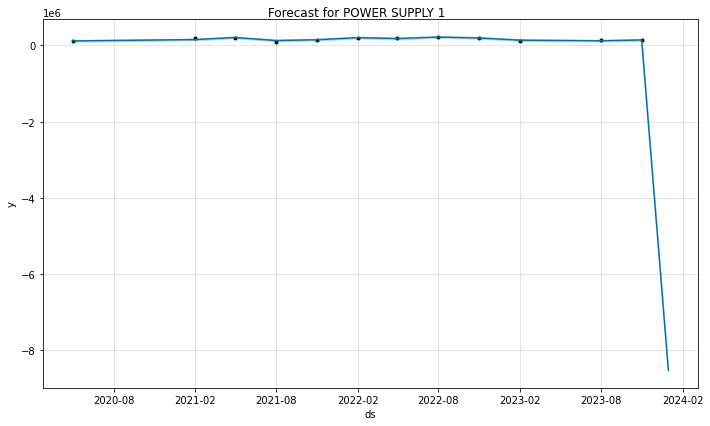

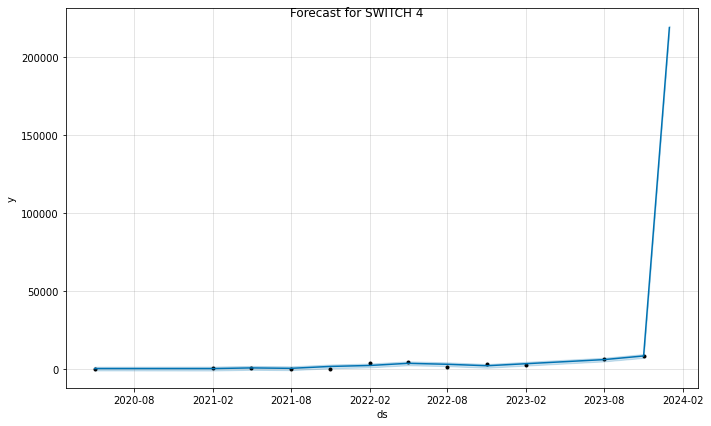

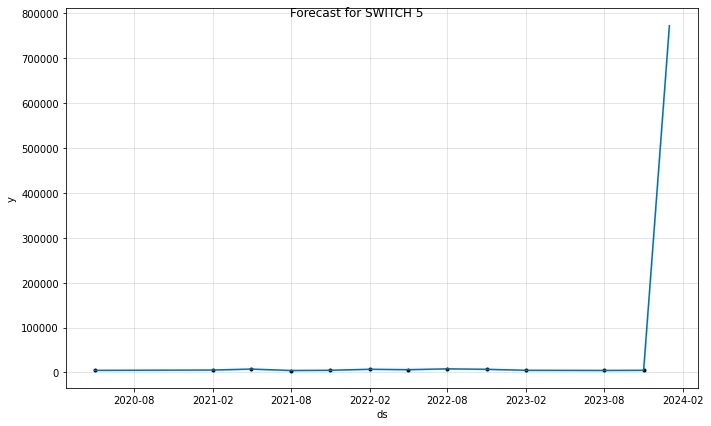

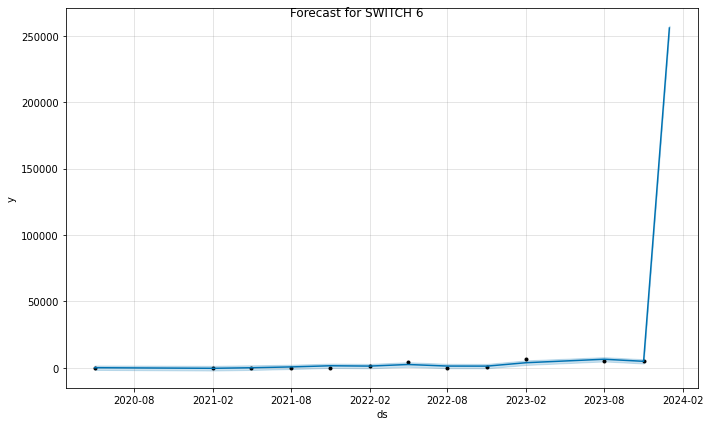

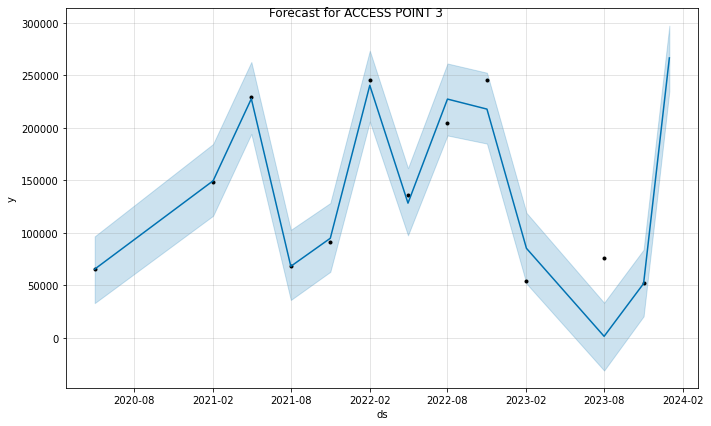

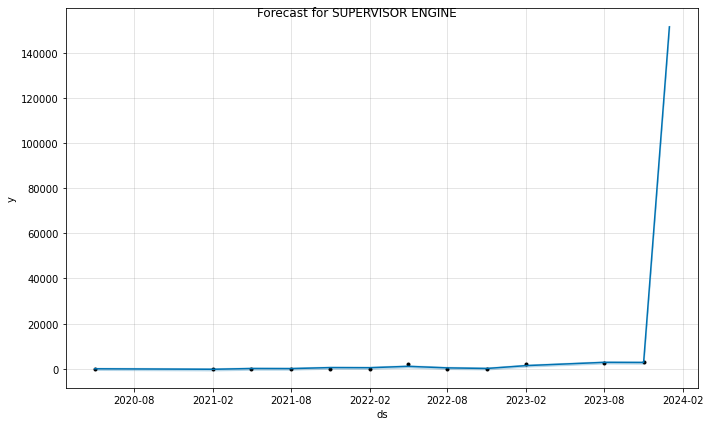

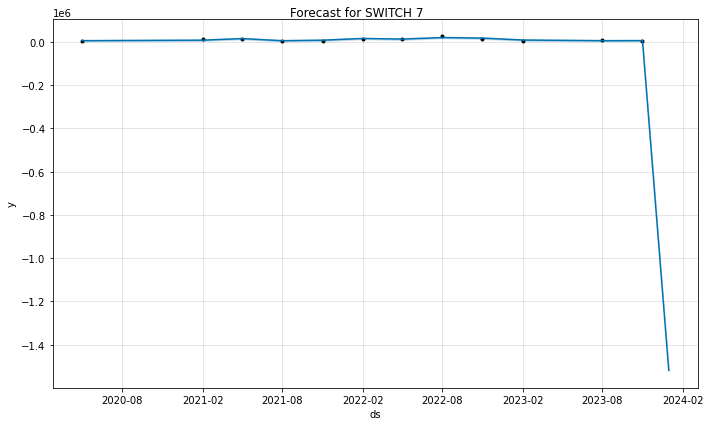

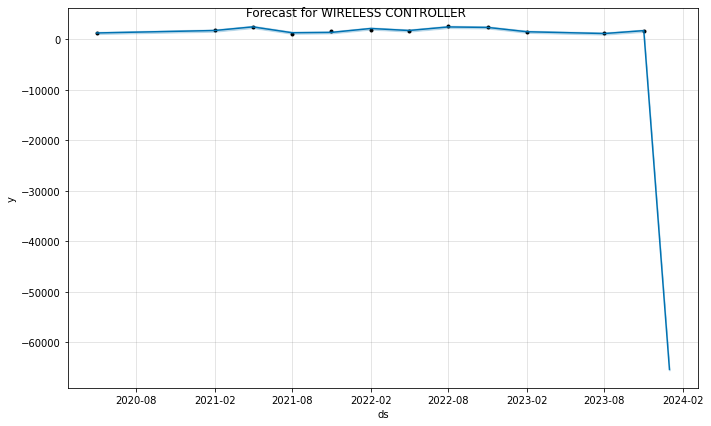

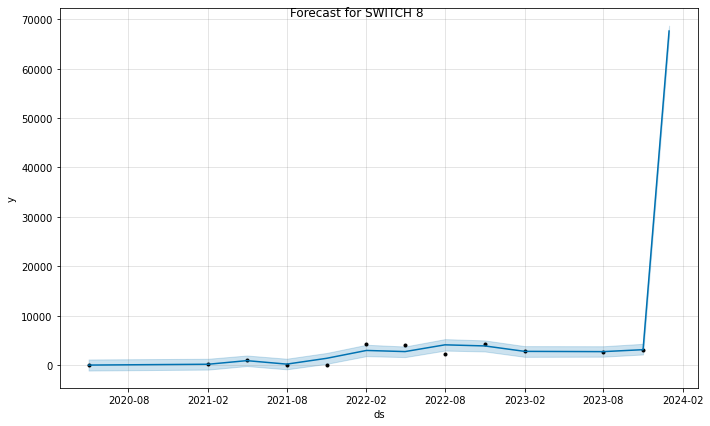

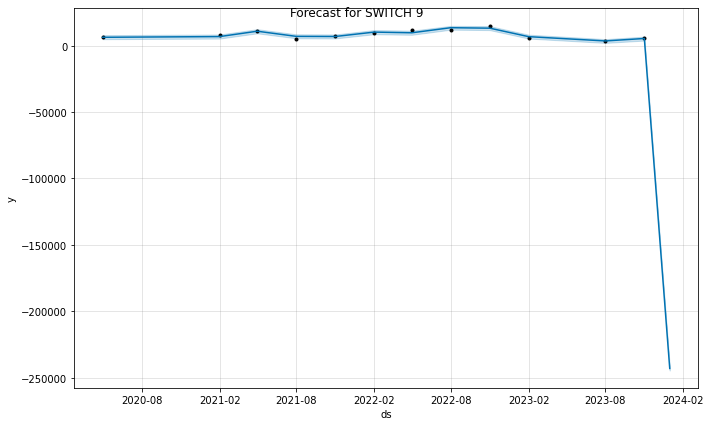

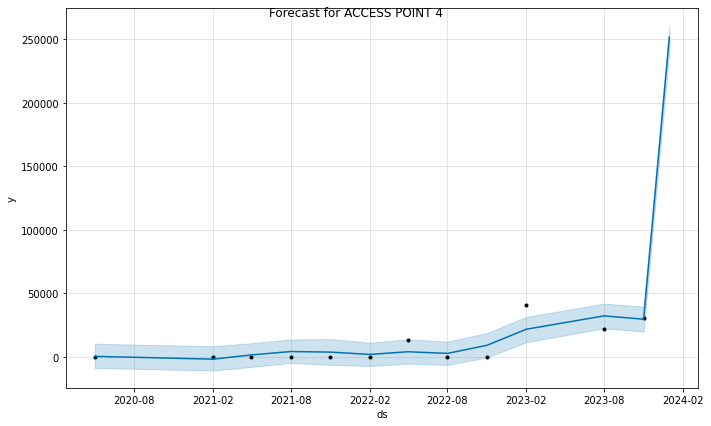

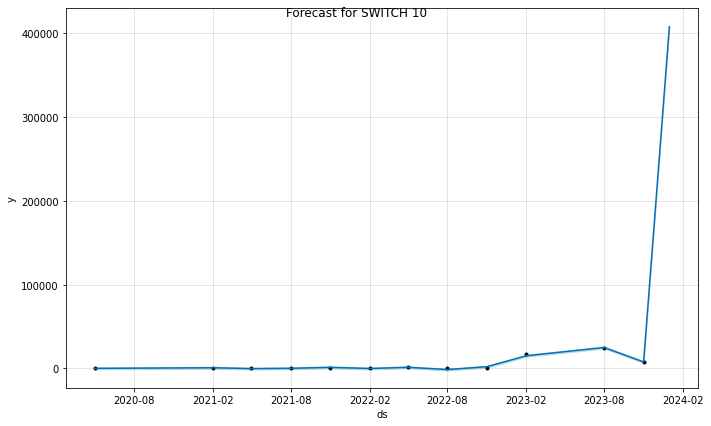

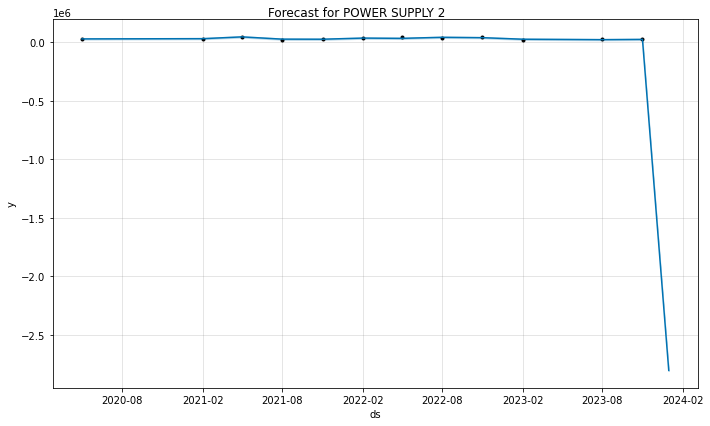

In [55]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ', product)
    # Prepare DataFrame for the current product
    product_df = scaled_spline_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model with adjusted parameters
    model = Prophet(
        seasonality_mode='multiplicative',     # Adjust seasonality mode if needed
        changepoint_prior_scale=0.05,           # Adjust changepoint prior scale if needed
        holidays_prior_scale=10,                # Adjust holidays prior scale if needed
        yearly_seasonality=False,               # Disable yearly seasonality
        weekly_seasonality=False,               # Disable weekly seasonality
        daily_seasonality=False                # Disable daily seasonality
    )

    # Add customized seasonality with reduced Fourier order
    model.add_seasonality(name='quarterly', period=90, fourier_order=5)  # Adjust period and Fourier order as needed

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_spline_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Handle outliers and anomalies
    # You can identify and handle outliers here before performing cross-validation
    # For example, you can remove outliers or replace them with more reasonable values

    # Perform cross-validation
    initial_period = 2 * 365  # Set initial period to cover at least 3 years of data
    cv_period = 365            # 1 year
    cv_horizon = 365           # 1 year
    df_cv = cross_validation(model, initial=f'{initial_period} days', period=f'{cv_period} days', horizon=f'{cv_horizon} days')

    # Compute performance metrics
    df_metrics = performance_metrics(df_cv)

    # Print the performance metrics
    print(df_metrics)

    # Make future predictions
    future = model.make_future_dataframe(periods=1, freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    # plt.show()
    # print('FORECAST:', forecast )


20:12:31 - cmdstanpy - INFO - Chain [1] start processing


product:  ROUTER 1


20:12:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:31 - cmdstanpy - INFO - Chain [1] start processing
20:12:32 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae        mape       mdape  \
0  92 days  1.962095e+07   4429.554352   4429.554352    2.068918    2.068918   
1 273 days  1.067362e+08  10331.321647  10331.321647    6.186420    6.186420   
2 365 days  1.558689e+08  12484.745288  12484.745288  328.545929  328.545929   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  


20:12:32 - cmdstanpy - INFO - Chain [1] start processing


product:  TRANSCIEVER


20:12:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:33 - cmdstanpy - INFO - Chain [1] start processing
20:12:33 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  5.183522e+11  7.199668e+05  7.199668e+05  10.724644  10.724644   
1 273 days  2.149431e+12  1.466094e+06  1.466094e+06  17.843721  17.843721   
2 365 days  1.605093e+13  4.006361e+06  4.006361e+06  48.616166  48.616166   

      smape  coverage  
0  1.685649       0.0  
1  1.798425       0.0  
2  1.920974       0.0  
product:  SWITCH 1


20:12:33 - cmdstanpy - INFO - Chain [1] start processing
20:12:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:34 - cmdstanpy - INFO - Chain [1] start processing
20:12:34 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  3.701221e+09   60837.658367   60837.658367   6.590582   6.590582   
1 273 days  1.837458e+10  135552.860335  135552.860335  19.537743  19.537743   
2 365 days  1.173799e+11  342607.444395  342607.444395  35.706873  35.706873   

      smape  coverage  
0  1.534374       0.0  
1  1.814280       0.0  
2  1.893919       0.0  
product:  ACCESS POINT 1


20:12:34 - cmdstanpy - INFO - Chain [1] start processing
20:12:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:35 - cmdstanpy - INFO - Chain [1] start processing
20:12:35 - cmdstanpy - INFO - Chain [1] done processing
20:12:35 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  4.270988e+09   65352.795521   65352.795521  1.042176  1.042176   
1 273 days  5.165257e+08   22727.201525   22727.201525  0.413560  0.413560   
2 365 days  2.750305e+10  165840.425743  165840.425743  2.742161  2.742161   

      smape  coverage  
0  2.000000       0.0  
1  0.521369       0.0  
2  1.156503       0.0  
product:  ACCESS POINT 2


20:12:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:36 - cmdstanpy - INFO - Chain [1] start processing
20:12:36 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae      mape     mdape  \
0  92 days  3.515370e+09   59290.553875   59290.553875  0.732489  0.732489   
1 273 days  2.007046e+10  141670.235753  141670.235753  4.207610  4.207610   
2 365 days  8.846475e+10  297430.235908  297430.235908  3.973525  3.973525   

     smape  coverage  
0  1.15579       0.0  
1  2.00000       0.0  
2  2.00000       0.0  
product:  SWITCH 2


20:12:36 - cmdstanpy - INFO - Chain [1] start processing
20:12:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:36 - cmdstanpy - INFO - Chain [1] start processing
20:12:36 - cmdstanpy - INFO - Chain [1] done processing
20:12:37 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  5.701547e+07  7550.858739  7550.858739  0.873437  0.873437   
1 273 days  4.448180e+07  6669.467723  6669.467723  0.764321  0.764321   
2 365 days  4.671865e+06  2161.449780  2161.449780  0.212219  0.212219   

      smape  coverage  
0  0.607939       0.0  
1  0.552990       0.0  
2  0.191861       0.0  
product:  SWITCH 3


20:12:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:37 - cmdstanpy - INFO - Chain [1] start processing
20:12:37 - cmdstanpy - INFO - Chain [1] done processing
20:12:38 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  2.928632e+08  17113.247566  17113.247566  1.616898  1.616898   
1 273 days  1.133926e+07   3367.382156   3367.382156  0.158495  0.158495   
2 365 days  1.101384e+08  10494.684972  10494.684972  0.496226  0.496226   

      smape  coverage  
0  0.894080       0.0  
1  0.172136       1.0  
2  0.659974       0.0  
product:  POWER SUPPLY 1


20:12:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:38 - cmdstanpy - INFO - Chain [1] start processing
20:12:38 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  7.179006e+08  26793.668056  26793.668056  0.266278  0.266278   
1 273 days  3.509820e+09  59243.732718  59243.732718  0.402241  0.402241   
2 365 days  8.852945e+08  29753.899507  29753.899507  0.217187  0.217187   

      smape  coverage  
0  0.234991       0.0  
1  0.503507       0.0  
2  0.243645       0.0  
product:  SWITCH 4


20:12:39 - cmdstanpy - INFO - Chain [1] start processing
20:12:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:39 - cmdstanpy - INFO - Chain [1] start processing
20:12:39 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  2.656889e+08  16299.965133  16299.965133   6.429967   6.429967   
1 273 days  1.152767e+09  33952.422222  33952.422222   5.576026   5.576026   
2 365 days  8.418725e+09  91753.611465  91753.611465  11.379587  11.379587   

      smape  coverage  
0  1.525502       0.0  
1  1.472019       0.0  
2  1.701037       0.0  
product:  SWITCH 5


20:12:40 - cmdstanpy - INFO - Chain [1] start processing
20:12:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:40 - cmdstanpy - INFO - Chain [1] start processing
20:12:40 - cmdstanpy - INFO - Chain [1] done processing
20:12:40 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.603312e+06   1266.219527   1266.219527  0.287974  0.287974   
1 273 days  4.698799e+06   2167.671419   2167.671419  0.469600  0.469600   
2 365 days  1.773826e+08  13318.505274  13318.505274  2.845834  2.845834   

      smape  coverage  
0  0.251728       0.0  
1  0.380304       0.0  
2  1.174549       0.0  
product:  SWITCH 6


20:12:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:41 - cmdstanpy - INFO - Chain [1] start processing
20:12:41 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.414045e+08  11891.361267  11891.361267  1.786563  1.786563   
1 273 days  2.353152e+08  15339.988088  15339.988088  3.219981  3.219981   
2 365 days  8.348804e+08  28894.297314  28894.297314  5.761575  5.761575   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  
product:  ACCESS POINT 3


20:12:41 - cmdstanpy - INFO - Chain [1] start processing
20:12:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:42 - cmdstanpy - INFO - Chain [1] start processing
20:12:42 - cmdstanpy - INFO - Chain [1] done processing
20:12:42 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.041242e+10  142872.038790  142872.038790   2.673954   2.673954   
1 273 days  5.208953e+10  228231.316968  228231.316968   3.002254   3.002254   
2 365 days  3.496324e+11  591297.175822  591297.175822  11.462358  11.462358   

      smape  coverage  
0  1.144194       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  SUPERVISOR ENGINE


20:12:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:42 - cmdstanpy - INFO - Chain [1] start processing
20:12:43 - cmdstanpy - INFO - Chain [1] done processing
20:12:43 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  smape  \
0  92 days  1.173227e+07  3425.240612  3425.240612  1.634180  1.634180    2.0   
1 273 days  2.228166e+07  4720.345561  4720.345561  1.944930  1.944930    2.0   
2 365 days  4.165981e+07  6454.441121  6454.441121  2.271891  2.271891    2.0   

   coverage  
0       0.0  
1       0.0  
2       0.0  
product:  SWITCH 7


20:12:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:43 - cmdstanpy - INFO - Chain [1] start processing
20:12:43 - cmdstanpy - INFO - Chain [1] done processing
20:12:44 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  7.710679e+09   87810.472740   87810.472740  13.218497  13.218497   
1 273 days  4.213495e+10  205267.993786  205267.993786  22.978618  22.978618   
2 365 days  3.046939e+11  551990.823007  551990.823007  93.415269  93.415269   

   smape  coverage  
0    2.0       0.0  
1    2.0       0.0  
2    2.0       0.0  
product:  WIRELESS CONTROLLER


20:12:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:44 - cmdstanpy - INFO - Chain [1] start processing
20:12:44 - cmdstanpy - INFO - Chain [1] done processing
20:12:45 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse         rmse          mae      mape     mdape  \
0  92 days  1.354059e+04   116.364037   116.364037  0.088760  0.088760   
1 273 days  5.587199e+05   747.475712   747.475712  0.617749  0.617749   
2 365 days  3.538050e+06  1880.970430  1880.970430  1.133798  1.133798   

      smape  coverage  
0  0.092882       1.0  
1  0.893829       0.0  
2  2.000000       0.0  
product:  SWITCH 8


20:12:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:45 - cmdstanpy - INFO - Chain [1] start processing
20:12:45 - cmdstanpy - INFO - Chain [1] done processing
20:12:46 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.376629e+08   15416.317760   15416.317760   5.490142   5.490142   
1 273 days  1.410317e+09   37554.189596   37554.189596  13.626339  13.626339   
2 365 days  1.179380e+10  108599.284728  108599.284728  34.740654  34.740654   

      smape  coverage  
0  1.465965       0.0  
1  1.744022       0.0  
2  1.891129       0.0  
product:  SWITCH 9


20:12:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:46 - cmdstanpy - INFO - Chain [1] start processing
20:12:46 - cmdstanpy - INFO - Chain [1] done processing
20:12:46 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse           rmse            mae       mape      mdape  \
0  92 days  2.218492e+09   47100.870217   47100.870217   8.418386   8.418386   
1 273 days  1.118775e+10  105772.150318  105772.150318  27.922954  27.922954   
2 365 days  9.472883e+10  307780.497231  307780.497231  57.658392  57.658392   

      smape  coverage  
0  1.616063       0.0  
1  1.866323       0.0  
2  1.932952       0.0  
product:  ACCESS POINT 4


20:12:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:47 - cmdstanpy - INFO - Chain [1] start processing
20:12:47 - cmdstanpy - INFO - Chain [1] done processing
20:12:47 - cmdstanpy - INFO - Chain [1] start processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  4.882684e+08  22096.796124  22096.796124  0.545533  0.545533   
1 273 days  2.072912e+09  45529.247027  45529.247027  2.101318  2.101318   
2 365 days  7.671986e+09  87589.871348  87589.871348  2.871987  2.871987   

      smape  coverage  
0  0.750147       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  SWITCH 10


20:12:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:47 - cmdstanpy - INFO - Chain [1] start processing
20:12:47 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae      mape     mdape  \
0  92 days  1.094836e+08  10463.441435  10463.441435  0.623864  0.623864   
1 273 days  1.887956e+09  43450.610618  43450.610618  1.796519  1.796519   
2 365 days  2.302832e+09  47987.836991  47987.836991  6.248416  6.248416   

      smape  coverage  
0  0.906689       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
product:  POWER SUPPLY 2


20:12:48 - cmdstanpy - INFO - Chain [1] start processing
20:12:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:12:48 - cmdstanpy - INFO - Chain [1] start processing
20:12:48 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse          rmse           mae       mape      mdape  \
0  92 days  3.208572e+10  1.791249e+05  1.791249e+05  10.063760  10.063760   
1 273 days  1.582536e+11  3.978110e+05  3.978110e+05  14.774784  14.774784   
2 365 days  1.561812e+12  1.249725e+06  1.249725e+06  52.876023  52.876023   

      smape  coverage  
0  1.668428       0.0  
1  1.761547       0.0  
2  1.927108       0.0  


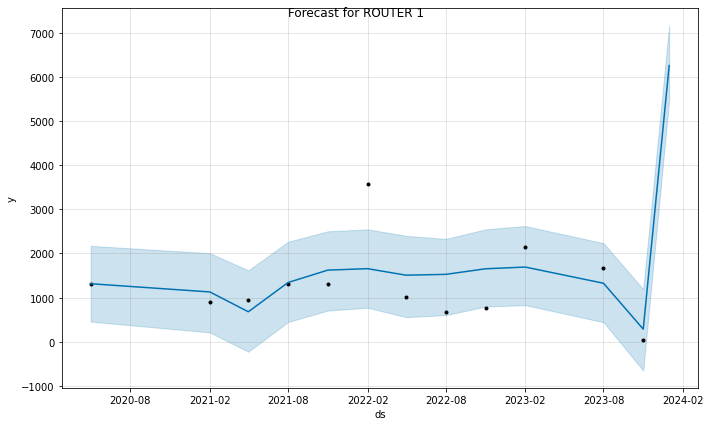

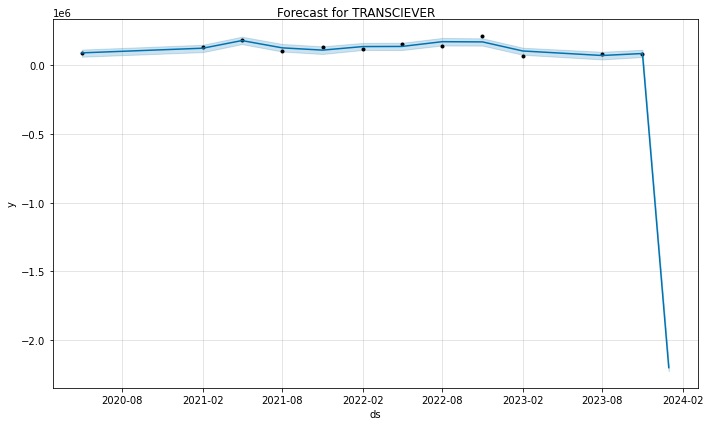

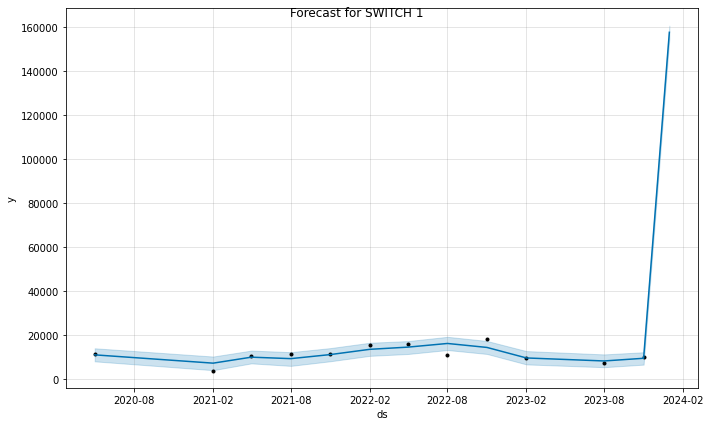

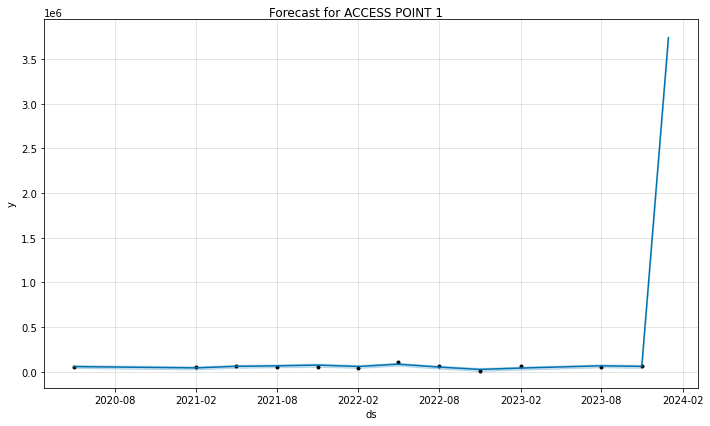

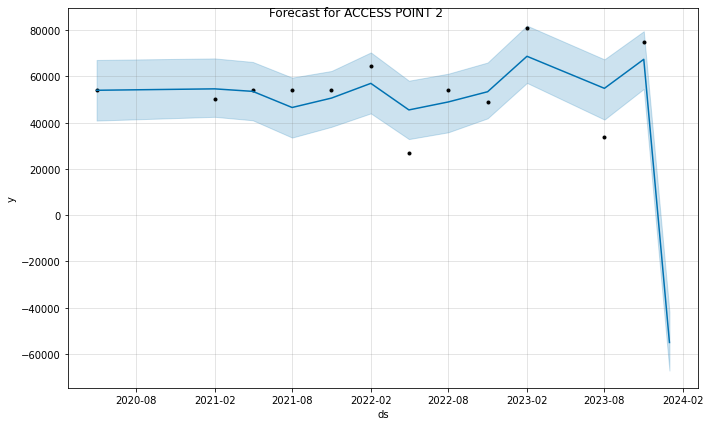

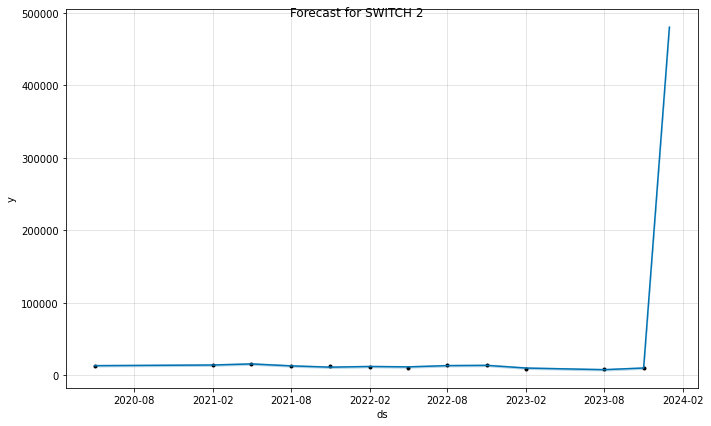

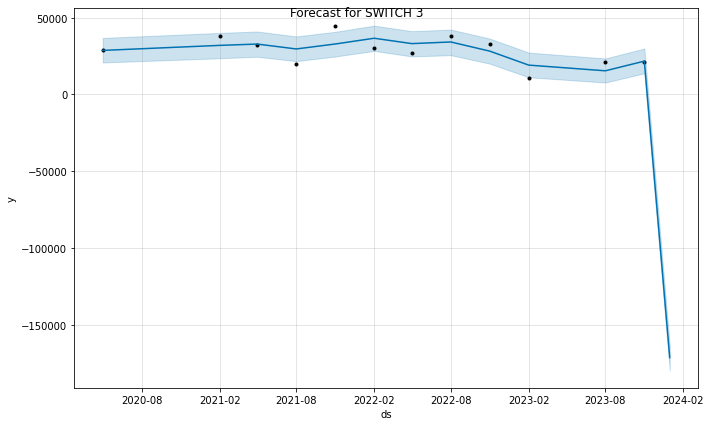

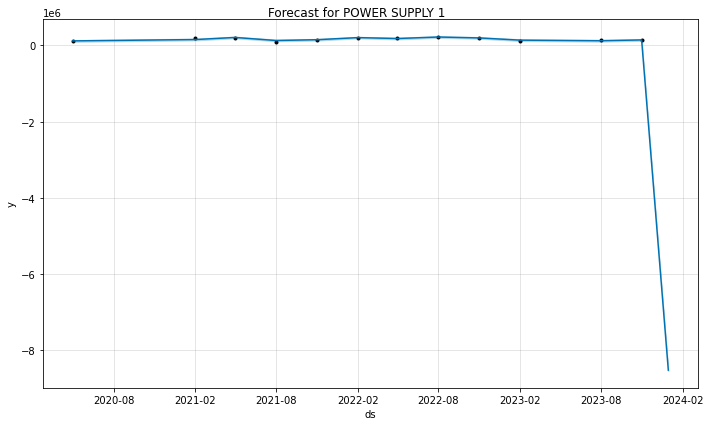

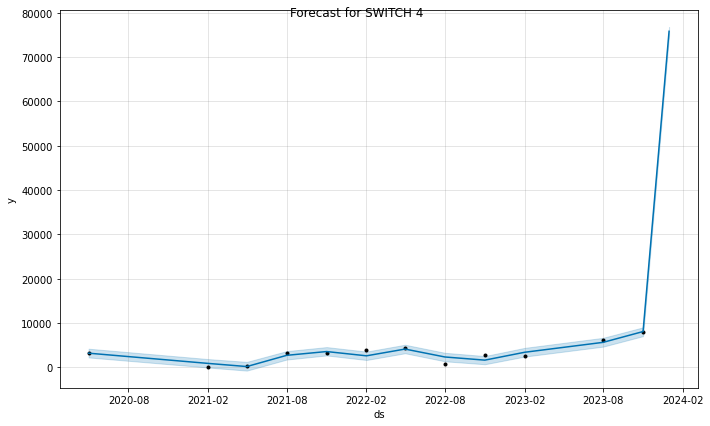

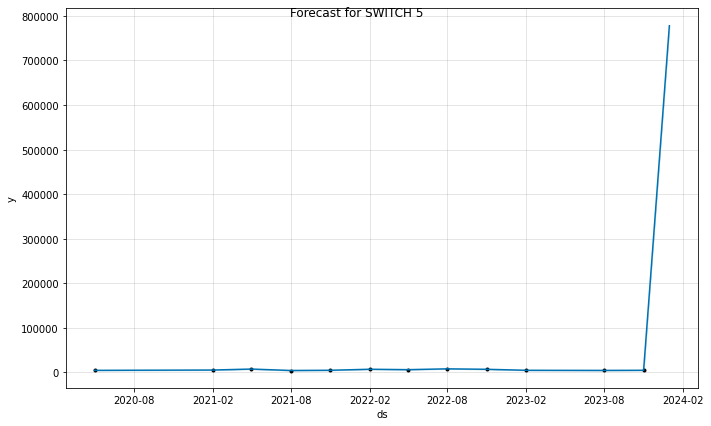

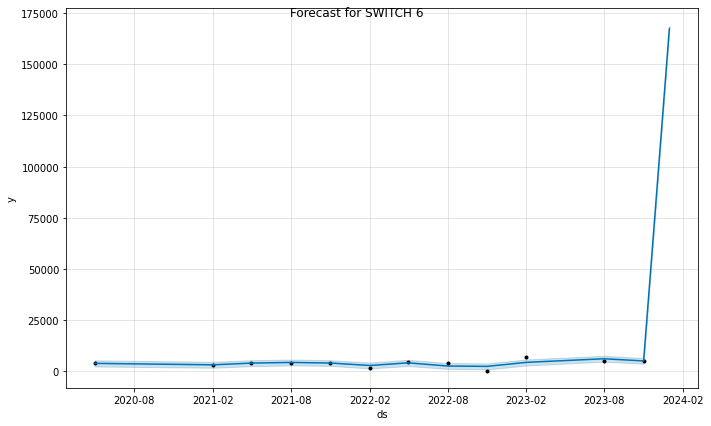

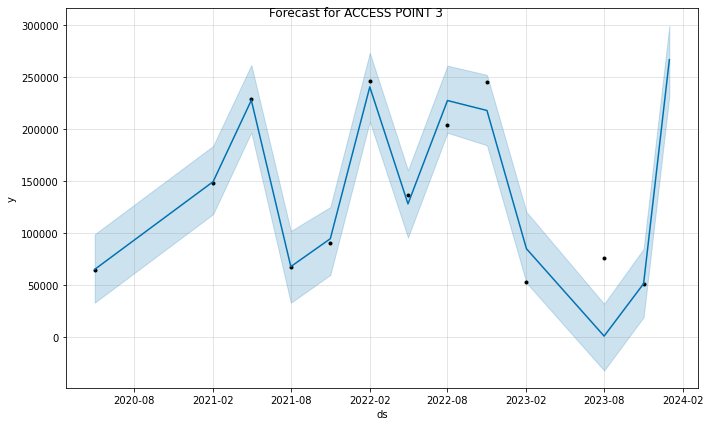

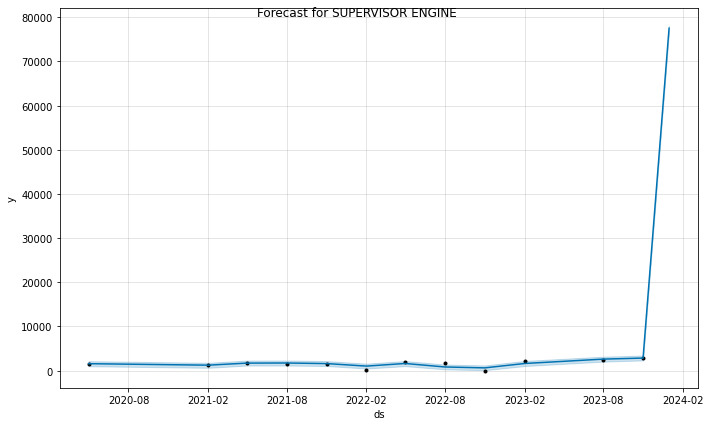

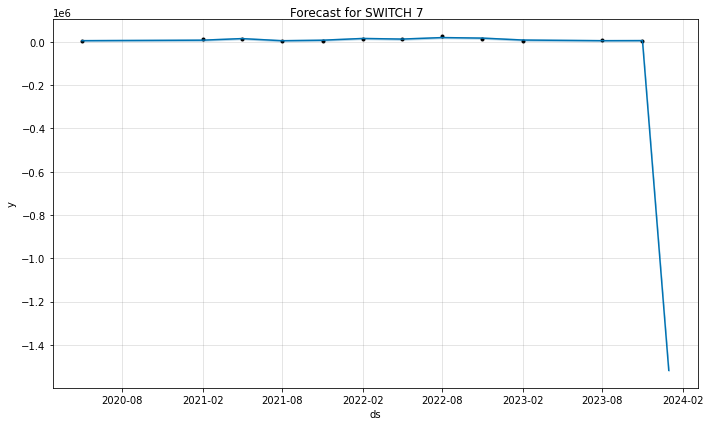

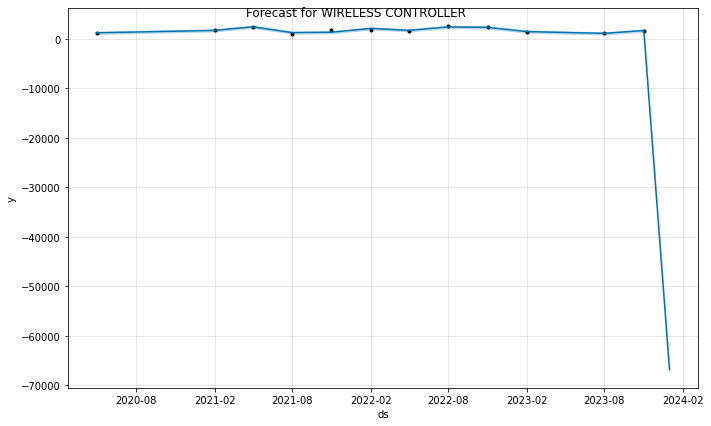

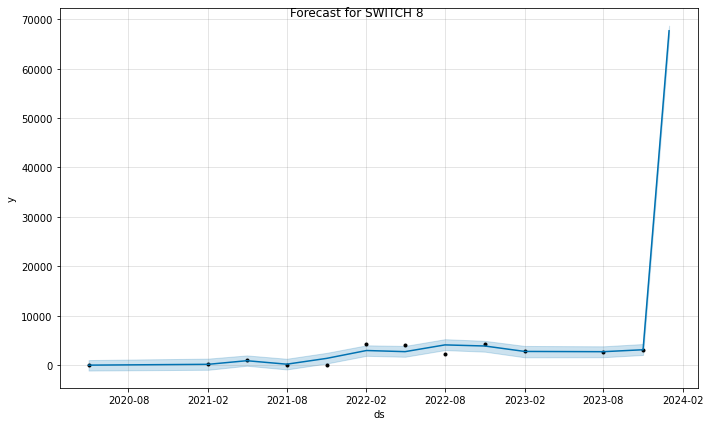

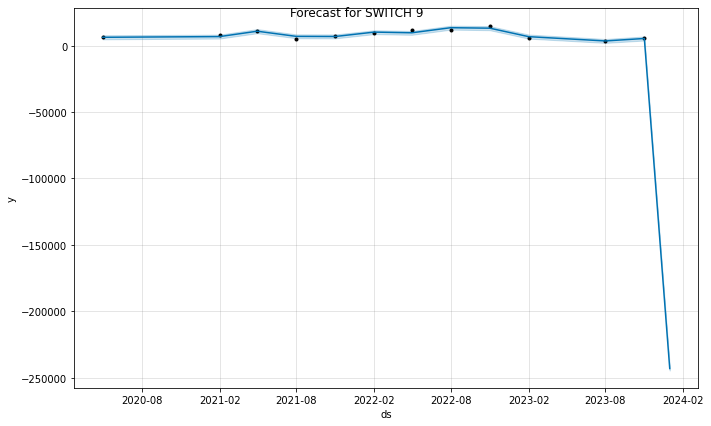

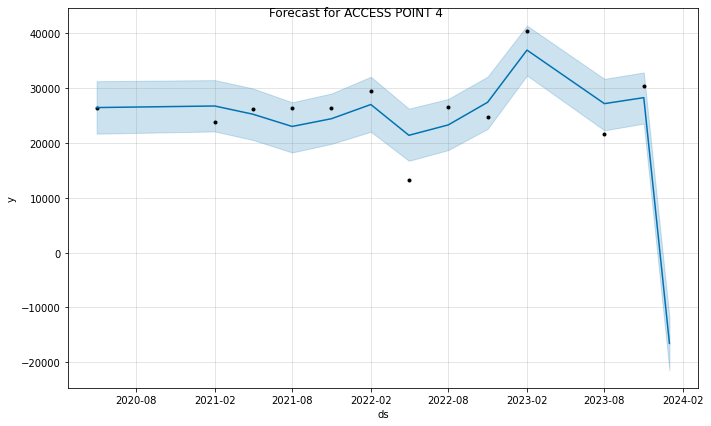

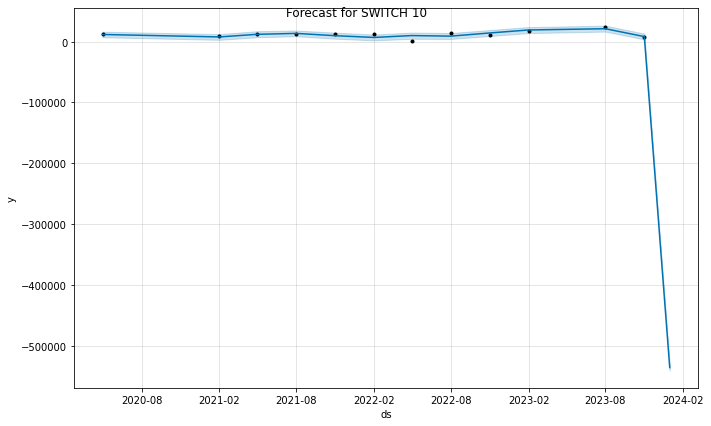

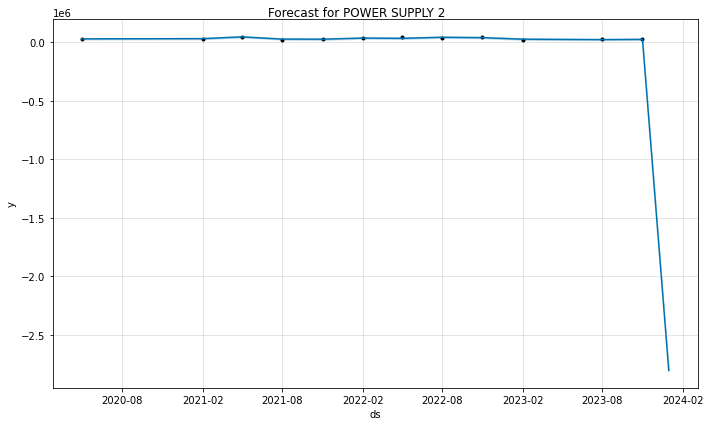

In [56]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ', product)
    # Prepare DataFrame for the current product
    product_df = scaled_linear_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model with adjusted parameters
    model = Prophet(
        seasonality_mode='multiplicative',     # Adjust seasonality mode if needed
        changepoint_prior_scale=0.05,           # Adjust changepoint prior scale if needed
        holidays_prior_scale=10,                # Adjust holidays prior scale if needed
        yearly_seasonality=False,               # Disable yearly seasonality
        weekly_seasonality=False,               # Disable weekly seasonality
        daily_seasonality=False                # Disable daily seasonality
    )

    # Add customized seasonality with reduced Fourier order
    model.add_seasonality(name='quarterly', period=90, fourier_order=5)  # Adjust period and Fourier order as needed

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_linear_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Handle outliers and anomalies
    # You can identify and handle outliers here before performing cross-validation
    # For example, you can remove outliers or replace them with more reasonable values

    # Perform cross-validation
    initial_period = 2 * 365  # Set initial period to cover at least 3 years of data
    cv_period = 365            # 1 year
    cv_horizon = 365           # 1 year
    df_cv = cross_validation(model, initial=f'{initial_period} days', period=f'{cv_period} days', horizon=f'{cv_horizon} days')

    # Compute performance metrics
    df_metrics = performance_metrics(df_cv)

    # Print the performance metrics
    print(df_metrics)

    # Make future predictions
    future = model.make_future_dataframe(periods=1, freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    # plt.show()
    # print('FORECAST:', forecast )
